#*Preprocessing*

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl

#For categorical columns
df = pd.read_excel('radar scores of first test sessions age equal or above 50.xlsx')
categorical_columns = ['CognitiveStatus', 'Group', 'TestId']

for column in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])
df.shape


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


(154, 34)

In [4]:
#Checking how many impaired and normal are there in dataset

df['CognitiveStatus'].value_counts()

CognitiveStatus
1    125
0     29
Name: count, dtype: int64

In [5]:
# Separate features (X) and target variable (y)
X = df.drop('CognitiveStatus', axis=1)
y = df['CognitiveStatus']

In [6]:
# Perform oversampling on the target variable y
oversampler = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new dataframe with the resampled data
df_r = pd.DataFrame(X_resampled, columns=X.columns)
df_r['CognitiveStatus'] = y_resampled

# Count the occurrences of each class in the resampled target variable
class_counts = df_r['CognitiveStatus'].value_counts()

# Print the class counts
print(class_counts)

# Print the shape of the resampled DataFrame
print(df_r.shape)

CognitiveStatus
0    125
1    125
Name: count, dtype: int64
(250, 34)


In [7]:
#UNDERSAMPLING

from imblearn.under_sampling import RandomUnderSampler

# Assume X and y are your features and target variable, respectively

# Perform undersampling on the target variable y
undersampler = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new dataframe with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['CognitiveStatus'] = y_resampled

# Count the occurrences of each class in the resampled target variable
class_counts_resampled = df_resampled['CognitiveStatus'].value_counts()

# Print the class counts of the resampled data
print(class_counts_resampled)

# Print the shape of the resampled DataFrame
print(df_resampled.shape)


CognitiveStatus
0    29
1    29
Name: count, dtype: int64
(58, 34)


In [8]:
df_r = df_r.dropna()

#Dropping the col which has one unique value
columns_with_one_value = []
for column in df.columns:
    if len(df[column].value_counts()) == 1:
        columns_with_one_value.append(column)
        
df_r = df_r.drop(columns_with_one_value, axis=1)
print(df_r.shape)

(250, 34)


In [9]:
# Drop columns that are not useful for prediction for OVERSAMPLING
df_r = df_r.loc[:, (df_r.columns != 'ProbandId')]
df_r = df_r.loc[:, (df_r.columns != 'TestId')]
df_r = df_r.loc[:, (df_r.columns != 'Group')]
print(df_r.shape)

# Drop columns that are not useful for prediction for UNDERSAMPLING
df_resampled = df_resampled.loc[:, (df_resampled.columns != 'ProbandId')]
df_resampled = df_resampled.loc[:, (df_resampled.columns != 'TestId')]
df_resampled = df_resampled.loc[:, (df_resampled.columns != 'Group')]
print(df_resampled.shape)



(250, 31)
(58, 31)


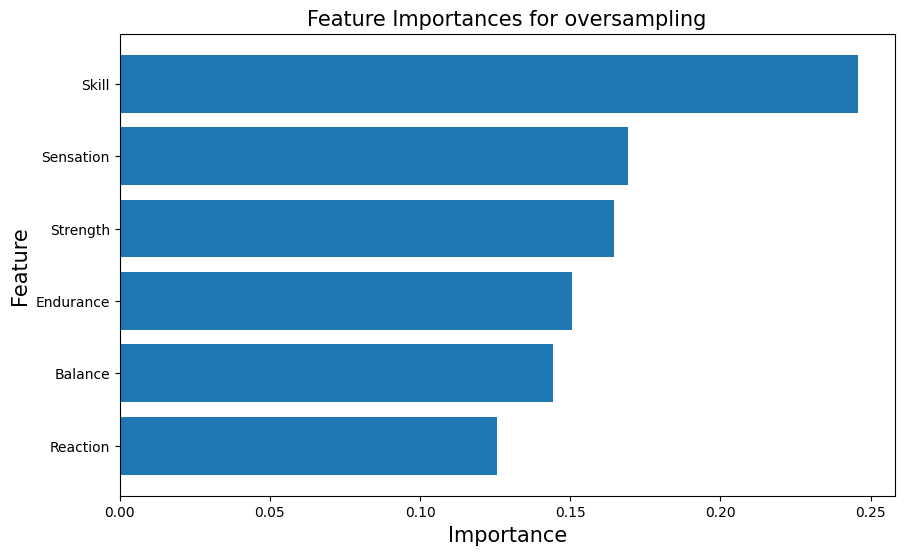

     Feature  Importance
0      Skill    0.245698
1  Sensation    0.169061
4   Strength    0.164689
2  Endurance    0.150556
3    Balance    0.144298
5   Reaction    0.125698


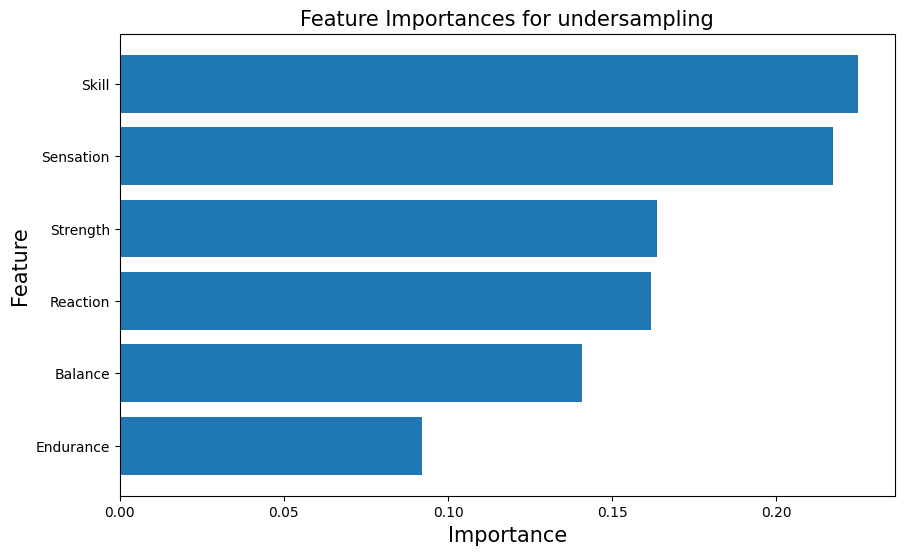

     Feature  Importance
0      Skill    0.224760
1  Sensation    0.217226
4   Strength    0.163506
5   Reaction    0.161753
3    Balance    0.140647
2  Endurance    0.092109


In [10]:
#Feature importance of only the main parameters 'Skill', 'Sensation', 'Endurance', 
#'Balance', 'Strength', 'Reaction' befor applying classifiers for OVERSAMPLING


# Assuming 'CognitiveStatus' is your target variable
X = df_r[['Skill', 'Sensation', 'Endurance', 'Balance', 'Strength', 'Reaction']]
y = df_r['CognitiveStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df_r = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df_r = feature_importance_df_r.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_r['Feature'], feature_importance_df_r['Importance'])
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize= 15)
plt.title('Feature Importances for oversampling', fontsize= 15)
plt.gca().invert_yaxis()
plt.show()

# Print the feature importances
print(feature_importance_df_r)


#Feature importance of only the main parameters 'Skill', 'Sensation', 'Endurance', 
#'Balance', 'Strength', 'Reaction' befor applying classifiers for UNDERSAMPLING


# Assuming 'CognitiveStatus' is your target variable
X = df_resampled[['Skill', 'Sensation', 'Endurance', 'Balance', 'Strength', 'Reaction']]
y = df_resampled['CognitiveStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df_resampled = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df_resampled = feature_importance_df_resampled.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_resampled['Feature'], feature_importance_df_resampled['Importance'])
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize= 15)
plt.title('Feature Importances for undersampling', fontsize= 15)
plt.gca().invert_yaxis()
plt.show()

# Print the feature importances
print(feature_importance_df_resampled)


In [11]:
#Pair plots and mutual information BEFORE CLASSIFICATION for oversampling

# Separate features and target variable
X_resampled = df_r.drop('CognitiveStatus', axis=1)
y_resampled = df_r['CognitiveStatus']

# Calculate mutual information between numeric features and target variable
mutual_info_scores = mutual_info_classif(X_resampled, y_resampled)

# Create a dictionary to store feature names and their corresponding mutual information scores
feature_mi_dict = dict(zip(X_resampled.columns, mutual_info_scores))

# Print the mutual information scores in descending order
sorted_feature_mi = {k: v for k, v in sorted(feature_mi_dict.items(), key=lambda item: item[1], reverse=True)}
for feature, mi_score in sorted_feature_mi.items():
    print(f"Mutual Information for '{feature}': {mi_score}")

print('\n********************************************************************************')
#Pair plots and mutual information BEFORE CLASSIFICATION for undersampling

# Separate features and target variable
X_resampled = df_resampled.drop('CognitiveStatus', axis=1)
y_resampled = df_resampled['CognitiveStatus']

# Calculate mutual information between numeric features and target variable
mutual_info_scores = mutual_info_classif(X_resampled, y_resampled)

# Create a dictionary to store feature names and their corresponding mutual information scores
feature_mi_dict = dict(zip(X_resampled.columns, mutual_info_scores))

# Print the mutual information scores in descending order
sorted_feature_mi = {k: v for k, v in sorted(feature_mi_dict.items(), key=lambda item: item[1], reverse=True)}
for feature, mi_score in sorted_feature_mi.items():
    print(f"Mutual Information for '{feature}': {mi_score}")




Mutual Information for 'Skill': 0.43740151161197005
Mutual Information for 'Sensation.CP': 0.4088107636419982
Mutual Information for 'Endurance.CP': 0.4088107636419982
Mutual Information for 'Reaction.AC1': 0.4000487642479753
Mutual Information for 'Endurance': 0.39066256260991605
Mutual Information for 'Reaction.AC2': 0.3860653859238552
Mutual Information for 'Reaction.CP': 0.3860653859238552
Mutual Information for 'Sensation': 0.38265960744525396
Mutual Information for 'Reaction': 0.3694872887669347
Mutual Information for 'Strength': 0.35861151134403646
Mutual Information for 'Sensation.IJ': 0.35845618327086193
Mutual Information for 'Reaction.Finger': 0.35695506847006886
Mutual Information for 'Balance.Two.Feet': 0.35135779934020195
Mutual Information for 'Balance.One.Foot': 0.34743313730958847
Mutual Information for 'Sensation.BFR': 0.3424037165583409
Mutual Information for 'Balance': 0.33079718214153386
Mutual Information for 'Sensation.BFL': 0.32336789845054614
Mutual Information

Training Set:
Accuracy: 0.795
Precision: 0.7788461538461539
Recall: 0.8181818181818182
F1 Score: 0.7980295566502463

Test Set:
Accuracy: 0.8
Precision: 0.8333333333333334
Recall: 0.7692307692307693
F1 Score: 0.8
Feature: Skill.CP, Importance: 6.193680235884119
Feature: Strength.BFR, Importance: 5.930846538887441
Feature: Strength.IJ, Importance: 5.797827878856755
Feature: Skill.AC, Importance: 5.1786087225011315
Feature: Skill.BFR, Importance: 4.63621683709936


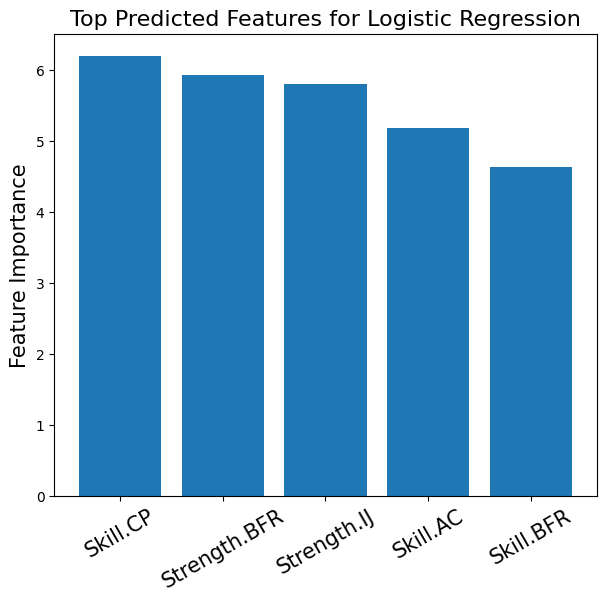

Cross-Validation Scores: [0.68253968 0.68253968 0.74193548 0.74193548]
Confusion Matrix (Training Data):
[[78 23]
 [18 81]]
Confusion Matrix (Test Data):
[[20  4]
 [ 6 20]]
Cohen's Kappa (Training Data): 0.5901639344262295
Cohen's Kappa (Test Data): 0.6006389776357828
Training Specificity: 0.7722772277227723
Training Sensitivity: 0.8181818181818182
Test Specificity: 0.8333333333333334
Test Sensitivity: 0.7692307692307693
Balanced Accuracy (Training Data): 0.7952295229522952
Balanced Accuracy (Test Data): 0.8012820512820513

******************************************************************************************************************
Training Set:
Accuracy: 0.8913043478260869
Precision: 0.8888888888888888
Recall: 0.9230769230769231
F1 Score: 0.9056603773584906

Test Set:
Accuracy: 0.5833333333333334
Precision: 0.375
Recall: 1.0
F1 Score: 0.5454545454545454
Feature: Strength.IJ, Importance: 12.279423838089379
Feature: Skill.CP, Importance: 7.743946147369024
Feature: Reaction.Finger, 

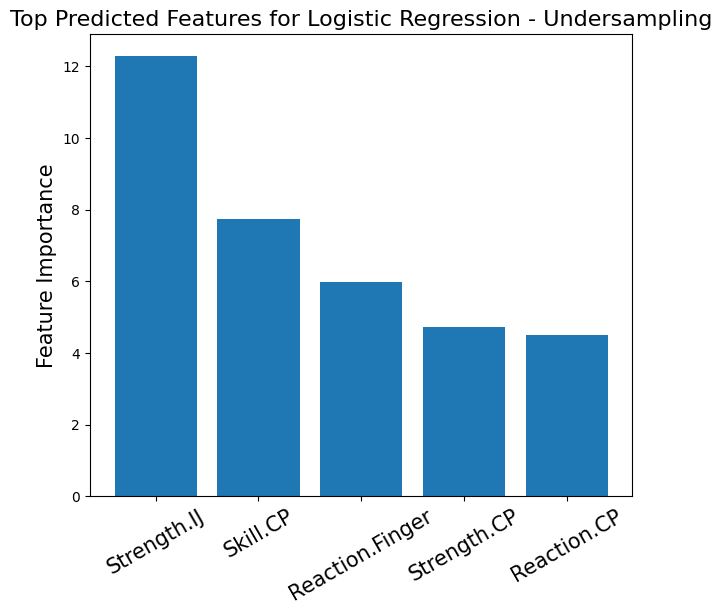

Cross-Validation Scores: [0.46666667 0.53333333 0.71428571 0.64285714]
Confusion Matrix (Training Data):
[[17  3]
 [ 2 24]]
Confusion Matrix (Test Data):
[[4 5]
 [0 3]]
Cohen's Kappa (Training Data): 0.7775628626692457
Cohen's Kappa (Test Data): 0.2857142857142857
Training Specificity: 0.85
Training Sensitivity: 0.9230769230769231
Test Specificity: 0.4444444444444444
Test Sensitivity: 1.0
Balanced Accuracy (Training Data): 0.8865384615384615
Balanced Accuracy (Test Data): 0.7222222222222222


In [12]:
#Logistic regression for OVERSAMPLING

# Split the data into features (X) and target variable (y)
X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

# Split the data into train*ing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)

# Create a logistic regression classifier
logreg = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=100)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict labels for training and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Calculate recall for training and test data
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Calculate F1 score for training and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print('Training Set:')
print('Accuracy:', train_accuracy)
print('Precision:', train_precision)
print('Recall:', train_recall)
print('F1 Score:', train_f1)

print('\nTest Set:')
print('Accuracy:', test_accuracy)
print('Precision:', test_precision)
print('Recall:', test_recall)
print('F1 Score:', test_f1)

# Get the feature importance
coefficients = logreg.coef_[0]
feature_importance = abs(coefficients)
sorted_indices = np.argsort(feature_importance)[::-1]

# Specify the number of top features to display
top_n = 5

# Print the top n most important features and their importance scores
selected_features = X_train.columns[sorted_indices[:top_n]]
selected_importance = feature_importance[sorted_indices[:top_n]]
for feature, importance in zip(selected_features, selected_importance):
    print(f'Feature: {feature}, Importance: {importance}')

# Create the bar graph
plt.figure(figsize=(7, 6))  # Increase the figure size for better visibility
plt.bar(selected_features, selected_importance)
#plt.xlabel('Features', fontsize=15)  # Increase font size for x-axis label
plt.ylabel('Feature Importance', fontsize=15)  # Increase font size for y-axis label
plt.title('Top Predicted Features for Logistic Regression', fontsize=16)  # Increase font size for title
plt.xticks(rotation=30, fontsize=15)  # Increase font size and rotate x-axis labels for better visibility
plt.show()


# Perform cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=4)
print('Cross-Validation Scores:', cv_scores)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(cm_train)

# Calculate confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):")
print(cm_test)

# Calculate Cohen's kappa for the training data
kappa_train = cohen_kappa_score(y_train, y_train_pred)

# Calculate Cohen's kappa for the test data
kappa_test = cohen_kappa_score(y_test, y_test_pred)

print('Cohen\'s Kappa (Training Data):', kappa_train)
print('Cohen\'s Kappa (Test Data):', kappa_test)

# Calculate specificity and sensitivity
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
print("Training Specificity:", specificity_train)
print("Training Sensitivity:", sensitivity_train)

tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
print("Test Specificity:", specificity_test)
print("Test Sensitivity:", sensitivity_test)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train = (sensitivity_train + specificity_train) / 2
balanced_accuracy_test = (sensitivity_test + specificity_test) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test)

print('\n******************************************************************************************************************')

# Logistic Regression for UNDERSAMPLING

# Split the data into features (X) and target variable (y)
X_under = df_resampled.drop('CognitiveStatus', axis=1)
y_under = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=250)

# Create a logistic regression classifier
logreg_under = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=100)

# Fit the model to the training data
logreg_under.fit(X_train_under, y_train_under)

# Predict labels for training and test data
y_train_pred_under = logreg_under.predict(X_train_under)
y_test_pred_under = logreg_under.predict(X_test_under)

# Calculate accuracy for training and test data
train_accuracy_under = accuracy_score(y_train_under, y_train_pred_under)
test_accuracy_under = accuracy_score(y_test_under, y_test_pred_under)

# Calculate precision for training and test data
train_precision_under = precision_score(y_train_under, y_train_pred_under)
test_precision_under = precision_score(y_test_under, y_test_pred_under)

# Calculate recall for training and test data
train_recall_under = recall_score(y_train_under, y_train_pred_under)
test_recall_under = recall_score(y_test_under, y_test_pred_under)

# Calculate F1 score for training and test data
train_f1_under = f1_score(y_train_under, y_train_pred_under)
test_f1_under = f1_score(y_test_under, y_test_pred_under)

# Print the performance metrics
print('Training Set:')
print('Accuracy:', train_accuracy_under)
print('Precision:', train_precision_under)
print('Recall:', train_recall_under)
print('F1 Score:', train_f1_under)

print('\nTest Set:')
print('Accuracy:', test_accuracy_under)
print('Precision:', test_precision_under)
print('Recall:', test_recall_under)
print('F1 Score:', test_f1_under)

# Get the feature importance
coefficients_under = logreg_under.coef_[0]
feature_importance_under = abs(coefficients_under)
sorted_indices_under = np.argsort(feature_importance_under)[::-1]

# Specify the number of top features to display
top_n_under = 5

# Print the top n most important features and their importance scores
selected_features_under = X_train_under.columns[sorted_indices_under[:top_n_under]]
selected_importance_under = feature_importance_under[sorted_indices_under[:top_n_under]]
for feature_under, importance_under in zip(selected_features_under, selected_importance_under):
    print(f'Feature: {feature_under}, Importance: {importance_under}')

# Create the bar graph
plt.figure(figsize=(7, 6))  # Increase the figure size for better visibility
plt.bar(selected_features_under, selected_importance_under)
#plt.xlabel('Features', fontsize=15)  # Increase font size for x-axis label
plt.ylabel('Feature Importance', fontsize=15)  # Increase font size for y-axis label
plt.title('Top Predicted Features for Logistic Regression - Undersampling', fontsize=16)  # Increase font size for title
plt.xticks(rotation=30, fontsize=15)  # Increase font size and rotate x-axis labels for better visibility
plt.show()

# Perform cross-validation
cv_scores_under = cross_val_score(logreg_under, X_under, y_under, cv=4)
print('Cross-Validation Scores:', cv_scores_under)

# Calculate confusion matrix for training data
cm_train_under = confusion_matrix(y_train_under, y_train_pred_under)
print("Confusion Matrix (Training Data):")
print(cm_train_under)

# Calculate confusion matrix for test data
cm_test_under = confusion_matrix(y_test_under, y_test_pred_under)
print("Confusion Matrix (Test Data):")
print(cm_test_under)

# Calculate Cohen's kappa for the training data
kappa_train_under = cohen_kappa_score(y_train_under, y_train_pred_under)

# Calculate Cohen's kappa for the test data
kappa_test_under = cohen_kappa_score(y_test_under, y_test_pred_under)

print('Cohen\'s Kappa (Training Data):', kappa_train_under)
print('Cohen\'s Kappa (Test Data):', kappa_test_under)

# Calculate specificity and sensitivity
tn_train_under, fp_train_under, fn_train_under, tp_train_under = cm_train_under.ravel()
specificity_train_under = tn_train_under / (tn_train_under + fp_train_under)
sensitivity_train_under = tp_train_under / (tp_train_under + fn_train_under)
print("Training Specificity:", specificity_train_under)
print("Training Sensitivity:", sensitivity_train_under)

tn_test_under, fp_test_under, fn_test_under, tp_test_under = cm_test_under.ravel()
specificity_test_under = tn_test_under / (tn_test_under + fp_test_under)
sensitivity_test_under = tp_test_under / (tp_test_under + fn_test_under)
print("Test Specificity:", specificity_test_under)
print("Test Sensitivity:", sensitivity_test_under)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train_under = (sensitivity_train_under + specificity_train_under) / 2
balanced_accuracy_test_under = (sensitivity_test_under + specificity_test_under) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train_under)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test_under)


In [13]:
#Chi2 for LR Normal/Impaired OVERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for oversampling
# Extract the top 5 features from Logistic Regression model
top_features_over = X_train.columns[sorted_indices[:top_n]]

# Perform Chi-square test for the top features with oversampling
for feature_over in top_features_over:
    contingency_table_over = pd.crosstab(df_r['CognitiveStatus'], X_train[feature_over])
    
    # Perform chi-square test
    chi2_stat_over, p_value_over, dof_over, expected_over = chi2_contingency(contingency_table_over)
    
    print(f'\nFeature: {feature_over}')
    print(f'Chi-square statistic: {chi2_stat_over}')
    print(f'P-value: {p_value_over}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_over < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')



Feature: Skill.CP
Chi-square statistic: 62.7438209749382
P-value: 1.793611304260163e-07
There is a significant association between the feature and CognitiveStatus.

Feature: Strength.BFR
Chi-square statistic: 9.625577239081387
P-value: 0.14133128631889832
There is no significant association between the feature and CognitiveStatus.

Feature: Strength.IJ
Chi-square statistic: 61.89761254899347
P-value: 5.697357112488131e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Skill.AC
Chi-square statistic: 46.9559368653148
P-value: 2.1895832266604804e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Skill.BFR
Chi-square statistic: 31.189291090281188
P-value: 0.0005459422504190081
There is a significant association between the feature and CognitiveStatus.


In [14]:
#Chi2 for LR Normal/Impaired UNDERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for undersampling
# Extract the top 5 features from Logistic Regression model
top_features_under = X_train_under.columns[sorted_indices_under[:top_n_under]]

# Perform Chi-square test for the top features with undersampling
for feature_under in top_features_under:
    contingency_table_under = pd.crosstab(y_train_under, X_train_under[feature_under])
    
    # Perform chi-square test
    chi2_stat_under, p_value_under, dof_under, expected_under = chi2_contingency(contingency_table_under)
    
    print(f'\nFeature: {feature_under}')
    print(f'Chi-square statistic: {chi2_stat_under}')
    print(f'P-value: {p_value_under}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_under < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Strength.IJ
Chi-square statistic: 14.243044871794874
P-value: 0.2854579487473185
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 20.97423076923077
P-value: 0.050759077122131326
There is no significant association between the feature and CognitiveStatus.

Feature: Reaction.Finger
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Strength.CP
Chi-square statistic: 15.480769230769232
P-value: 0.030307406916374686
There is a significant association between the feature and CognitiveStatus.

Feature: Reaction.CP
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.


In [19]:
# !pip install shap
# !pip install lime

In [20]:
# #Logistic regression using LIME

# import lime
# import lime.lime_tabular
# import matplotlib.pyplot as plt

# # Create a LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train.values,
#     mode="classification",  # Assuming you're doing classification
#     training_labels=y_train,
#     feature_names=X_train.columns.values,
#     discretize_continuous=True,
#     class_names=["Normal", "Impaired"],  # Specify your class labels
#     random_state=42,
#     verbose=True,
# )

# # Choose the sample index you want to explain (e.g., the first sample)
# sample_index = 0

# # Explain the selected sample
# explanation = explainer.explain_instance(
#     data_row=X_test.values[sample_index],
#     predict_fn=logreg.predict_proba,  # Use the predict_proba function of your model
#     num_features=30,  # Specify the number of features to include in the explanation
# )

# # Plot the local explanation
# plt.figure(figsize=(10, 6))
# explanation.as_pyplot_figure()
# plt.tight_layout()
# plt.show()

# # Optionally, show the feature importance table
# explanation.show_in_notebook(show_table=True)



In [21]:
# #LIME waterfall model

# # Create a LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train.values,
#     mode="classification",  # Assuming you're doing classification
#     training_labels=y_train,
#     feature_names=X_train.columns.values,
#     discretize_continuous=True,
#     class_names=["Normal", "Impaired"],  # Specify your class labels
#     random_state=42,
#     verbose=True,
# )

# # Choose the sample index you want to explain (e.g., the first sample)
# sample_index = 0

# # Explain the selected sample
# explanation = explainer.explain_instance(
#     data_row=X_test.values[sample_index],
#     predict_fn=logreg.predict_proba,  # Use the predict_proba function of your model
#     num_features=30,  # Specify the number of features to include in the explanation
# )

# # Plot the local explanation as a Waterfall Model
# explanation.show_in_notebook(show_table=True)

In [22]:
# #P values for boxplot

# # Define the label names for target variable
# target_labels = {0: 'Impaired', 1: 'Normal'}


# # Iterate over each selected feature
# for feature in selected_features:
#     # Create a DataFrame with the selected feature and target variable for training data
#     train_data_to_plot = pd.DataFrame({feature: X_train[feature], 'CognitiveStatus': y_train.replace(target_labels)})

#     # Create a DataFrame with the selected feature and target variable for test data
#     test_data_to_plot = pd.DataFrame({feature: X_test[feature], 'CognitiveStatus': y_test.replace(target_labels)})

#     # Calculate t-test p-value
#     t_statistic, p_value = ttest_ind(train_data_to_plot[feature][train_data_to_plot['CognitiveStatus'] == 'Impaired'],
#                                      train_data_to_plot[feature][train_data_to_plot['CognitiveStatus'] == 'Normal'])

#     # Create subplots for train and test boxplots
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#     # Plot boxplot for training data
#     sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[0])
#     axes[0].set_xlabel('CognitiveStatus', fontsize=14)
#     axes[0].set_ylabel('Feature Values', fontsize=14)
#     axes[0].set_title(f'Training Boxplot for {feature}', fontsize=18)
#     axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
#     axes[0].text(0.5, 0.9, f'p-value: {p_value:.4f}', ha='center', va='center', transform=axes[0].transAxes, fontsize=12, color='red')

#     # Plot boxplot for test data
#     sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[1])
#     axes[1].set_xlabel('CognitiveStatus', fontsize=14)
#     axes[1].set_ylabel('Feature Values', fontsize=14)
#     axes[1].set_title(f'Test Boxplot for {feature}', fontsize=18)
#     axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)
#     axes[1].text(0.5, 0.9, f'p-value: {p_value:.4f}', ha='center', va='center', transform=axes[1].transAxes, fontsize=12, color='red')

#     plt.tight_layout()
#     plt.show()

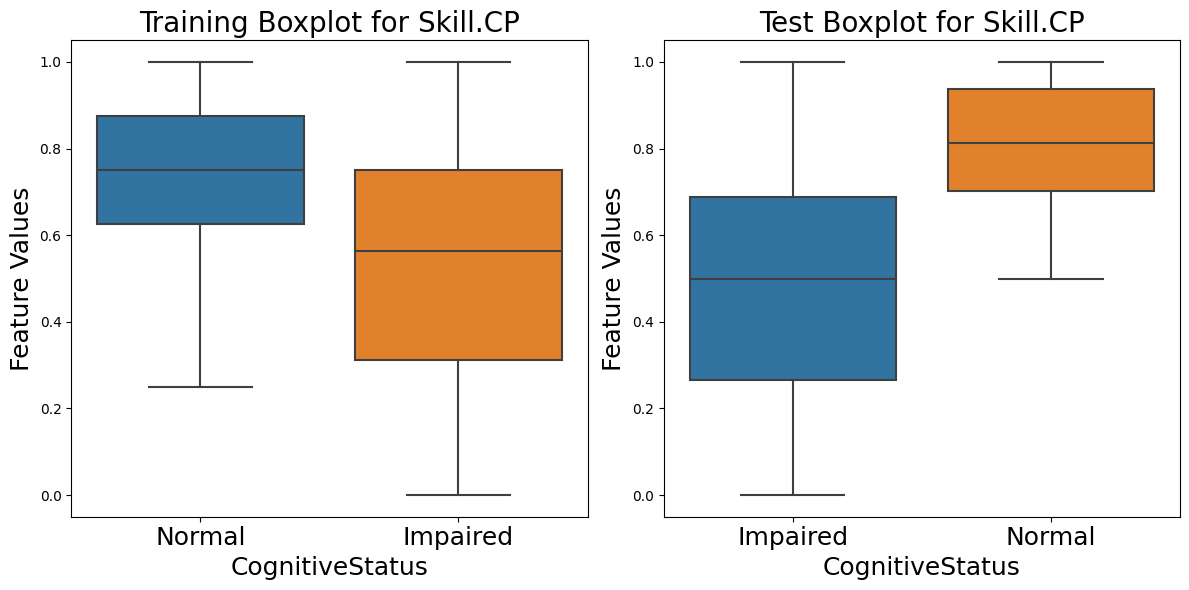

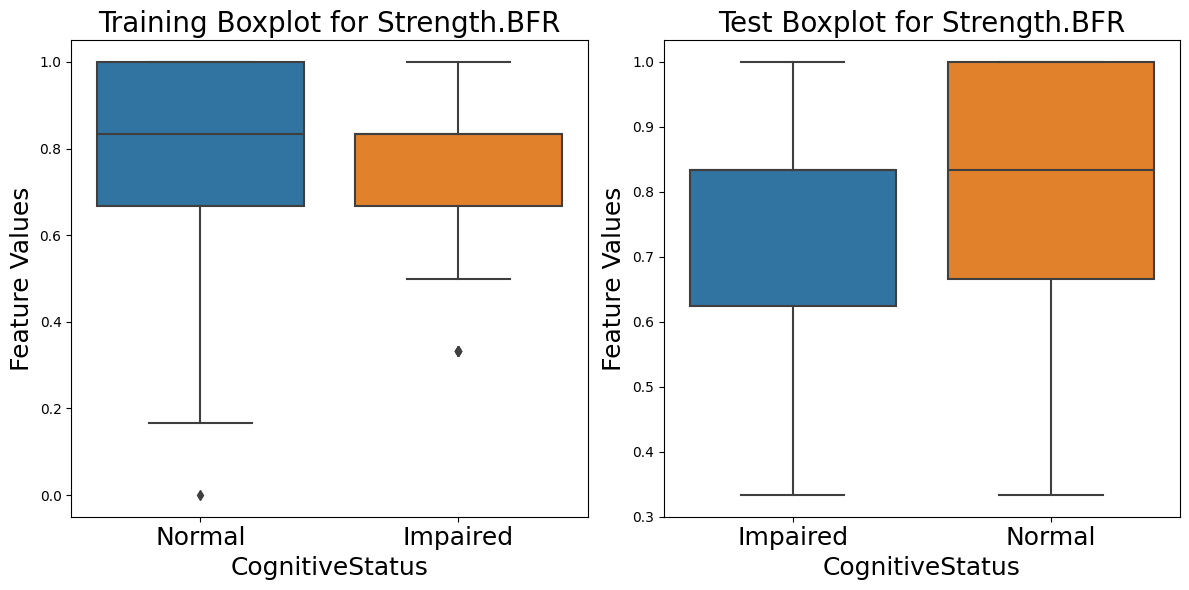

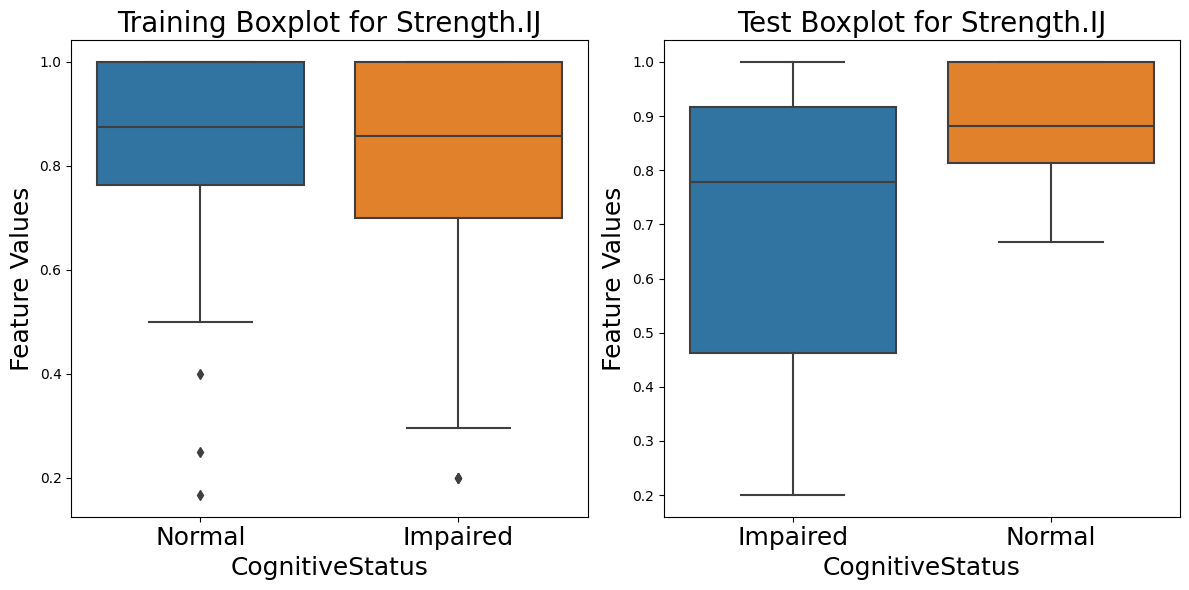

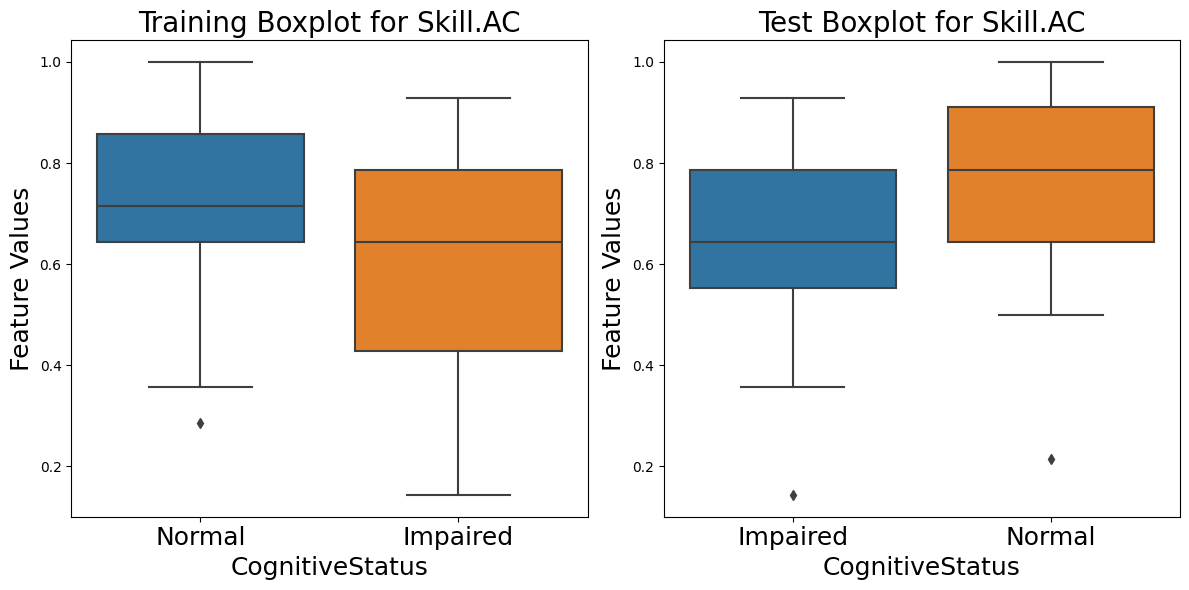

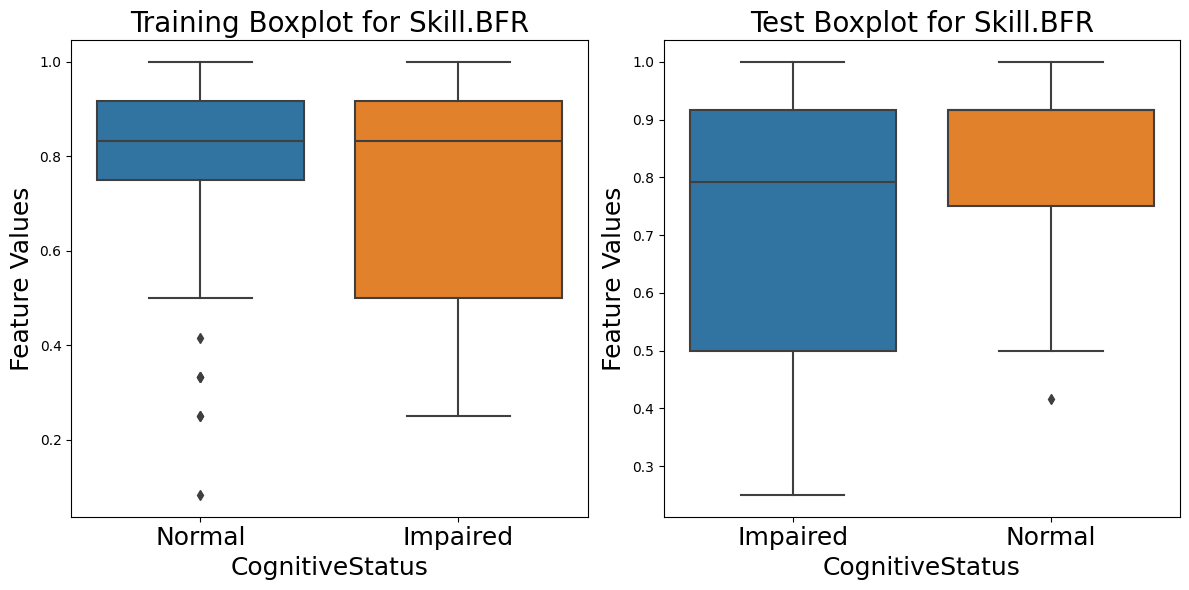


************************************************************************************************************


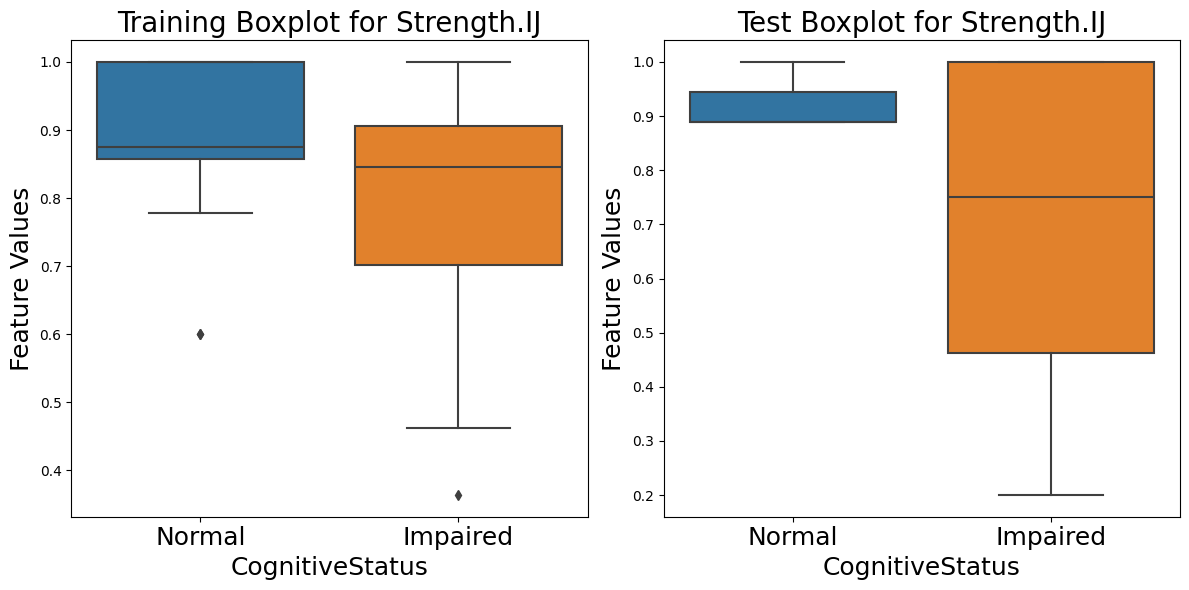

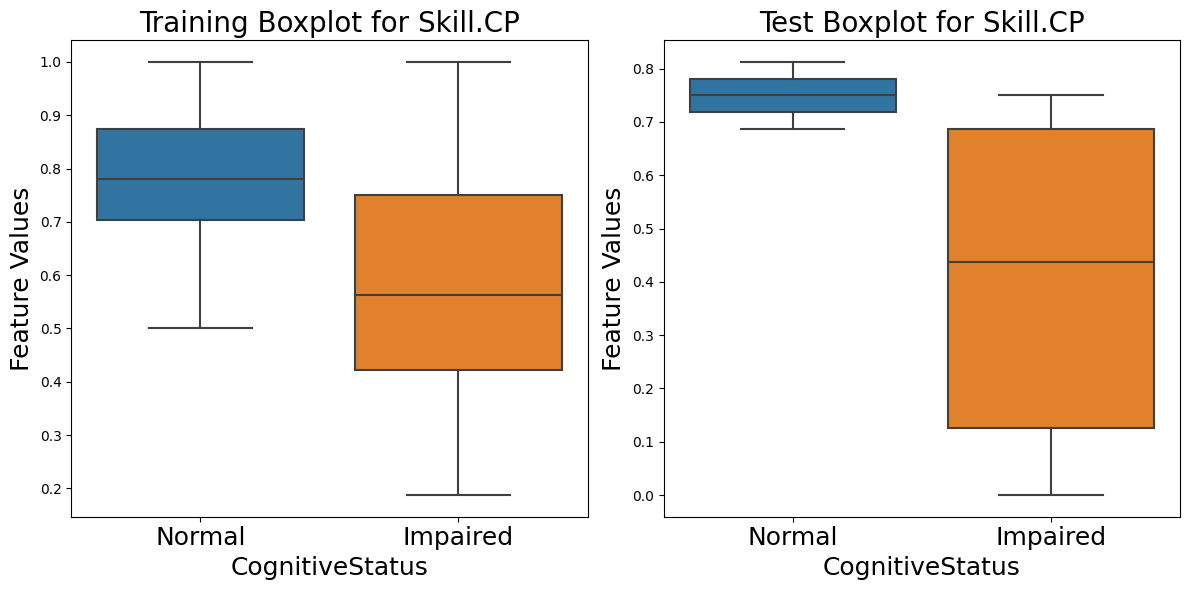

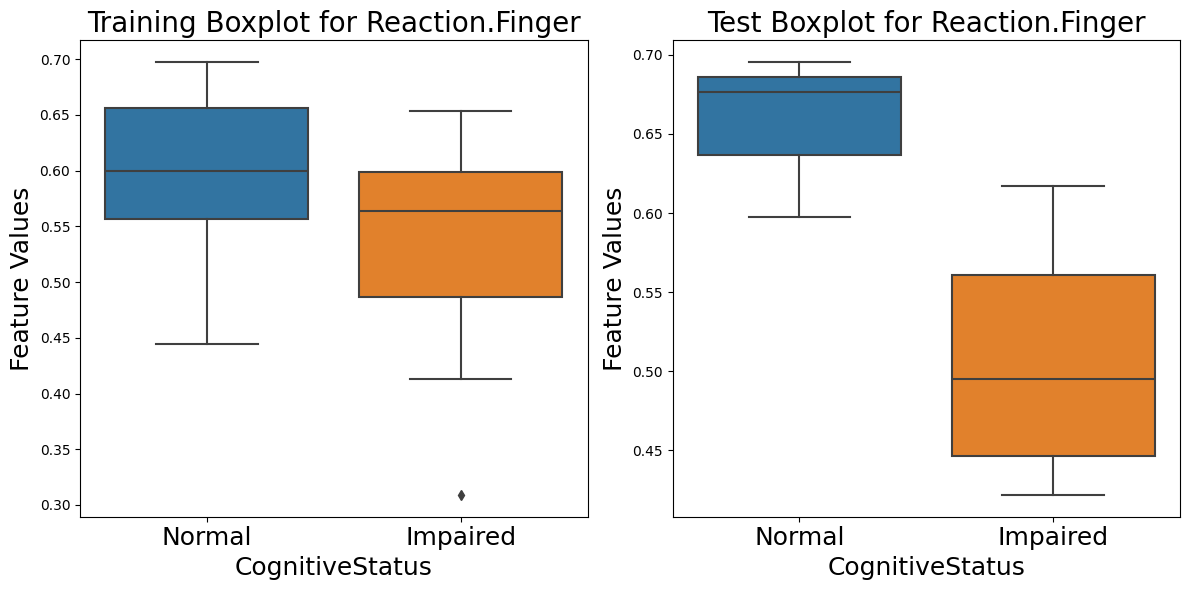

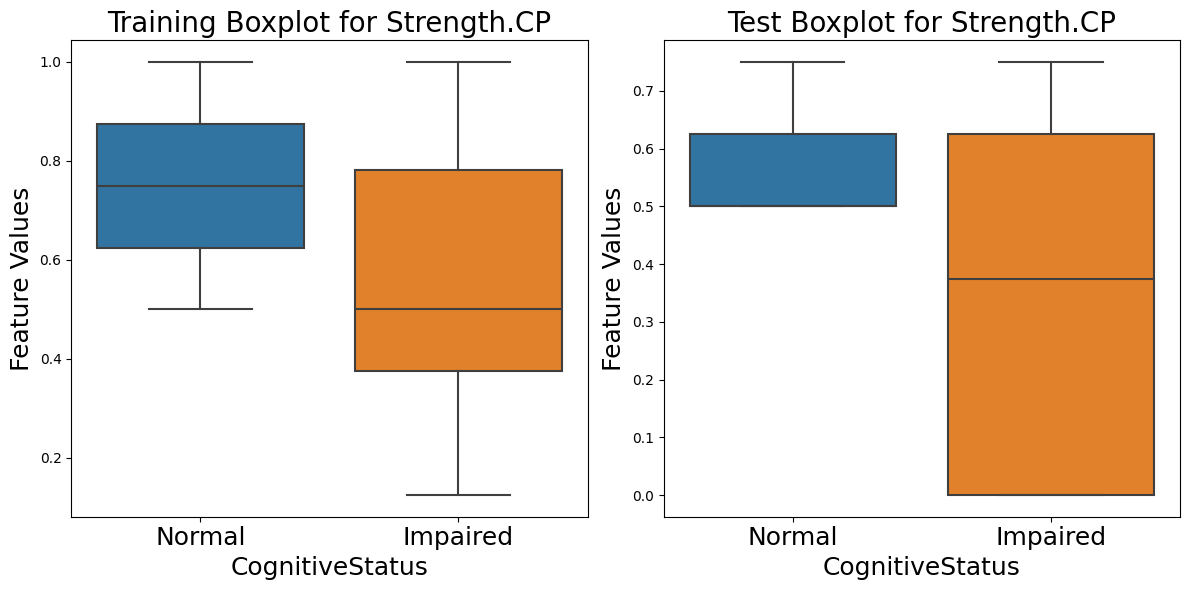

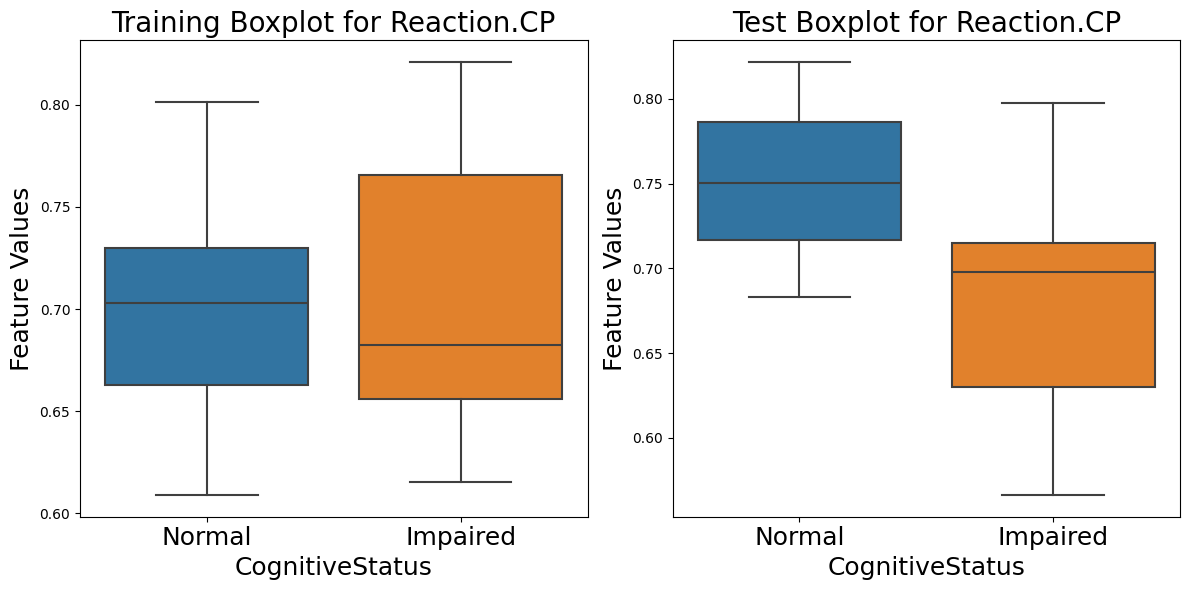

In [23]:
#Boxplot LR increase font size for OVERSAMPLING

# Define the label names for target variable
target_labels = {0: 'Impaired', 1: 'Normal'}

# Iterate over each selected feature
for feature in selected_features:
    # Create a DataFrame with the selected feature and target variable for training data
    train_data_to_plot = pd.DataFrame({feature: X_train[feature], 'CognitiveStatus': y_train.replace(target_labels)})

    # Create a DataFrame with the selected feature and target variable for test data
    test_data_to_plot = pd.DataFrame({feature: X_test[feature], 'CognitiveStatus': y_test.replace(target_labels)})

    # Create subplots for train and test boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot for training data
    sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[0])
    axes[0].set_xlabel('CognitiveStatus', fontsize=18)  # Increase font size
    axes[0].set_ylabel('Feature Values', fontsize=18)  # Increase font size
    axes[0].set_title(f'Training Boxplot for {feature}', fontsize=20)  # Increase font size
    axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    # Plot boxplot for test data
    sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[1])
    axes[1].set_xlabel('CognitiveStatus', fontsize=18)  # Increase font size
    axes[1].set_ylabel('Feature Values', fontsize=18)  # Increase font size
    axes[1].set_title(f'Test Boxplot for {feature}', fontsize=20)  # Increase font size
    axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=18)  # Increase font size for target labels

#     # Set legend labels
#     handles, labels = axes[0].get_legend_handles_labels()
#     axes[0].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font size
#     axes[1].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font size

    plt.tight_layout()
    plt.show()


print('\n************************************************************************************************************')
# Boxplot for Logistic Regression - Undersampling

# Define the label names for the target variable
target_labels = {0: 'Impaired', 1: 'Normal'}

# Iterate over each selected feature
for feature_under in selected_features_under:
    # Create a DataFrame with the selected feature and target variable for training data
    train_data_to_plot_under = pd.DataFrame({feature_under: X_train_under[feature_under], 'CognitiveStatus': y_train_under.replace(target_labels)})

    # Create a DataFrame with the selected feature and target variable for test data
    test_data_to_plot_under = pd.DataFrame({feature_under: X_test_under[feature_under], 'CognitiveStatus': y_test_under.replace(target_labels)})

    # Create subplots for train and test boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot for training data
    sns.boxplot(data=train_data_to_plot_under, x='CognitiveStatus', y=feature_under, ax=axes[0])
    axes[0].set_xlabel('CognitiveStatus', fontsize=18)
    axes[0].set_ylabel('Feature Values', fontsize=18)
    axes[0].set_title(f'Training Boxplot for {feature_under}', fontsize=20)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    # Plot boxplot for test data
    sns.boxplot(data=test_data_to_plot_under, x='CognitiveStatus', y=feature_under, ax=axes[1])
    axes[1].set_xlabel('CognitiveStatus', fontsize=18)
    axes[1].set_ylabel('Feature Values', fontsize=18)
    axes[1].set_title(f'Test Boxplot for {feature_under}', fontsize=20)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    plt.tight_layout()
    plt.show()



In [19]:
# #Scatterplot LR increase font size

# # Define the label names for target variable
# target_labels = {0: 'Impaired', 1: 'Normal'}

# # Iterate over each selected feature
# for feature in selected_features:
#     # Create a DataFrame with the selected feature and target variable for training data
#     train_data_to_plot = pd.DataFrame({feature: X_train[feature], 'CognitiveStatus': y_train.replace(target_labels)})

#     # Create a DataFrame with the selected feature and target variable for test data
#     test_data_to_plot = pd.DataFrame({feature: X_test[feature], 'CognitiveStatus': y_test.replace(target_labels)})

#     # Create subplots for train and test boxplots
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#     # Plot boxplot for training data
#     sns.swarmplot(data=train_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[0])
#     axes[0].set_xlabel('CognitiveStatus', fontsize=16)  # Increase font size
#     axes[0].set_ylabel('Feature Values', fontsize=16)  # Increase font size
#     axes[0].set_title(f'Training Scatterplot for {feature}', fontsize=18)  # Increase font size
#     axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=16)  # Increase font size for target labels

#     # Plot boxplot for test data
#     sns.swarmplot(data=test_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[1])
#     axes[1].set_xlabel('CognitiveStatus', fontsize=16)  # Increase font size
#     axes[1].set_ylabel('Feature Values', fontsize=16)  # Increase font size
#     axes[1].set_title(f'Test Scatterplot for {feature}', fontsize=18)  # Increase font size
#     axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=16)  # Increase font size for target labels

# #     # Set legend labels
# #     handles, labels = axes[0].get_legend_handles_labels()
# #     axes[0].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font size
# #     axes[1].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font size

#     plt.tight_layout()
#     plt.show()


In [20]:
# pip install plotly

In [21]:
# #Using PLOTLY

# import plotly.express as px

# # Define the label names for the target variable
# target_labels = {0: 'Impaired', 1: 'Normal'}

# # Iterate over each selected feature
# for feature in selected_features:
#     # Create a DataFrame with the selected feature and target variable for training data
#     train_data_to_plot = pd.DataFrame({feature: X_train[feature], 'CognitiveStatus': y_train.replace(target_labels)})

#     # Create a DataFrame with the selected feature and target variable for test data
#     test_data_to_plot = pd.DataFrame({feature: X_test[feature], 'CognitiveStatus': y_test.replace(target_labels)})

#     # Plot boxplot for training data
#     fig = px.box(train_data_to_plot, x='CognitiveStatus', y=feature, title=f'Training Boxplot for {feature}')
#     fig.update_layout(
#         xaxis_title='CognitiveStatus',  # Increase font size
#         yaxis_title='Feature Values',  # Increase font size
#         font=dict(size=14),  # Increase font size for title, axis labels, and tick labels
#     )
#     fig.show()

#     # Plot boxplot for test data
#     fig = px.box(test_data_to_plot, x='CognitiveStatus', y=feature, title=f'Test Boxplot for {feature}')
#     fig.update_layout(
#         xaxis_title='CognitiveStatus',  # Increase font size
#         yaxis_title='Feature Values',  # Increase font size
#         font=dict(size=14),  # Increase font size for title, axis labels, and tick labels
#     )
#     fig.show()


Top 5 Most Important Features: Index(['Skill.CP', 'Reaction.Finger', 'Endurance.CP', 'Balance.Two.Feet',
       'Strength'],
      dtype='object')


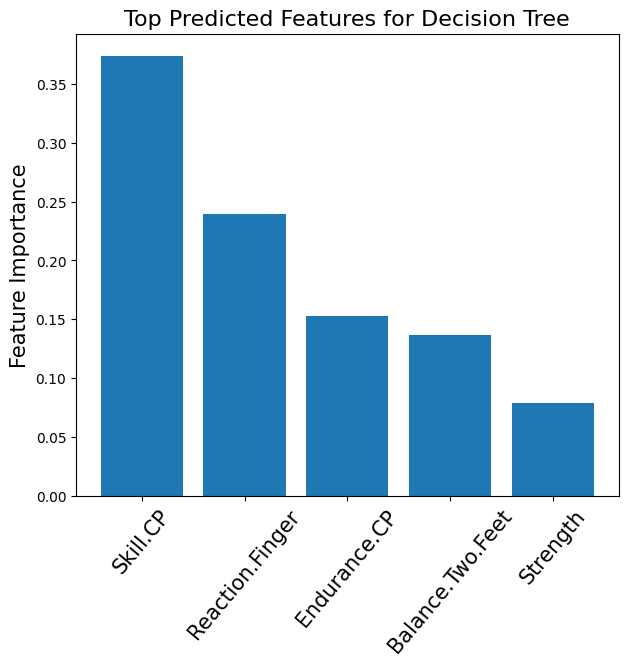

Training Set:
Cohen's Kappa: 0.6679412356610988
Confusion Matrix:
[[100   2]
 [ 31  67]]
Accuracy: 0.835
Precision: 0.9710144927536232
Recall: 0.6836734693877551
F1 Score: 0.8023952095808383

Test Set:
Cohen's Kappa: 0.6050552922590837
Confusion Matrix:
[[21  2]
 [ 8 19]]
Accuracy: 0.8
Precision: 0.9047619047619048
Recall: 0.7037037037037037
F1 Score: 0.7916666666666667

Cross-Validation Scores: [0.755, 0.755, 0.755]
Training Specificity: 0.9803921568627451
Training Sensitivity: 0.6836734693877551
Test Specificity: 0.9130434782608695
Test Sensitivity: 0.7037037037037037
Balanced Accuracy (Training Data): 0.8320328131252501
Balanced Accuracy (Test Data): 0.8083735909822867

**********************************************************************************************************
Top 5 Most Important Features: Index(['Skill.CP', 'Balance.One.Foot', 'Balance.Two.Feet', 'Skill.AC',
       'Skill.BFL'],
      dtype='object')


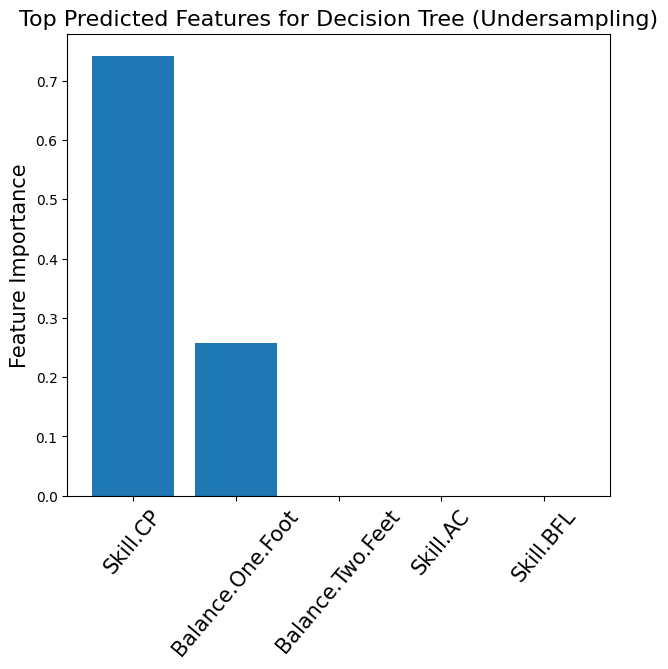

Training Set:
Cohen's Kappa: 0.5652173913043479
Confusion Matrix:
[[22  1]
 [ 9 14]]
Accuracy: 0.782608695652174
Precision: 0.9333333333333333
Recall: 0.6086956521739131
F1 Score: 0.7368421052631579

Test Set:
Cohen's Kappa: 0.33333333333333337
Confusion Matrix:
[[4 2]
 [2 4]]
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666

Cross-Validation Scores (Undersampling): [0.6088888888888888, 0.6088888888888888, 0.5866666666666666]
Training Specificity: 0.9565217391304348
Training Sensitivity: 0.6086956521739131
Test Specificity: 0.6666666666666666
Test Sensitivity: 0.6666666666666666
Balanced Accuracy (Training Data): 0.782608695652174
Balanced Accuracy (Test Data): 0.6666666666666666


In [24]:
#Decision tree for OVERSAMPLING

# Split the data into features (X) and target variable (y)
X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier with hyperparameters
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10)

# Perform 3 repeats of 5-fold cross-validation
cv_scores = []
for _ in range(3):
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Fit the model to the training data
tree.fit(X_train, y_train)

# Get the feature importance
feature_importance = tree.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

# Specify the number of top features to display
top_n = 5

# Print the top n most important features
selected_features = X_train.columns[sorted_indices[:top_n]]
print('Top', top_n, 'Most Important Features:', selected_features)

# Create the bar graph
plt.figure(figsize=(7, 6))  # Increase the figure size for better visibility
plt.bar(selected_features, feature_importance[sorted_indices[:top_n]])
#plt.xlabel('Features', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Feature Importance', fontsize=15)  # Increase font size for y-axis label
plt.title('Top Predicted Features for Decision Tree', fontsize=16)  # Increase font size for title
plt.xticks(rotation=50, fontsize=15)  # Increase font size and rotate x-axis labels for better visibility
plt.show()


# Predict labels for training and test data
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calculate Cohen's kappa for training and test data
kappa_train = cohen_kappa_score(y_train, y_train_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)

# Calculate confusion matrix for training and test data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy for training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision for training and test data
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

# Calculate recall for training and test data
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate F1 score for training and test data
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the performance metrics
print('Training Set:')
print('Cohen\'s Kappa:', kappa_train)
print('Confusion Matrix:')
print(cm_train)

print('Accuracy:', accuracy_train)
print('Precision:', precision_train)
print('Recall:', recall_train)
print('F1 Score:', f1_train)

print('\nTest Set:')
print('Cohen\'s Kappa:', kappa_test)
print('Confusion Matrix:')
print(cm_test)
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)
print('F1 Score:', f1_test)

print('\nCross-Validation Scores:', cv_scores)

# Calculate specificity and sensitivity
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
print("Training Specificity:", specificity_train)
print("Training Sensitivity:", sensitivity_train)

tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
print("Test Specificity:", specificity_test)
print("Test Sensitivity:", sensitivity_test)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train = (sensitivity_train + specificity_train) / 2
balanced_accuracy_test = (sensitivity_test + specificity_test) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test)

print('\n**********************************************************************************************************')

# Decision tree for UNDERSAMPLING

# Split the data into features (X) and target variable (y)
X_under = df_resampled.drop('CognitiveStatus', axis=1)
y_under = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

# Create a decision tree classifier with hyperparameters
tree_under = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10)

# Perform 3 repeats of 5-fold cross-validation
cv_scores_under = []
for _ in range(3):
    scores_under = cross_val_score(tree_under, X_train_under, y_train_under, cv=5)
    cv_scores_under.append(scores_under.mean())

# Fit the model to the training data
tree_under.fit(X_train_under, y_train_under)

# Get the feature importance
feature_importance_under = tree_under.feature_importances_
sorted_indices_under = np.argsort(feature_importance_under)[::-1]

# Specify the number of top features to display
top_n_under = 5

# Print the top n most important features
selected_features_under = X_train_under.columns[sorted_indices_under[:top_n_under]]
print('Top', top_n_under, 'Most Important Features:', selected_features_under)

# Create the bar graph
plt.figure(figsize=(7, 6))  # Increase the figure size for better visibility
plt.bar(selected_features_under, feature_importance_under[sorted_indices_under[:top_n_under]])
plt.ylabel('Feature Importance', fontsize=15)  # Increase font size for y-axis label
plt.title('Top Predicted Features for Decision Tree (Undersampling)', fontsize=16)  # Increase font size for title
plt.xticks(rotation=50, fontsize=15)  # Increase font size and rotate x-axis labels for better visibility
plt.show()

# Predict labels for training and test data
y_train_pred_under = tree_under.predict(X_train_under)
y_test_pred_under = tree_under.predict(X_test_under)

# Calculate Cohen's kappa for training and test data
kappa_train_under = cohen_kappa_score(y_train_under, y_train_pred_under)
kappa_test_under = cohen_kappa_score(y_test_under, y_test_pred_under)

# Calculate confusion matrix for training and test data
cm_train_under = confusion_matrix(y_train_under, y_train_pred_under)
cm_test_under = confusion_matrix(y_test_under, y_test_pred_under)

# Calculate accuracy for training and test data
accuracy_train_under = accuracy_score(y_train_under, y_train_pred_under)
accuracy_test_under = accuracy_score(y_test_under, y_test_pred_under)

# Calculate precision for training and test data
precision_train_under = precision_score(y_train_under, y_train_pred_under)
precision_test_under = precision_score(y_test_under, y_test_pred_under)

# Calculate recall for training and test data
recall_train_under = recall_score(y_train_under, y_train_pred_under)
recall_test_under = recall_score(y_test_under, y_test_pred_under)

# Calculate F1 score for training and test data
f1_train_under = f1_score(y_train_under, y_train_pred_under)
f1_test_under = f1_score(y_test_under, y_test_pred_under)

# Print the performance metrics
print('Training Set:')
print('Cohen\'s Kappa:', kappa_train_under)
print('Confusion Matrix:')
print(cm_train_under)

print('Accuracy:', accuracy_train_under)
print('Precision:', precision_train_under)
print('Recall:', recall_train_under)
print('F1 Score:', f1_train_under)

print('\nTest Set:')
print('Cohen\'s Kappa:', kappa_test_under)
print('Confusion Matrix:')
print(cm_test_under)

print('Accuracy:', accuracy_test_under)
print('Precision:', precision_test_under)
print('Recall:', recall_test_under)
print('F1 Score:', f1_test_under)

print('\nCross-Validation Scores (Undersampling):', cv_scores_under)

# Calculate specificity and sensitivity for training data
tn_train_under, fp_train_under, fn_train_under, tp_train_under = cm_train_under.ravel()
specificity_train_under = tn_train_under / (tn_train_under + fp_train_under)
sensitivity_train_under = tp_train_under / (tp_train_under + fn_train_under)
print("Training Specificity:", specificity_train_under)
print("Training Sensitivity:", sensitivity_train_under)

# Calculate specificity and sensitivity for test data
tn_test_under, fp_test_under, fn_test_under, tp_test_under = cm_test_under.ravel()
specificity_test_under = tn_test_under / (tn_test_under + fp_test_under)
sensitivity_test_under = tp_test_under / (tp_test_under + fn_test_under)
print("Test Specificity:", specificity_test_under)
print("Test Sensitivity:", sensitivity_test_under)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train_under = (sensitivity_train_under + specificity_train_under) / 2
balanced_accuracy_test_under = (sensitivity_test_under + specificity_test_under) / 2

# Print balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train_under)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test_under)

In [25]:
#Chi2 for Normal/Impaired DT OVERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for oversampling
# Extract the top 5 features from Decision Tree model
top_features_tree = X_train.columns[sorted_indices[:top_n]]

# Perform Chi-square test for the top features with oversampling
for feature_tree in top_features_tree:
    contingency_table_tree = pd.crosstab(y_train, X_train[feature_tree])
    
    # Perform chi-square test
    chi2_stat_tree, p_value_tree, dof_tree, expected_tree = chi2_contingency(contingency_table_tree)
    
    print(f'\nFeature: {feature_tree}')
    print(f'Chi-square statistic: {chi2_stat_tree}')
    print(f'P-value: {p_value_tree}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_tree < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Skill.CP
Chi-square statistic: 76.48490409594851
P-value: 7.10912465221315e-10
There is a significant association between the feature and CognitiveStatus.

Feature: Reaction.Finger
Chi-square statistic: 199.99999999999997
P-value: 2.9962291896997264e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 199.99999999999997
P-value: 2.9962291896997264e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Balance.Two.Feet
Chi-square statistic: 191.1297852474323
P-value: 2.3588504664780694e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Strength
Chi-square statistic: 193.797519007603
P-value: 3.4515826800925235e-06
There is a significant association between the feature and CognitiveStatus.


In [26]:
#Chi2 for Normal/Impaired DT UNDERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for undersampling
# Extract the top 5 features from Decision Tree model
top_features_tree_under = X_train_under.columns[sorted_indices_under[:top_n_under]]

# Perform Chi-square test for the top features with undersampling
for feature_tree_under in top_features_tree_under:
    contingency_table_tree_under = pd.crosstab(y_train_under, X_train_under[feature_tree_under])
    
    # Perform chi-square test
    chi2_stat_tree_under, p_value_tree_under, dof_tree_under, expected_tree_under = chi2_contingency(contingency_table_tree_under)
    
    print(f'\nFeature: {feature_tree_under}')
    print(f'Chi-square statistic: {chi2_stat_tree_under}')
    print(f'P-value: {p_value_tree_under}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_tree_under < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Skill.CP
Chi-square statistic: 22.476190476190478
P-value: 0.06934499988591517
There is no significant association between the feature and CognitiveStatus.

Feature: Balance.One.Foot
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Balance.Two.Feet
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.AC
Chi-square statistic: 17.3
P-value: 0.0993095499688232
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.BFL
Chi-square statistic: 15.583838383838385
P-value: 0.076097367911819
There is no significant association between the feature and CognitiveStatus.


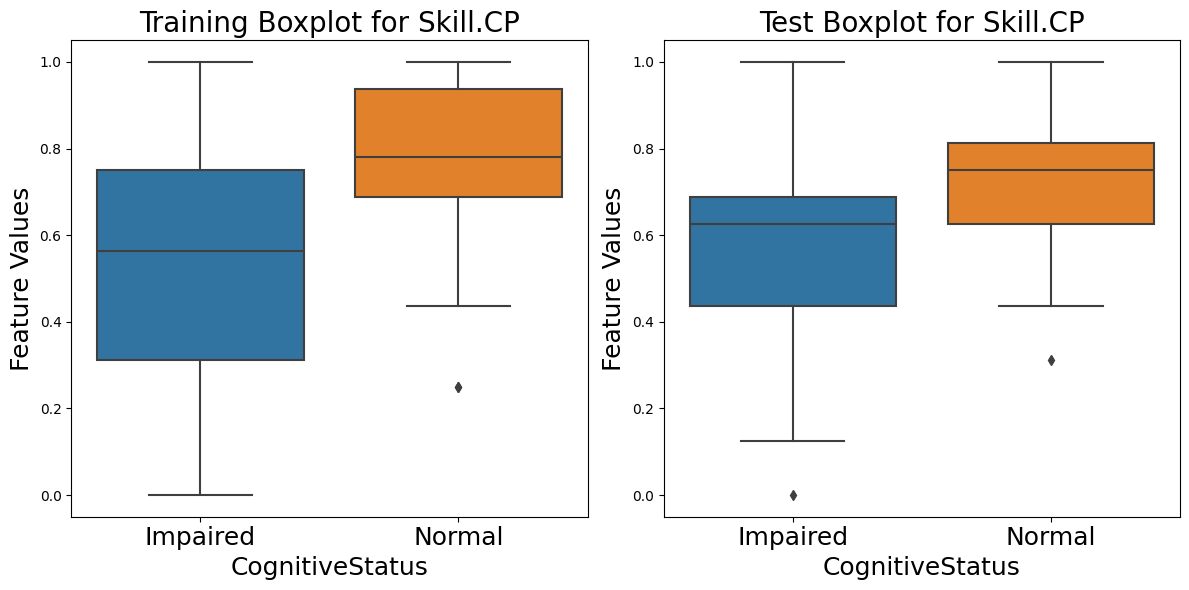

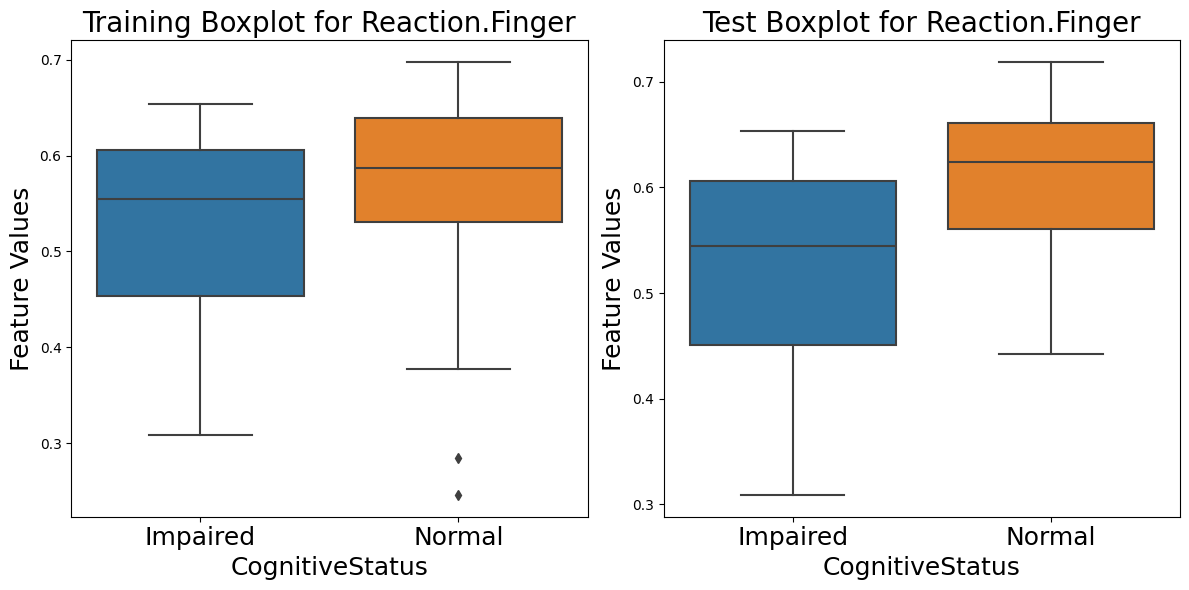

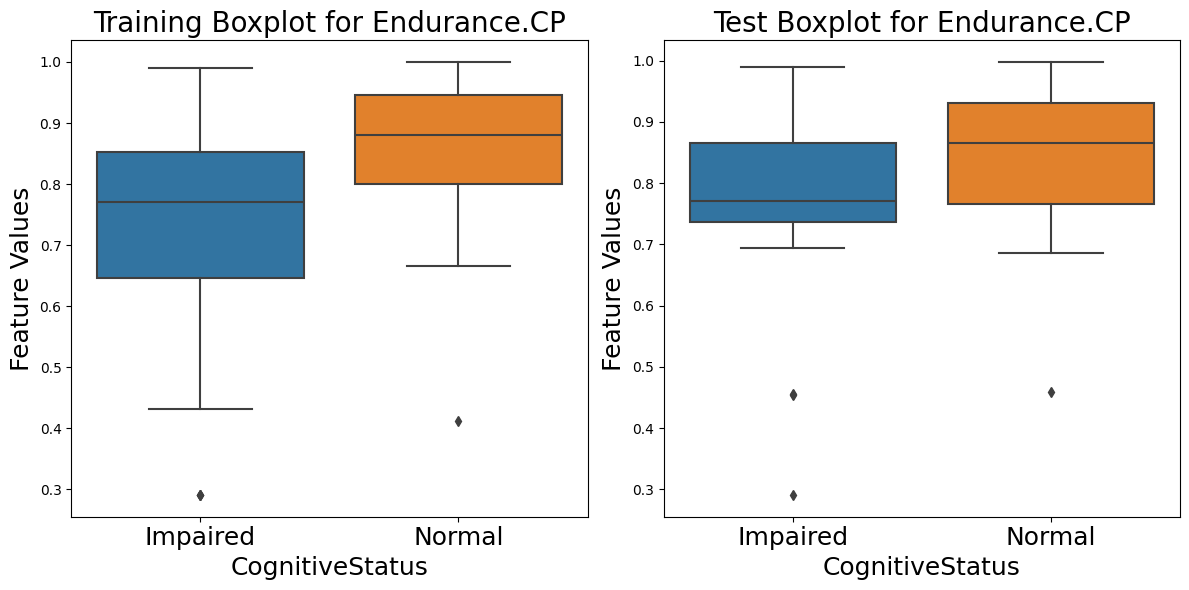

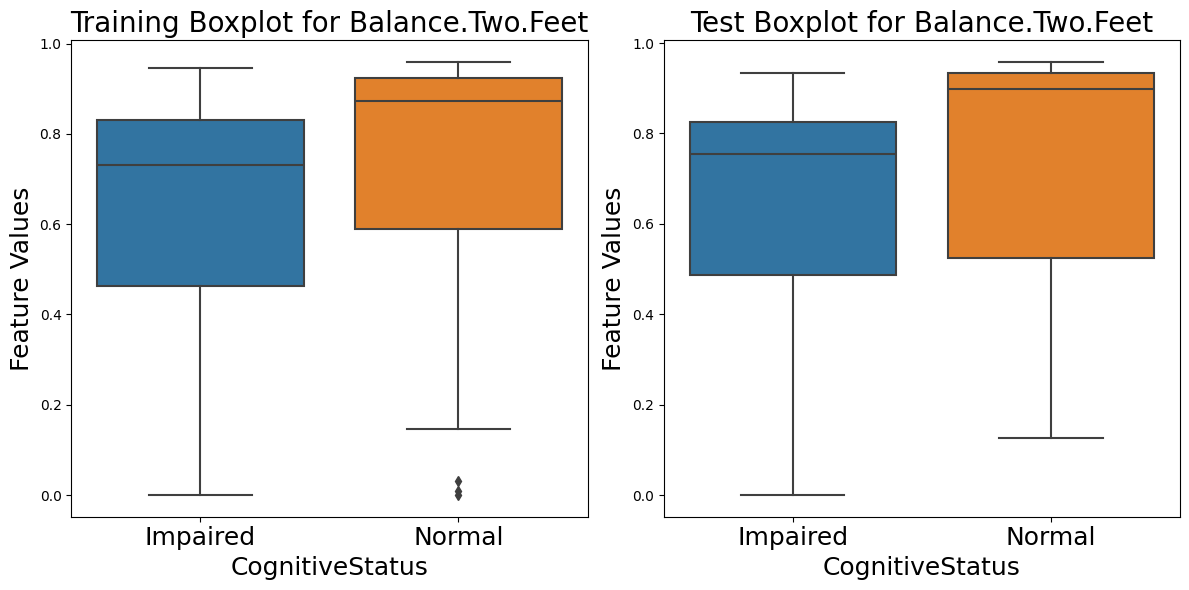

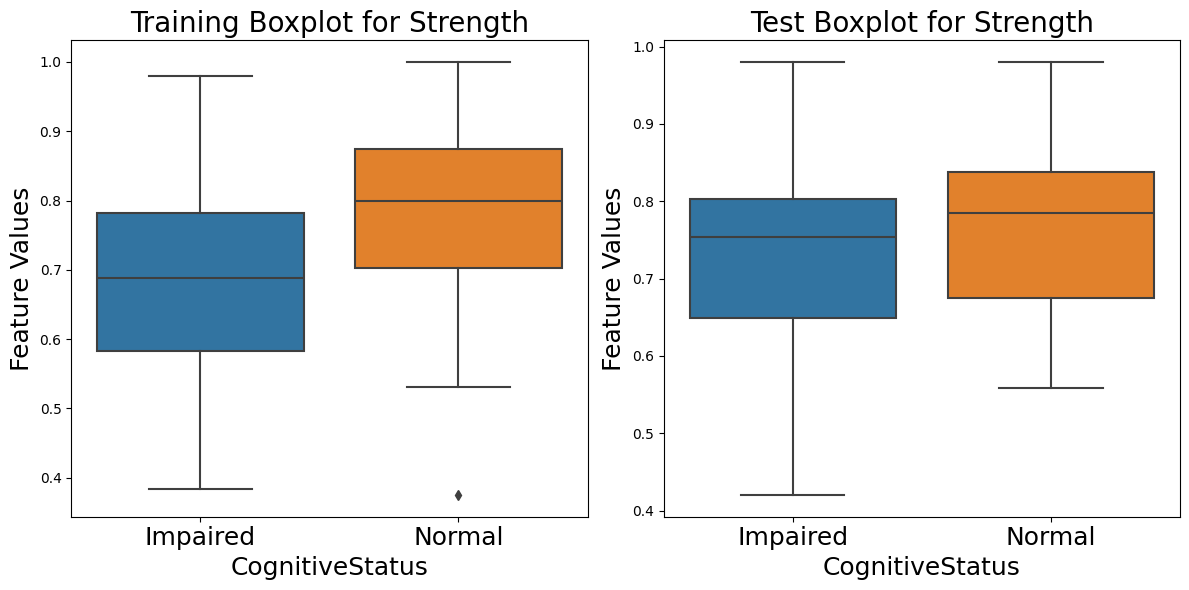

In [27]:
#Boxplots for top features selected Decison tree OVERSAMPLING

# Define the label names for target variable
target_labels = {0: 'Impaired', 1: 'Normal'}

# Iterate over each selected feature
for feature in selected_features:
    # Create a DataFrame with the selected feature and target variable for training data
    train_data_to_plot = pd.DataFrame({feature: X_train[feature], 'CognitiveStatus': y_train.replace(target_labels)})

    # Create a DataFrame with the selected feature and target variable for test data
    test_data_to_plot = pd.DataFrame({feature: X_test[feature], 'CognitiveStatus': y_test.replace(target_labels)})

    # Create subplots for train and test boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot for training data
    sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[0])
    axes[0].set_xlabel('CognitiveStatus', fontsize=18)
    axes[0].set_ylabel('Feature Values', fontsize=18)
    axes[0].set_title(f'Training Boxplot for {feature}', fontsize=20)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    # Plot boxplot for test data
    sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature, ax=axes[1])
    axes[1].set_xlabel('CognitiveStatus', fontsize=18)
    axes[1].set_ylabel('Feature Values', fontsize=18)
    axes[1].set_title(f'Test Boxplot for {feature}', fontsize=20)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=18)  # Increase font size for target labels

   
#      #Set legend labels
#     handles, labels = axes[0].get_legend_handles_labels()
#     axes[0].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font size
#     axes[1].legend(handles, [target_labels[int(label)] for label in labels], fontsize=17)  # Increase font siz

    plt.tight_layout()
    plt.show()



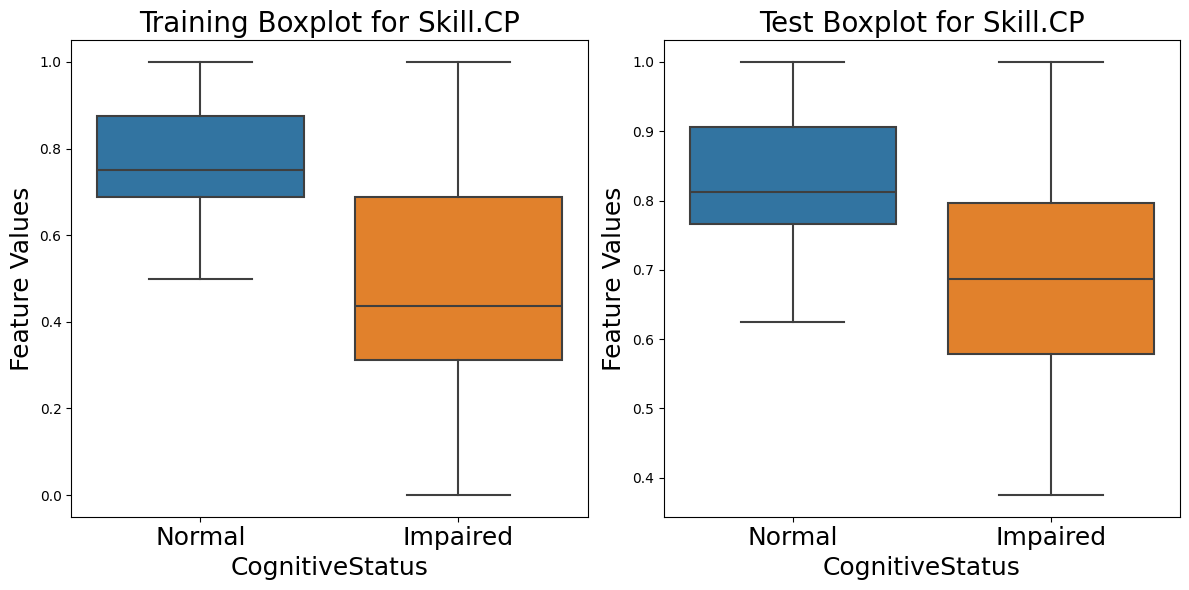

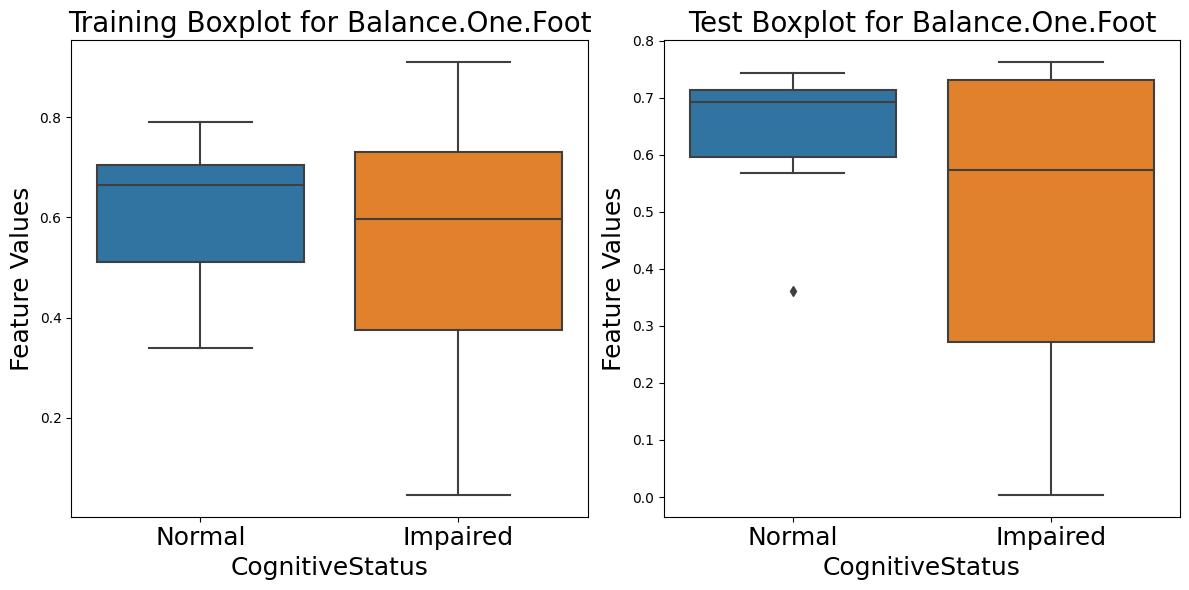

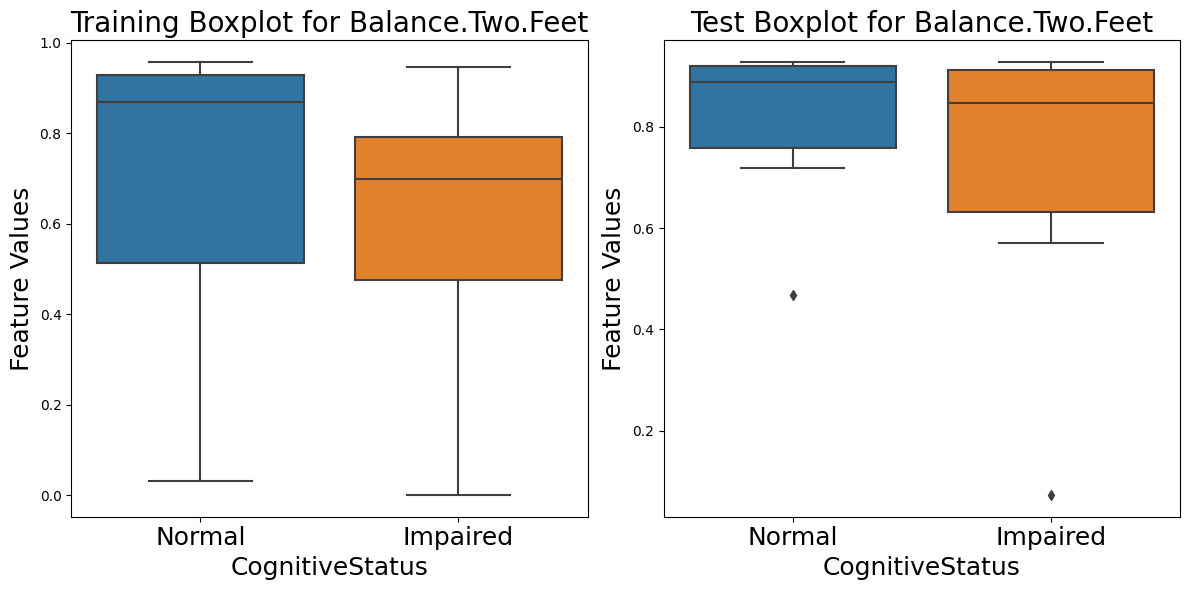

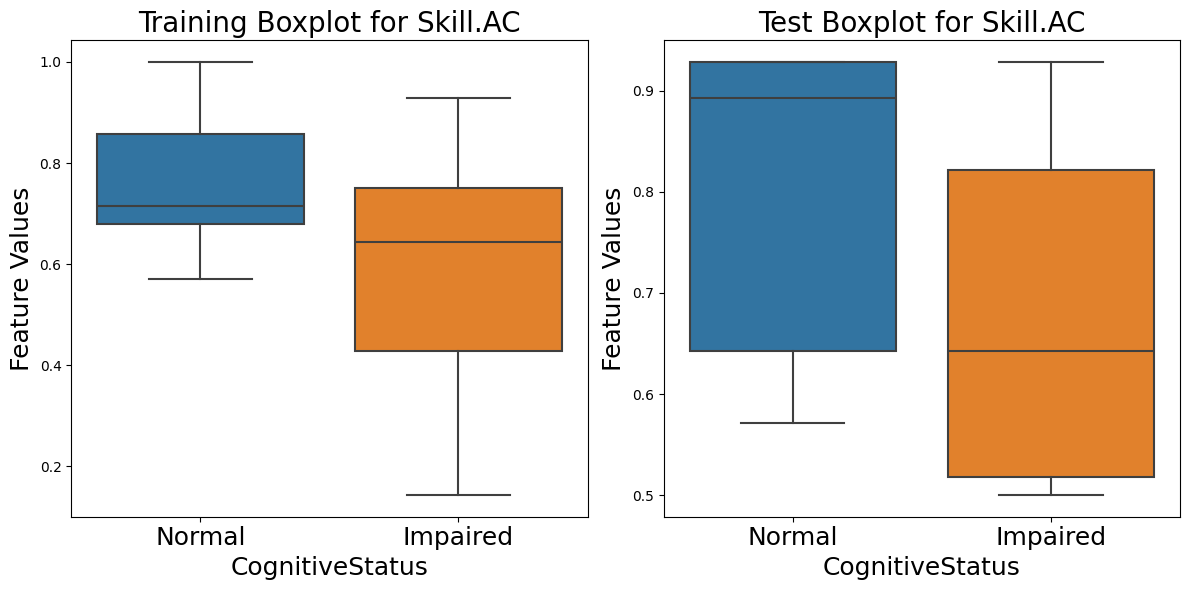

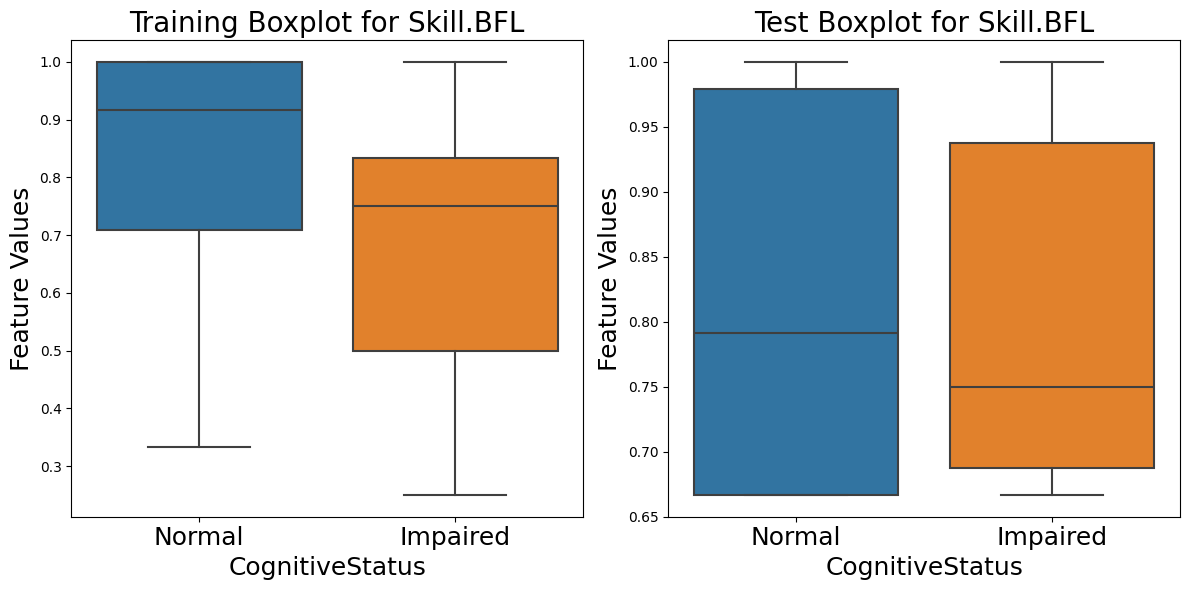

In [28]:
#Boxplot code for DT UNDERSAMPLING

# Define the label names for the target variable
target_labels_under = {0: 'Impaired', 1: 'Normal'}

# Iterate over each selected feature
for feature_under in selected_features_under:
    # Create a DataFrame with the selected feature and target variable for training data
    train_data_to_plot_under = pd.DataFrame({feature_under: X_train_under[feature_under], 'CognitiveStatus': y_train_under.replace(target_labels_under)})

    # Create a DataFrame with the selected feature and target variable for test data
    test_data_to_plot_under = pd.DataFrame({feature_under: X_test_under[feature_under], 'CognitiveStatus': y_test_under.replace(target_labels_under)})

    # Create subplots for train and test boxplots
    fig_under, axes_under = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot for training data
    sns.boxplot(data=train_data_to_plot_under, x='CognitiveStatus', y=feature_under, ax=axes_under[0])
    axes_under[0].set_xlabel('CognitiveStatus', fontsize=18)
    axes_under[0].set_ylabel('Feature Values', fontsize=18)
    axes_under[0].set_title(f'Training Boxplot for {feature_under}', fontsize=20)
    axes_under[0].set_xticklabels(axes_under[0].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    # Plot boxplot for test data
    sns.boxplot(data=test_data_to_plot_under, x='CognitiveStatus', y=feature_under, ax=axes_under[1])
    axes_under[1].set_xlabel('CognitiveStatus', fontsize=18)
    axes_under[1].set_ylabel('Feature Values', fontsize=18)
    axes_under[1].set_title(f'Test Boxplot for {feature_under}', fontsize=20)
    axes_under[1].set_xticklabels(axes_under[1].get_xticklabels(), fontsize=18)  # Increase font size for target labels

    plt.tight_layout()
    plt.show()



Training Accuracy: 1.0
Test Accuracy: 0.74
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Test Precision: 1.0
Test Recall: 0.5185185185185185
Test F1 Score: 0.6829268292682926
Cross-Validation Scores: [0.835, 0.835, 0.835]
Confusion Matrix (Training Data):
[[102   0]
 [  0  98]]
Confusion Matrix (Test Data):
[[23  0]
 [13 14]]
Cohen's Kappa (Training Data): 1.0
Cohen's Kappa (Test Data): 0.49768160741885636
Training Specificity: 1.0
Training Sensitivity: 1.0
Test Specificity: 1.0
Test Sensitivity: 0.5185185185185185
Balanced Accuracy (Training Data): 1.0
Balanced Accuracy (Test Data): 0.7592592592592593
Selected Features: Index(['Skill', 'Skill.CP', 'Sensation.CP', 'Strength.CP', 'Endurance.CP'], dtype='object')


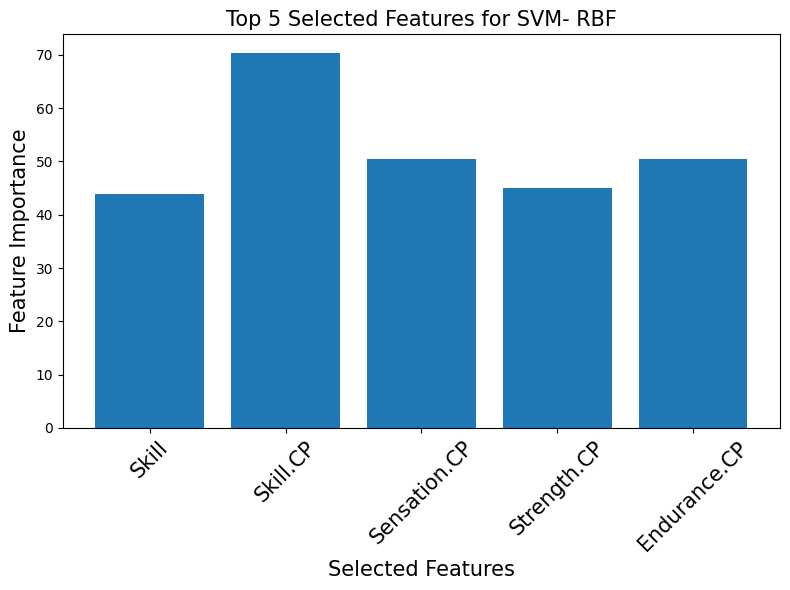


************************************************************************************************************
Training Accuracy: 1.0
Test Accuracy: 0.75
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Test Precision: 0.7142857142857143
Test Recall: 0.8333333333333334
Test F1 Score: 0.7692307692307692
Cross-Validation Scores: [0.6511111111111111, 0.6511111111111111, 0.6511111111111111]
Confusion Matrix (Training Data):
[[23  0]
 [ 0 23]]
Confusion Matrix (Test Data):
[[4 2]
 [1 5]]
Cohen's Kappa (Training Data): 1.0
Cohen's Kappa (Test Data): 0.5
Training Specificity: 1.0
Training Sensitivity: 1.0
Test Specificity: 0.6666666666666666
Test Sensitivity: 0.8333333333333334
Balanced Accuracy (Training Data): 1.0
Balanced Accuracy (Test Data): 0.75
Selected Features: Index(['Skill', 'Skill.CP', 'Sensation', 'Sensation.CP', 'Endurance.CP'], dtype='object')


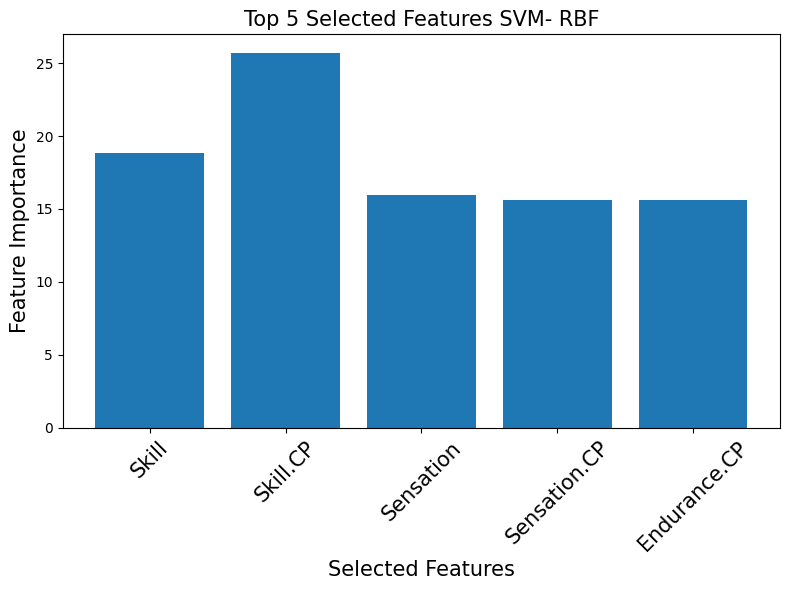

In [29]:
# SVM with polynomial kernel for OVERSAMPLING


X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = SVC(kernel='poly', degree=10, C=3)

# Perform 3 repeats 5-fold cross-validation
cv_scores = []
for _ in range(3):
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Fit the model on the training data
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print('Training Precision:', train_precision)
print('Training Recall:', train_recall)
print('Training F1 Score:', train_f1)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1 Score:', test_f1)

print('Cross-Validation Scores:', cv_scores)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(cm_train)

# Calculate confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):")
print(cm_test)

from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's kappa for the training data
kappa_train = cohen_kappa_score(y_train, y_train_pred)

# Calculate Cohen's kappa for the test data
kappa_test = cohen_kappa_score(y_test, y_test_pred)

print('Cohen\'s Kappa (Training Data):', kappa_train)
print('Cohen\'s Kappa (Test Data):', kappa_test)

# Calculate specificity and sensitivity
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
print("Training Specificity:", specificity_train)
print("Training Sensitivity:", sensitivity_train)

tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
print("Test Specificity:", specificity_test)
print("Test Sensitivity:", sensitivity_test)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train = (sensitivity_train + specificity_train) / 2
balanced_accuracy_test = (sensitivity_test + specificity_test) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test)


# Select top k features based on their ANOVA F-values
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:', selected_features)

# Create a bar graph for selected feature importances
feature_importances = selector.scores_[selected_indices]
plt.figure(figsize=(8, 6))
plt.bar(selected_features, feature_importances)
plt.xlabel('Selected Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15)
plt.title('Top 5 Selected Features for SVM- RBF', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.tight_layout()
plt.show()

print('\n************************************************************************************************************')

# SVM with polynomial kernel for UNDERSAMPLING

# Split the data into features (X) and target variable (y)
X_under = df_resampled.drop('CognitiveStatus', axis=1)
y_under = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

# Create an SVM classifier with polynomial kernel
svm_under = SVC(kernel='poly', degree=20, C=5)

# Perform 3 repeats of 5-fold cross-validation
cv_scores_under = []
for _ in range(3):
    scores_under = cross_val_score(svm_under, X_train_under, y_train_under, cv=5)
    cv_scores_under.append(scores_under.mean())

# Fit the model to the training data
svm_under.fit(X_train_under, y_train_under)

# Predict labels for training and test data
y_train_pred_under = svm_under.predict(X_train_under)
y_test_pred_under = svm_under.predict(X_test_under)

# Calculate accuracy for training and test data
train_accuracy_under = accuracy_score(y_train_under, y_train_pred_under)
test_accuracy_under = accuracy_score(y_test_under, y_test_pred_under)

print('Training Accuracy:', train_accuracy_under)
print('Test Accuracy:', test_accuracy_under)

# Calculate precision, recall, and F1 score for training and test data
train_precision_under = precision_score(y_train_under, y_train_pred_under)
train_recall_under = recall_score(y_train_under, y_train_pred_under)
train_f1_under = f1_score(y_train_under, y_train_pred_under)

test_precision_under = precision_score(y_test_under, y_test_pred_under)
test_recall_under = recall_score(y_test_under, y_test_pred_under)
test_f1_under = f1_score(y_test_under, y_test_pred_under)

print('Training Precision:', train_precision_under)
print('Training Recall:', train_recall_under)
print('Training F1 Score:', train_f1_under)

print('Test Precision:', test_precision_under)
print('Test Recall:', test_recall_under)
print('Test F1 Score:', test_f1_under)

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores_under)

# Calculate confusion matrix for training data
cm_train_under = confusion_matrix(y_train_under, y_train_pred_under)
print("Confusion Matrix (Training Data):")
print(cm_train_under)

# Calculate confusion matrix for test data
cm_test_under = confusion_matrix(y_test_under, y_test_pred_under)
print("Confusion Matrix (Test Data):")
print(cm_test_under)

# Calculate Cohen's kappa for training data
kappa_train_under = cohen_kappa_score(y_train_under, y_train_pred_under)

# Calculate Cohen's kappa for test data
kappa_test_under = cohen_kappa_score(y_test_under, y_test_pred_under)

print('Cohen\'s Kappa (Training Data):', kappa_train_under)
print('Cohen\'s Kappa (Test Data):', kappa_test_under)

# Calculate specificity and sensitivity for training data
tn_train_under, fp_train_under, fn_train_under, tp_train_under = cm_train_under.ravel()
specificity_train_under = tn_train_under / (tn_train_under + fp_train_under)
sensitivity_train_under = tp_train_under / (tp_train_under + fn_train_under)
print("Training Specificity:", specificity_train_under)
print("Training Sensitivity:", sensitivity_train_under)

# Calculate specificity and sensitivity for test data
tn_test_under, fp_test_under, fn_test_under, tp_test_under = cm_test_under.ravel()
specificity_test_under = tn_test_under / (tn_test_under + fp_test_under)
sensitivity_test_under = tp_test_under / (tp_test_under + fn_test_under)
print("Test Specificity:", specificity_test_under)
print("Test Sensitivity:", sensitivity_test_under)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train_under = (sensitivity_train_under + specificity_train_under) / 2
balanced_accuracy_test_under = (sensitivity_test_under + specificity_test_under) / 2

# Print balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train_under)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test_under)

# Select top k features based on their ANOVA F-values
k_under = 5  # Number of top features to select
selector_under = SelectKBest(score_func=f_classif, k=k_under)
X_train_selected_under = selector_under.fit_transform(X_train_under, y_train_under)

# Get the indices of the selected features
selected_indices_under = selector_under.get_support(indices=True)

# Get the names of the selected features
selected_features_under = X_under.columns[selected_indices_under]

# Print the selected features
print('Selected Features:', selected_features_under)

# Create a bar graph for selected feature importances
feature_importances_under = selector_under.scores_[selected_indices_under]
plt.figure(figsize=(8, 6))
plt.bar(selected_features_under, feature_importances_under)
plt.xlabel('Selected Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15)
plt.title('Top 5 Selected Features SVM- RBF', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.tight_layout()
plt.show()


In [30]:
#Chi2 for SVM OVERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for oversampling
# Extract the selected features from SVM with polynomial kernel oversampling model
selected_features_svm = X.columns[selected_indices]

# Perform Chi-square test for the selected features with oversampling
for feature_svm in selected_features_svm:
    contingency_table_svm = pd.crosstab(y_train, X_train[feature_svm])
    
    # Perform chi-square test
    chi2_stat_svm, p_value_svm, dof_svm, expected_svm = chi2_contingency(contingency_table_svm)
    
    print(f'\nFeature: {feature_svm}')
    print(f'Chi-square statistic: {chi2_stat_svm}')
    print(f'P-value: {p_value_svm}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_svm < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Skill
Chi-square statistic: 191.46325196745363
P-value: 4.696303168050306e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 76.48490409594851
P-value: 7.10912465221315e-10
There is a significant association between the feature and CognitiveStatus.

Feature: Sensation.CP
Chi-square statistic: 199.99999999999997
P-value: 2.9962291896997264e-05
There is a significant association between the feature and CognitiveStatus.

Feature: Strength.CP
Chi-square statistic: 41.90453773825481
P-value: 1.4112666307252699e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 199.99999999999997
P-value: 2.9962291896997264e-05
There is a significant association between the feature and CognitiveStatus.


In [31]:
##Chi2 for SVM UNDERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for undersampling
# Extract the selected features from SVM with polynomial kernel undersampling model
selected_features_svm_under = X_under.columns[selected_indices_under]

# Perform Chi-square test for the selected features with undersampling
for feature_svm_under in selected_features_svm_under:
    contingency_table_svm_under = pd.crosstab(y_train_under, X_train_under[feature_svm_under])
    
    # Perform chi-square test
    chi2_stat_svm_under, p_value_svm_under, dof_svm_under, expected_svm_under = chi2_contingency(contingency_table_svm_under)
    
    print(f'\nFeature: {feature_svm_under}')
    print(f'Chi-square statistic: {chi2_stat_svm_under}')
    print(f'P-value: {p_value_svm_under}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_svm_under < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Skill
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 22.476190476190478
P-value: 0.06934499988591517
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation.CP
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.


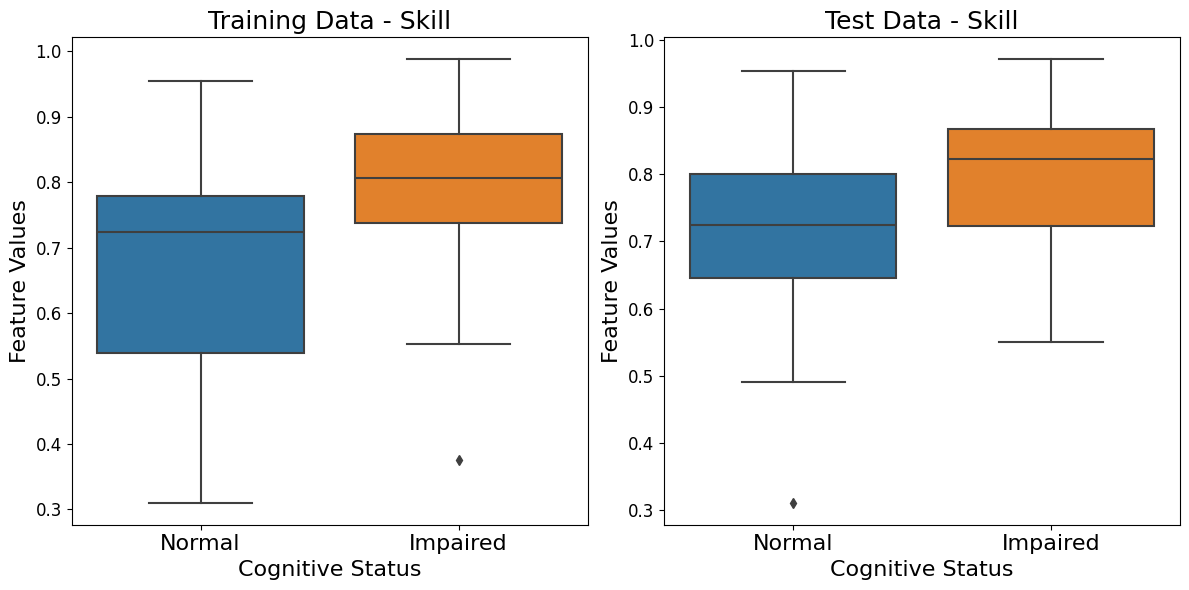

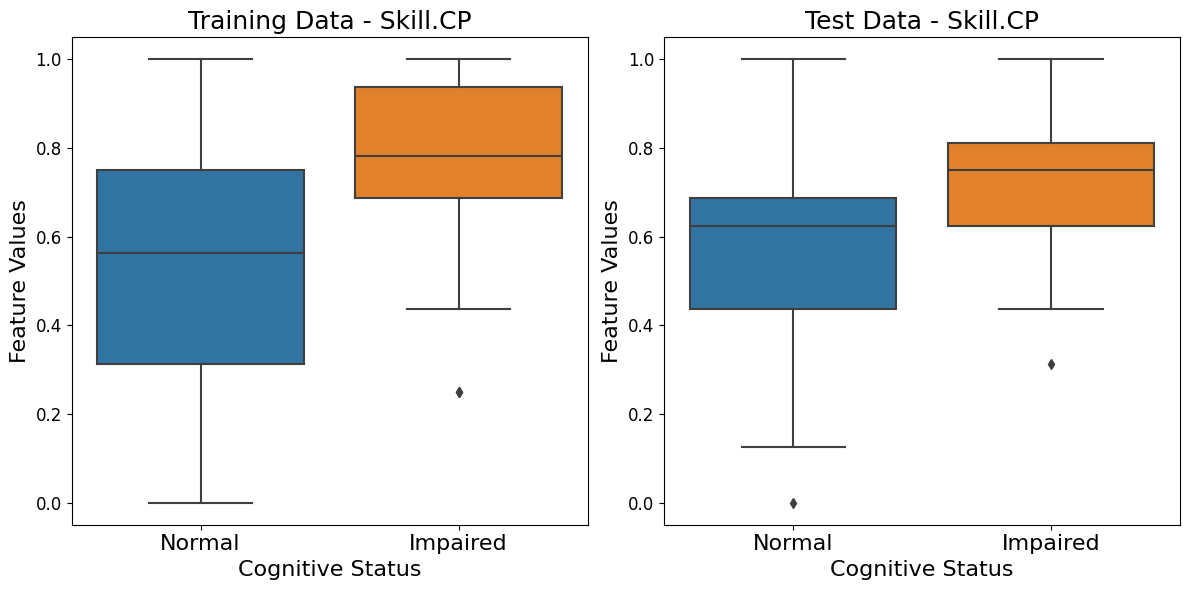

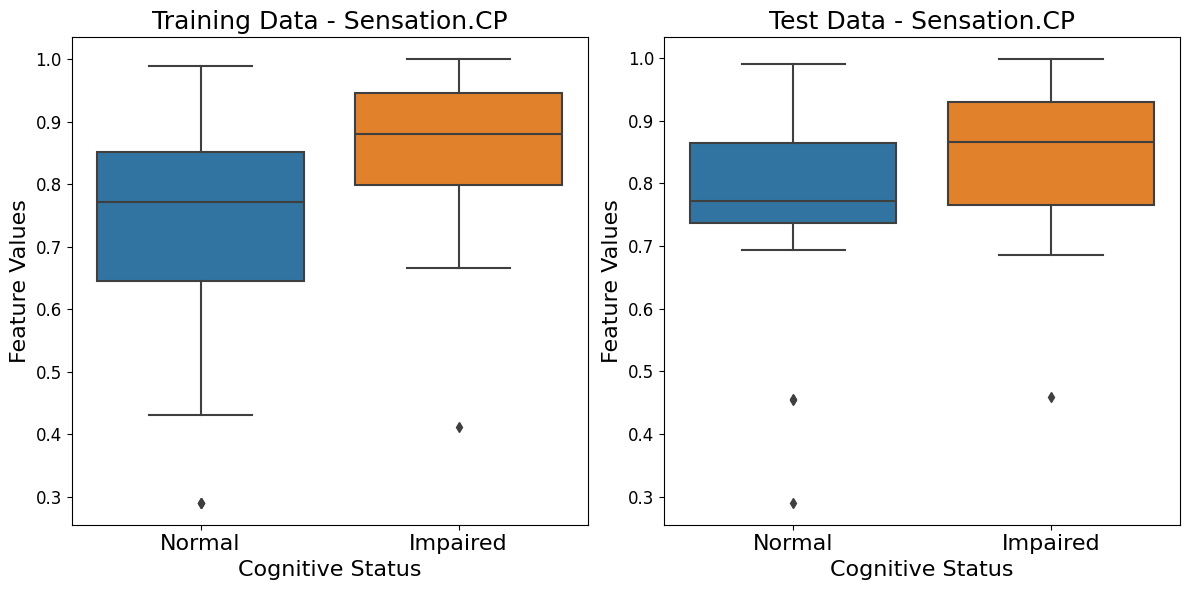

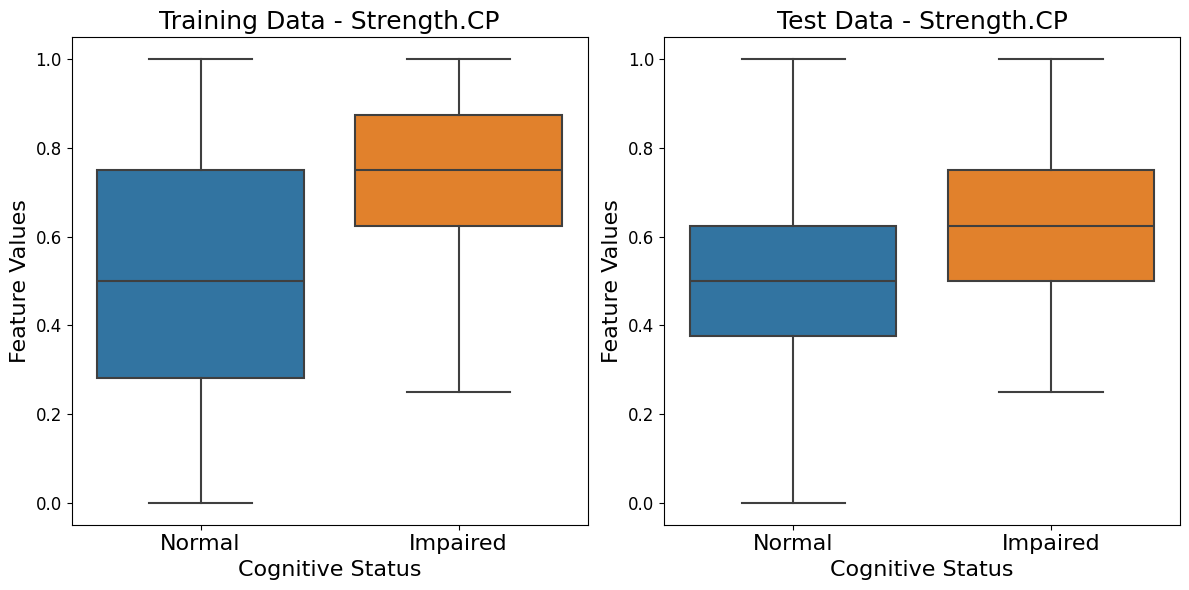

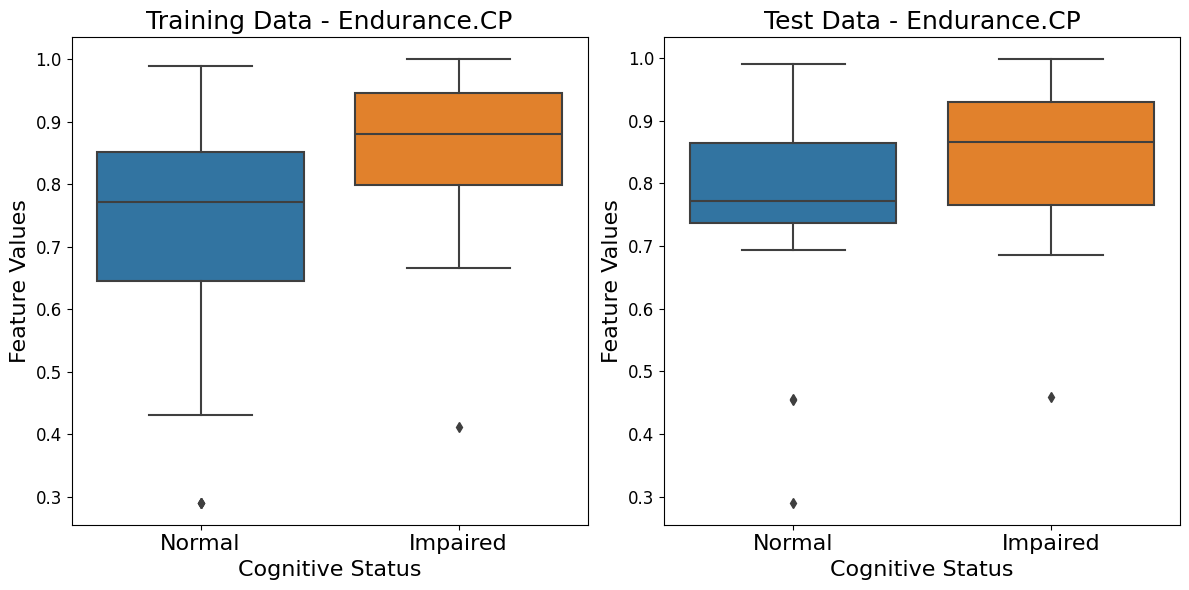

In [32]:
#Boxplot for SVM OVERSAMPLING

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features and target variable for training data
train_data_to_plot = pd.DataFrame(data=np.hstack((X_train_selected, y_train.values.reshape(-1, 1))),
                                  columns=list(selected_features) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data
X_test_selected = X_test.iloc[:, selected_indices]
test_data_to_plot = pd.DataFrame(data=np.hstack((X_test_selected, y_test.values.reshape(-1, 1))),
                                 columns=list(selected_features) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=16)
    plt.ylabel('Feature Values', fontsize=16)
    plt.title(f'Training Data - {feature}', fontsize=18)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=12)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=16)
    plt.ylabel('Feature Values', fontsize=16)
    plt.title(f'Test Data - {feature}', fontsize=18)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

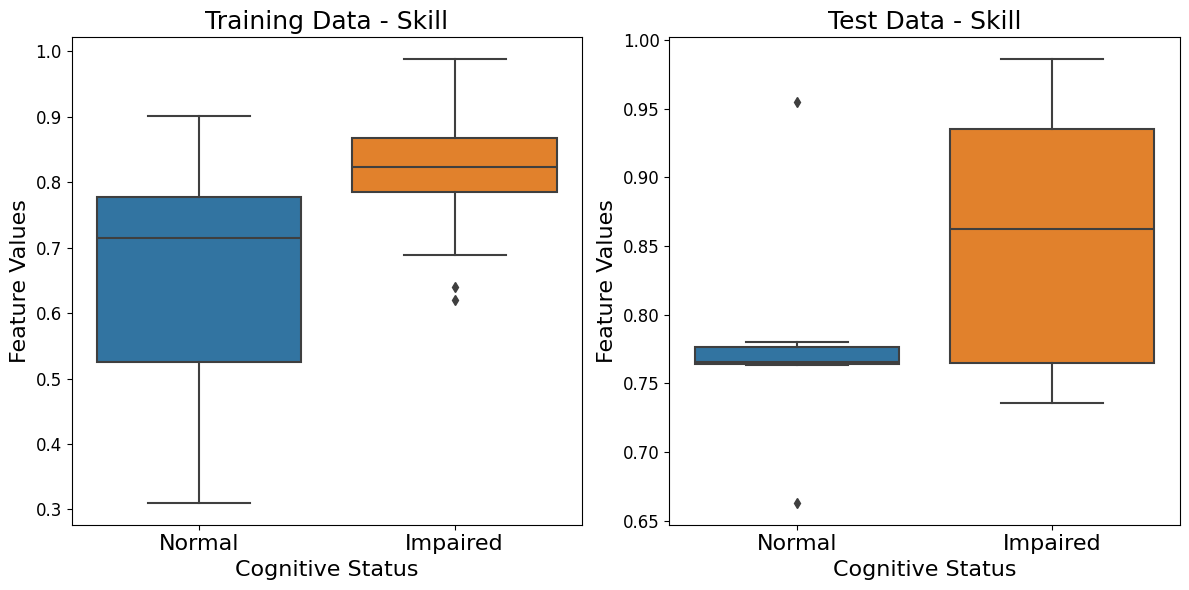

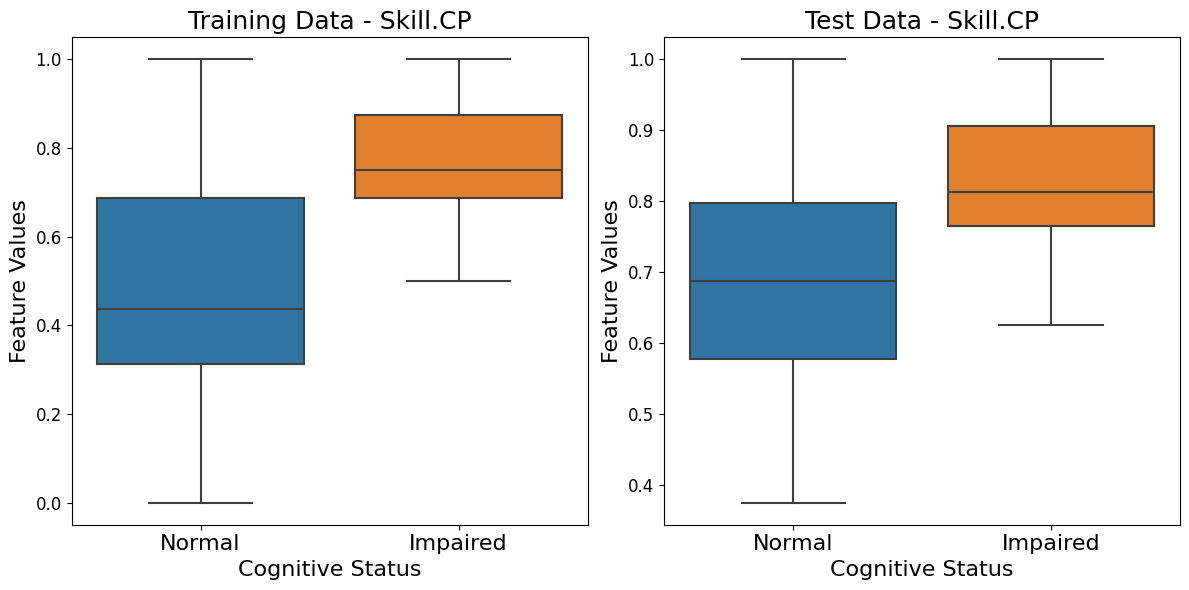

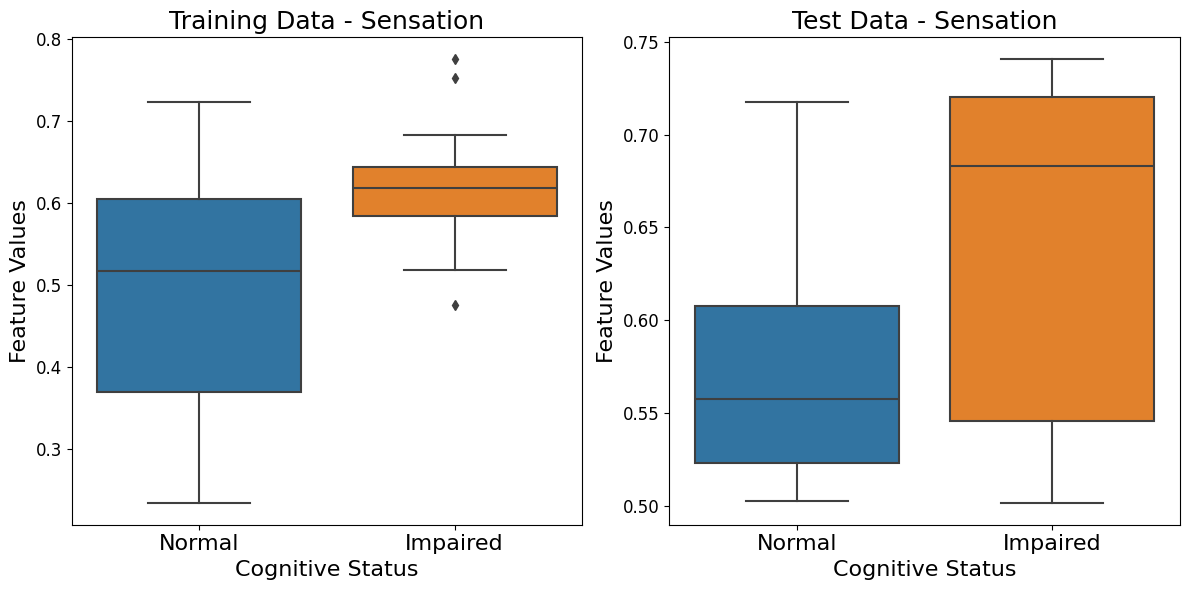

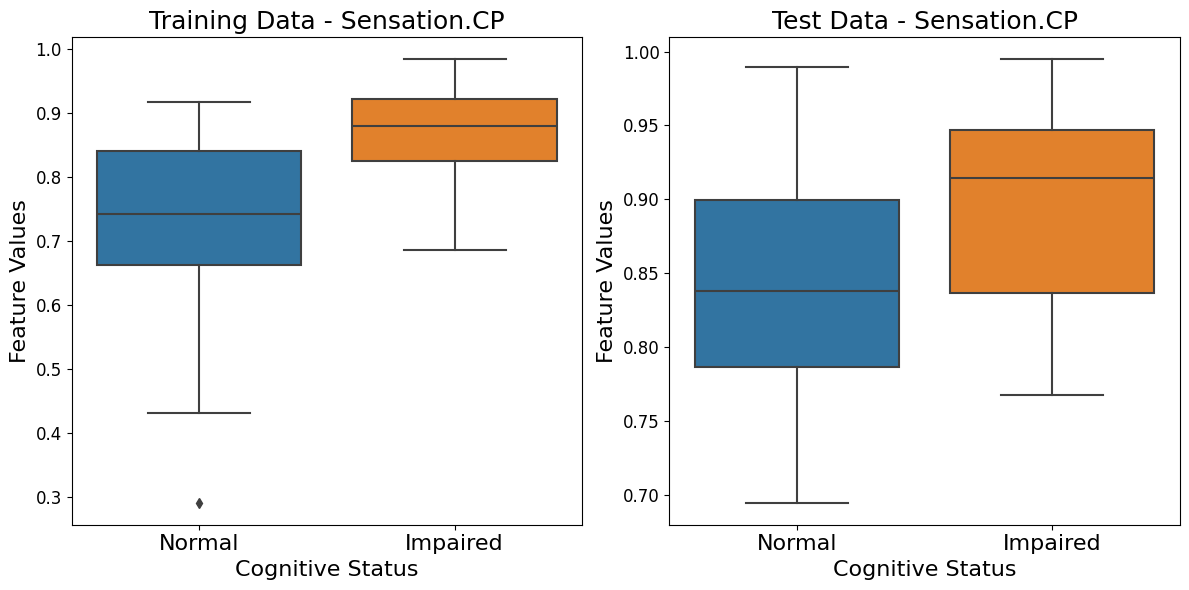

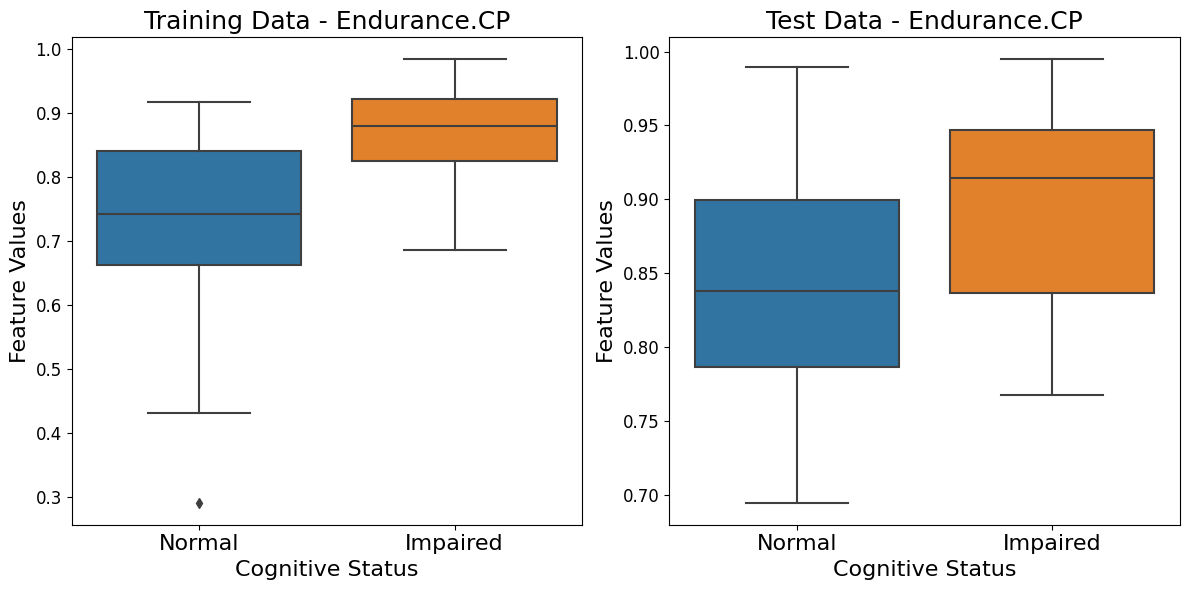

In [33]:
#Boxplot for SVM UNDERSAMPLING

# Get the indices of the selected features
selected_indices_under = selector_under.get_support(indices=True)

# Get the names of the selected features
selected_features_under = X_under.columns[selected_indices_under]

# Create a DataFrame with the selected features and target variable for training data
train_data_to_plot_under = pd.DataFrame(data=np.hstack((X_train_selected_under, y_train_under.values.reshape(-1, 1))),
                                        columns=list(selected_features_under) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data
X_test_selected_under = X_test_under.iloc[:, selected_indices_under]
test_data_to_plot_under = pd.DataFrame(data=np.hstack((X_test_selected_under, y_test_under.values.reshape(-1, 1))),
                                       columns=list(selected_features_under) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data
for feature_under in selected_features_under:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot_under, x='CognitiveStatus', y=feature_under)
    plt.xlabel('Cognitive Status', fontsize=16)
    plt.ylabel('Feature Values', fontsize=16)
    plt.title(f'Training Data - {feature_under}', fontsize=18)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=12)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot_under, x='CognitiveStatus', y=feature_under)
    plt.xlabel('Cognitive Status', fontsize=16)
    plt.ylabel('Feature Values', fontsize=16)
    plt.title(f'Test Data - {feature_under}', fontsize=18)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()



Training Accuracy: 0.93
Test Accuracy: 0.82
Training Precision: 0.8888888888888888
Training Recall: 0.9795918367346939
Training F1 Score: 0.9320388349514563
Test Precision: 0.8214285714285714
Test Recall: 0.8518518518518519
Test F1 Score: 0.8363636363636364
Cross-Validation Scores: [0.8350000000000002, 0.8350000000000002, 0.8350000000000002]
Confusion Matrix (Training Data):
[[90 12]
 [ 2 96]]
Confusion Matrix (Test Data):
[[18  5]
 [ 4 23]]
Cohen's Kappa (Training Data): 0.860223642172524
Cohen's Kappa (Test Data): 0.6365105008077545
Training Specificity: 0.8823529411764706
Training Sensitivity: 0.9795918367346939
Test Specificity: 0.782608695652174
Test Sensitivity: 0.8518518518518519
Balanced Accuracy (Training Data): 0.9309723889555822
Balanced Accuracy (Test Data): 0.817230273752013
Selected Features: Index(['Skill', 'Skill.CP', 'Sensation.CP', 'Strength.CP', 'Endurance.CP'], dtype='object')


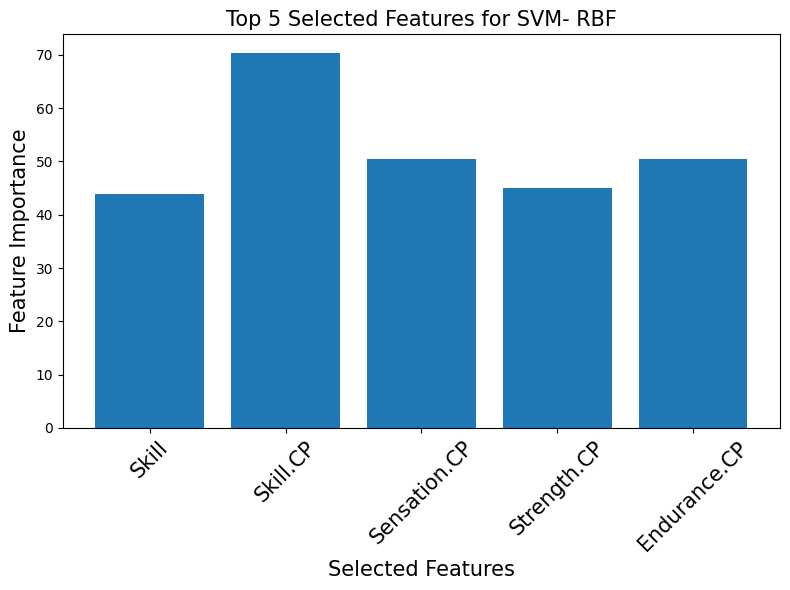


************************************************************************************************************
Training Accuracy: 0.9347826086956522
Test Accuracy: 0.6666666666666666
Training Precision: 0.8846153846153846
Training Recall: 1.0
Training F1 Score: 0.9387755102040816
Test Precision: 0.625
Test Recall: 0.8333333333333334
Test F1 Score: 0.7142857142857143
Cross-Validation Scores: [0.7177777777777777, 0.7177777777777777, 0.7177777777777777]
Confusion Matrix (Training Data):
[[20  3]
 [ 0 23]]
Confusion Matrix (Test Data):
[[3 3]
 [1 5]]
Cohen's Kappa (Training Data): 0.8695652173913043
Cohen's Kappa (Test Data): 0.33333333333333337
Training Specificity: 0.8695652173913043
Training Sensitivity: 1.0
Test Specificity: 0.5
Test Sensitivity: 0.8333333333333334
Balanced Accuracy (Training Data): 0.9347826086956521
Balanced Accuracy (Test Data): 0.6666666666666667
Selected Features: Index(['Skill', 'Skill.CP', 'Sensation', 'Sensation.CP', 'Endurance.CP'], dtype='object')


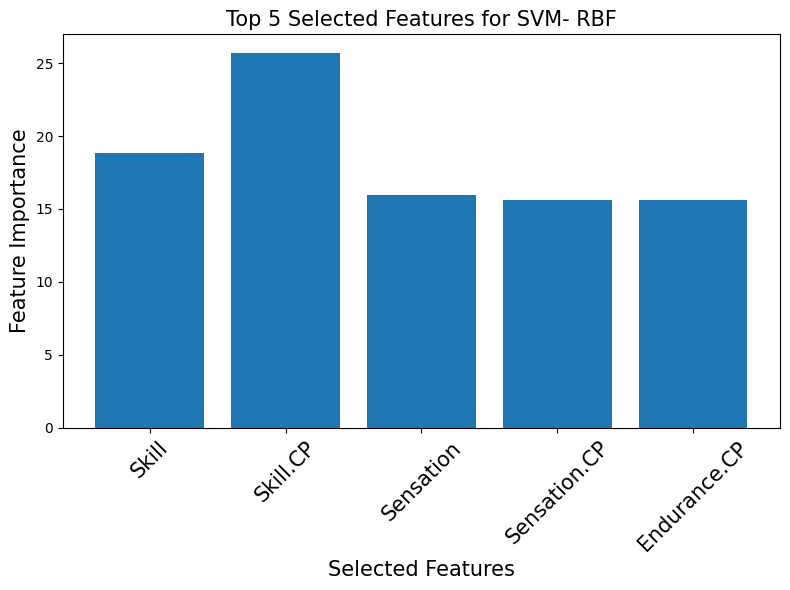

In [34]:
#SVM- RBF (OVERSAMPLING)

X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = SVC(kernel='rbf', degree=10, C=3)

# Perform 3 repeats 5-fold cross-validation
cv_scores = []
for _ in range(3):
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Fit the model on the training data
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print('Training Precision:', train_precision)
print('Training Recall:', train_recall)
print('Training F1 Score:', train_f1)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1 Score:', test_f1)

print('Cross-Validation Scores:', cv_scores)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(cm_train)

# Calculate confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):")
print(cm_test)

from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's kappa for the training data
kappa_train = cohen_kappa_score(y_train, y_train_pred)

# Calculate Cohen's kappa for the test data
kappa_test = cohen_kappa_score(y_test, y_test_pred)

print('Cohen\'s Kappa (Training Data):', kappa_train)
print('Cohen\'s Kappa (Test Data):', kappa_test)

# Calculate specificity and sensitivity
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
print("Training Specificity:", specificity_train)
print("Training Sensitivity:", sensitivity_train)

tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
print("Test Specificity:", specificity_test)
print("Test Sensitivity:", sensitivity_test)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train = (sensitivity_train + specificity_train) / 2
balanced_accuracy_test = (sensitivity_test + specificity_test) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test)


# Select top k features based on their ANOVA F-values
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:', selected_features)

# Create a bar graph for selected feature importances
feature_importances = selector.scores_[selected_indices]
plt.figure(figsize=(8, 6))
plt.bar(selected_features, feature_importances)
plt.xlabel('Selected Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15)
plt.title('Top 5 Selected Features for SVM- RBF', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.tight_layout()
plt.show()

print('\n************************************************************************************************************')

# SVM- RBF (UNDERSAMPLING)

# Split the data into features (X) and target variable (y)
X_under = df_resampled.drop('CognitiveStatus', axis=1)
y_under = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

# Create an SVM classifier with polynomial kernel
svm_under = SVC(kernel='rbf', degree=10, C=3)

# Perform 3 repeats of 5-fold cross-validation
cv_scores_under = []
for _ in range(3):
    scores_under = cross_val_score(svm_under, X_train_under, y_train_under, cv=5)
    cv_scores_under.append(scores_under.mean())

# Fit the model to the training data
svm_under.fit(X_train_under, y_train_under)

# Predict labels for training and test data
y_train_pred_under = svm_under.predict(X_train_under)
y_test_pred_under = svm_under.predict(X_test_under)

# Calculate accuracy for training and test data
train_accuracy_under = accuracy_score(y_train_under, y_train_pred_under)
test_accuracy_under = accuracy_score(y_test_under, y_test_pred_under)

print('Training Accuracy:', train_accuracy_under)
print('Test Accuracy:', test_accuracy_under)

# Calculate precision, recall, and F1 score for training and test data
train_precision_under = precision_score(y_train_under, y_train_pred_under)
train_recall_under = recall_score(y_train_under, y_train_pred_under)
train_f1_under = f1_score(y_train_under, y_train_pred_under)

test_precision_under = precision_score(y_test_under, y_test_pred_under)
test_recall_under = recall_score(y_test_under, y_test_pred_under)
test_f1_under = f1_score(y_test_under, y_test_pred_under)

print('Training Precision:', train_precision_under)
print('Training Recall:', train_recall_under)
print('Training F1 Score:', train_f1_under)

print('Test Precision:', test_precision_under)
print('Test Recall:', test_recall_under)
print('Test F1 Score:', test_f1_under)

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores_under)

# Calculate confusion matrix for training data
cm_train_under = confusion_matrix(y_train_under, y_train_pred_under)
print("Confusion Matrix (Training Data):")
print(cm_train_under)

# Calculate confusion matrix for test data
cm_test_under = confusion_matrix(y_test_under, y_test_pred_under)
print("Confusion Matrix (Test Data):")
print(cm_test_under)

# Calculate Cohen's kappa for training data
kappa_train_under = cohen_kappa_score(y_train_under, y_train_pred_under)

# Calculate Cohen's kappa for test data
kappa_test_under = cohen_kappa_score(y_test_under, y_test_pred_under)

print('Cohen\'s Kappa (Training Data):', kappa_train_under)
print('Cohen\'s Kappa (Test Data):', kappa_test_under)

# Calculate specificity and sensitivity for training data
tn_train_under, fp_train_under, fn_train_under, tp_train_under = cm_train_under.ravel()
specificity_train_under = tn_train_under / (tn_train_under + fp_train_under)
sensitivity_train_under = tp_train_under / (tp_train_under + fn_train_under)
print("Training Specificity:", specificity_train_under)
print("Training Sensitivity:", sensitivity_train_under)

# Calculate specificity and sensitivity for test data
tn_test_under, fp_test_under, fn_test_under, tp_test_under = cm_test_under.ravel()
specificity_test_under = tn_test_under / (tn_test_under + fp_test_under)
sensitivity_test_under = tp_test_under / (tp_test_under + fn_test_under)
print("Test Specificity:", specificity_test_under)
print("Test Sensitivity:", sensitivity_test_under)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train_under = (sensitivity_train_under + specificity_train_under) / 2
balanced_accuracy_test_under = (sensitivity_test_under + specificity_test_under) / 2

# Print balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train_under)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test_under)

# Select top k features based on their ANOVA F-values
k_under = 5  # Number of top features to select
selector_under = SelectKBest(score_func=f_classif, k=k_under)
X_train_selected_under = selector_under.fit_transform(X_train_under, y_train_under)

# Get the indices of the selected features
selected_indices_under = selector_under.get_support(indices=True)

# Get the names of the selected features
selected_features_under = X_under.columns[selected_indices_under]

# Print the selected features
print('Selected Features:', selected_features_under)

# Create a bar graph for selected feature importances
feature_importances_under = selector_under.scores_[selected_indices_under]
plt.figure(figsize=(8, 6))
plt.bar(selected_features_under, feature_importances_under)
plt.xlabel('Selected Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15)
plt.title('Top 5 Selected Features for SVM- RBF', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.tight_layout()
plt.show()


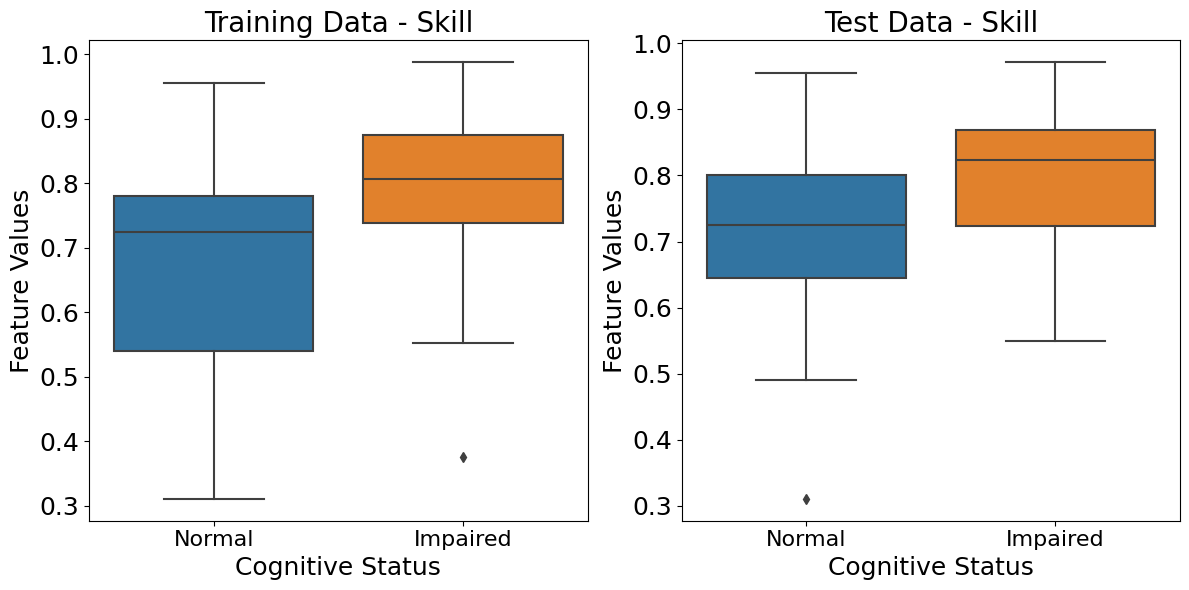

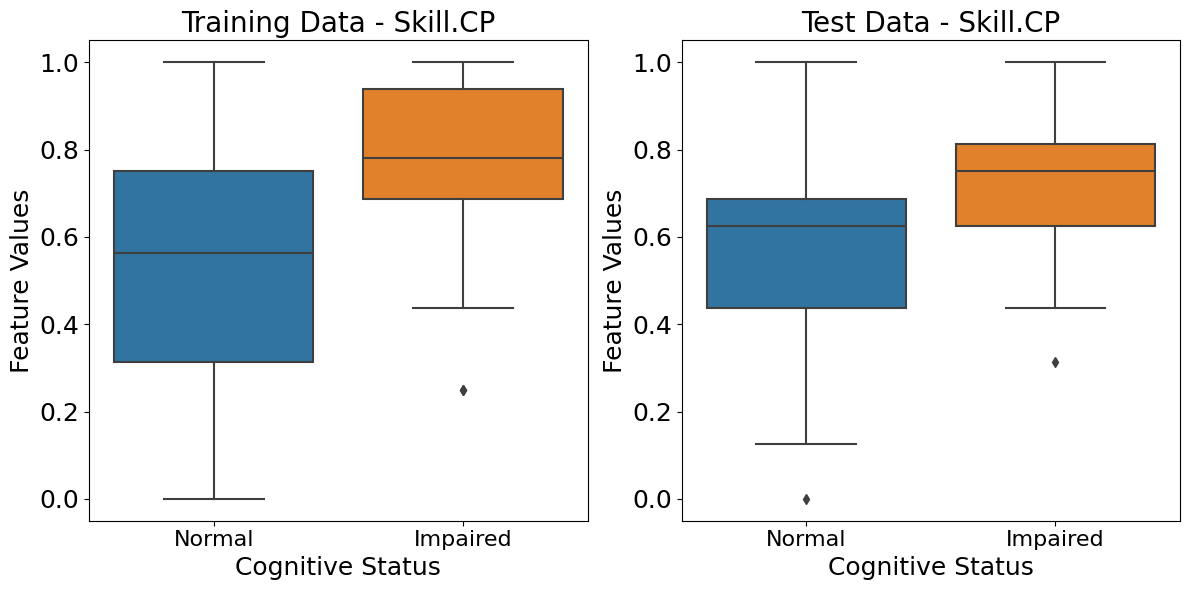

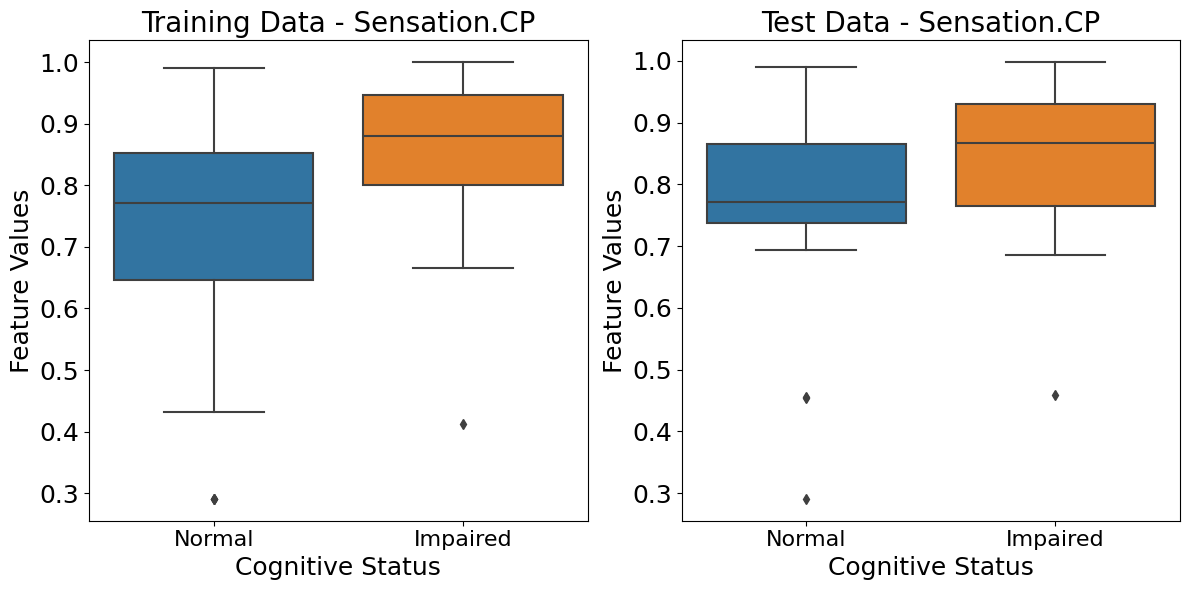

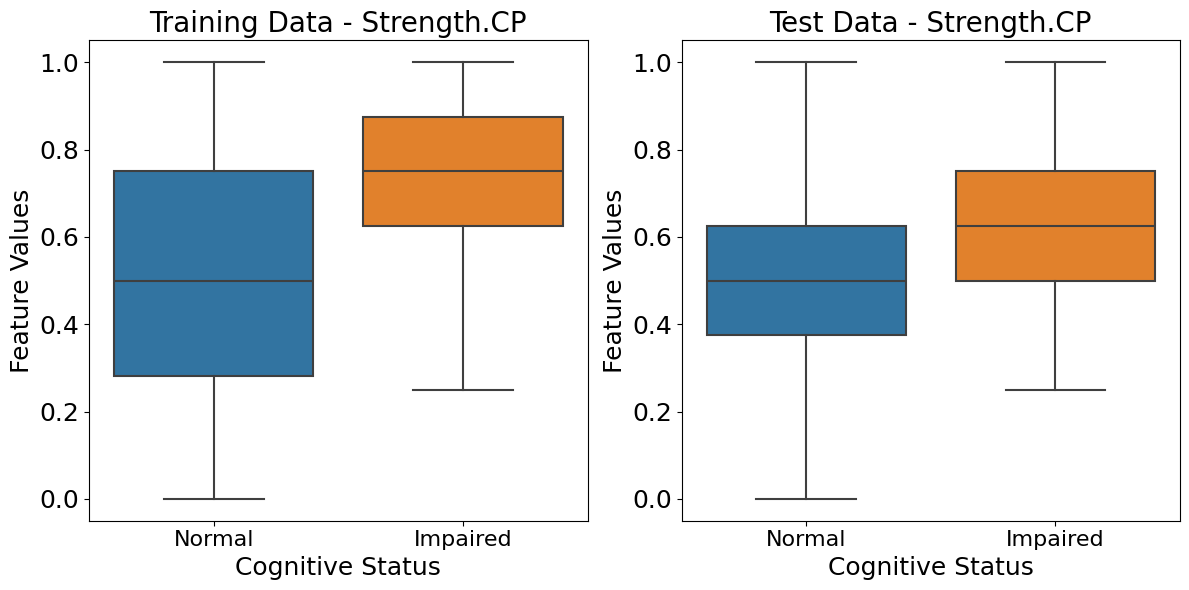

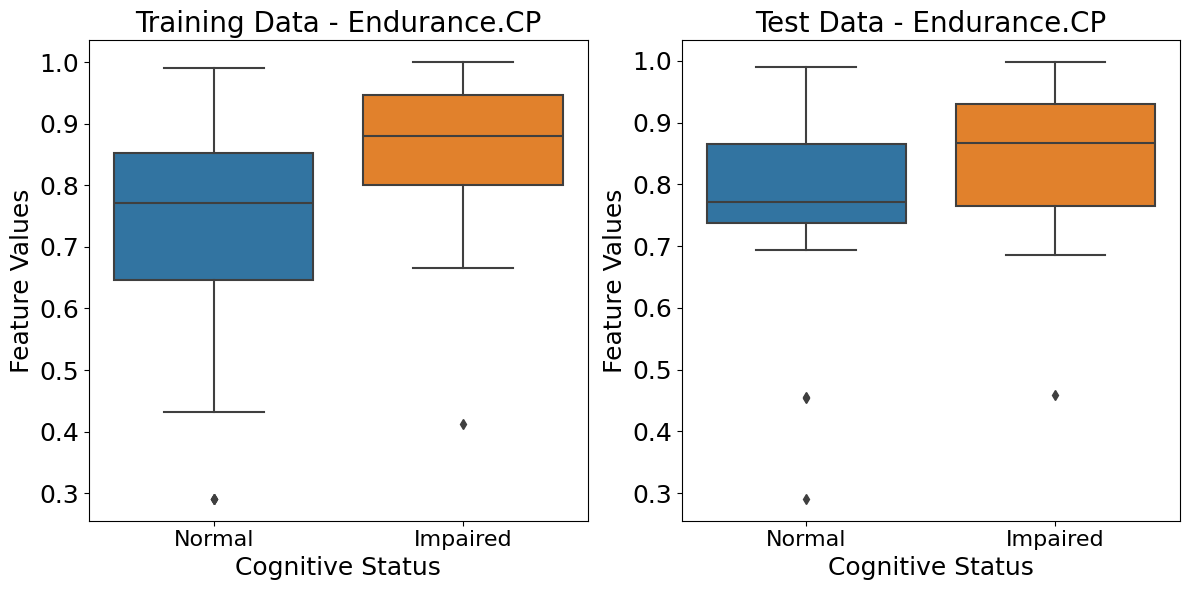

In [36]:
#SVM- RBF Boxplot code OVERSAMPLING

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features and target variable for training data
train_data_to_plot = pd.DataFrame(data=np.hstack((X_train, y_train.values.reshape(-1, 1))),
                                   columns=list(X.columns) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data
test_data_to_plot = pd.DataFrame(data=np.hstack((X_test, y_test.values.reshape(-1, 1))),
                                  columns=list(X.columns) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Training Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Test Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.tight_layout()
    plt.show()




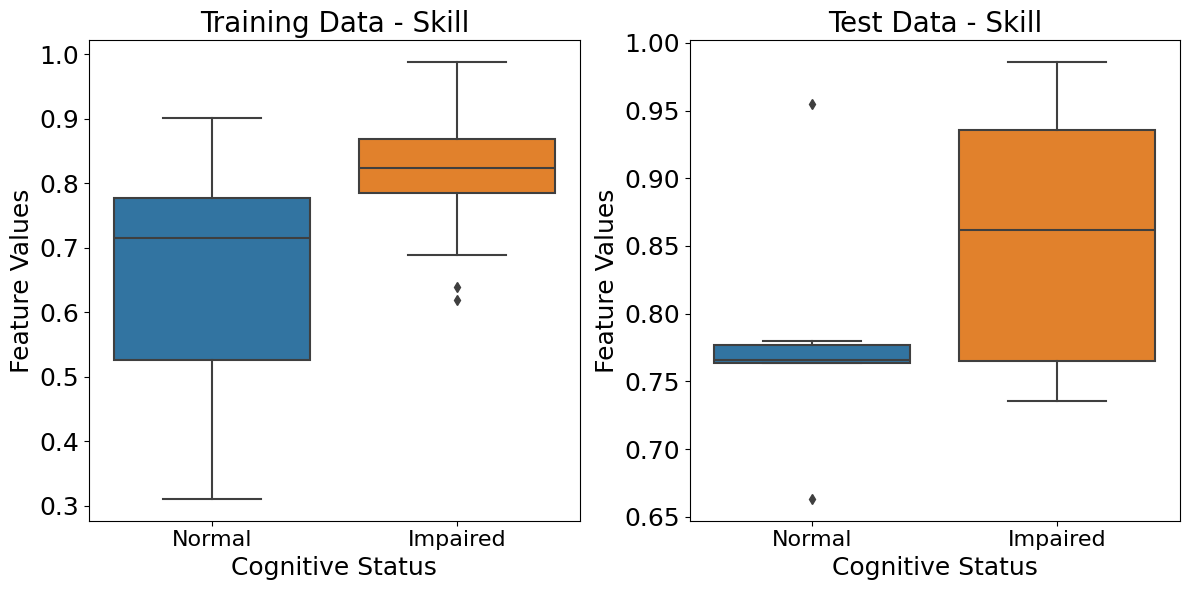

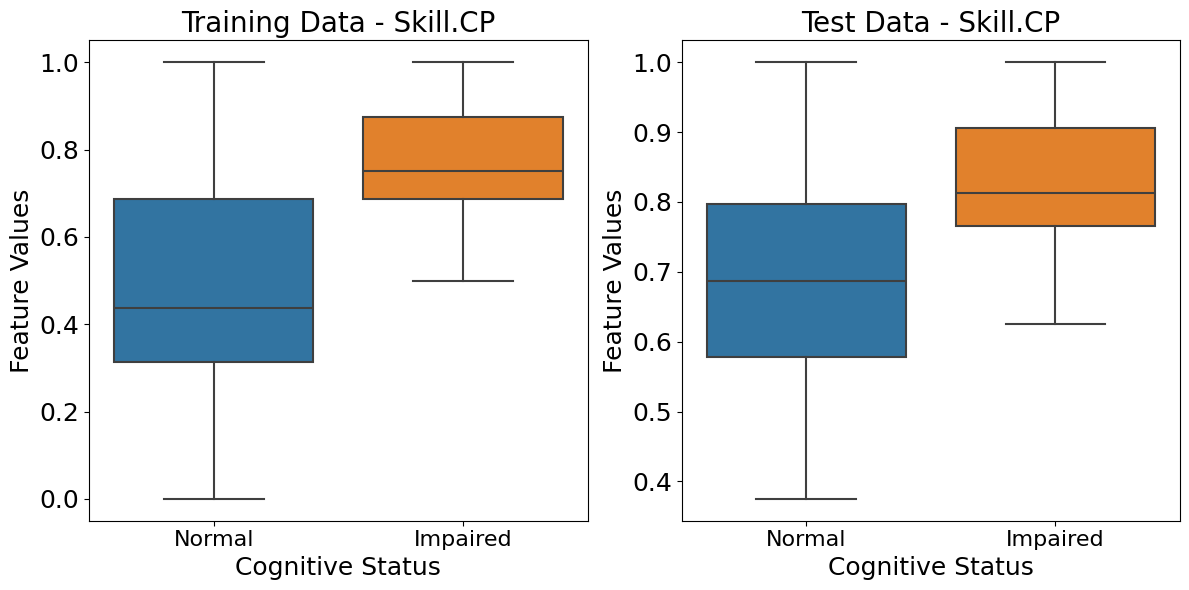

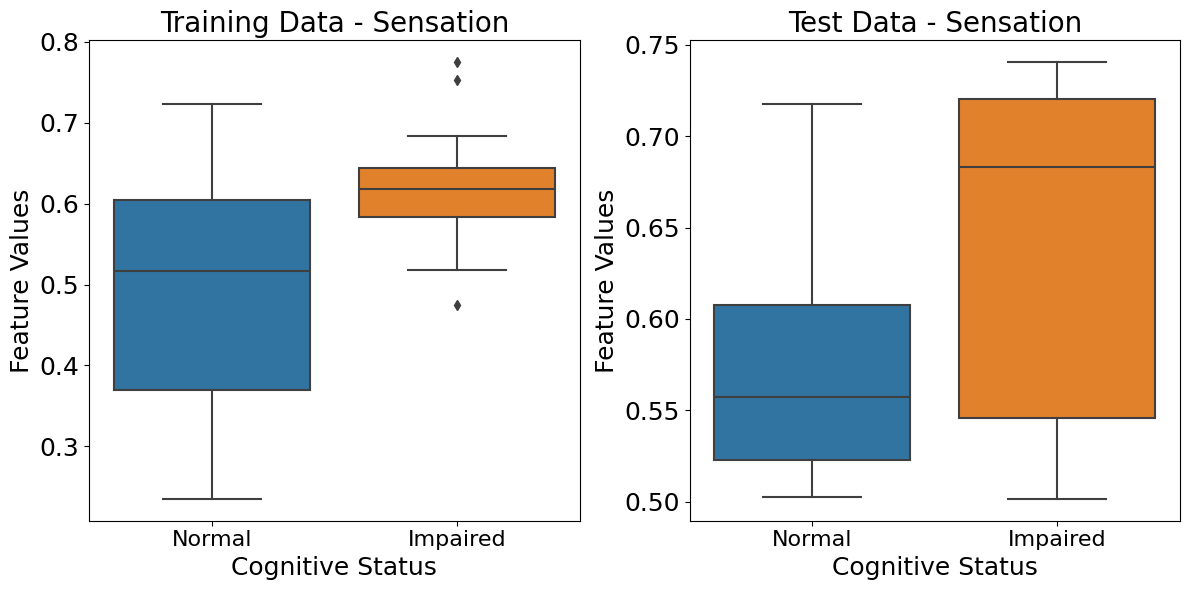

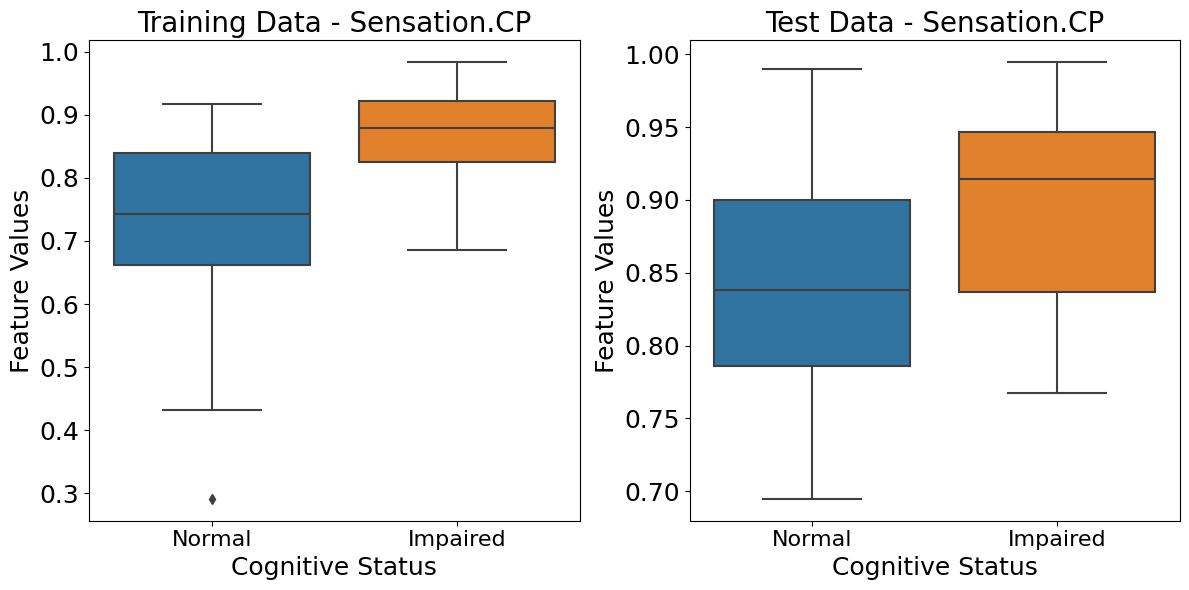

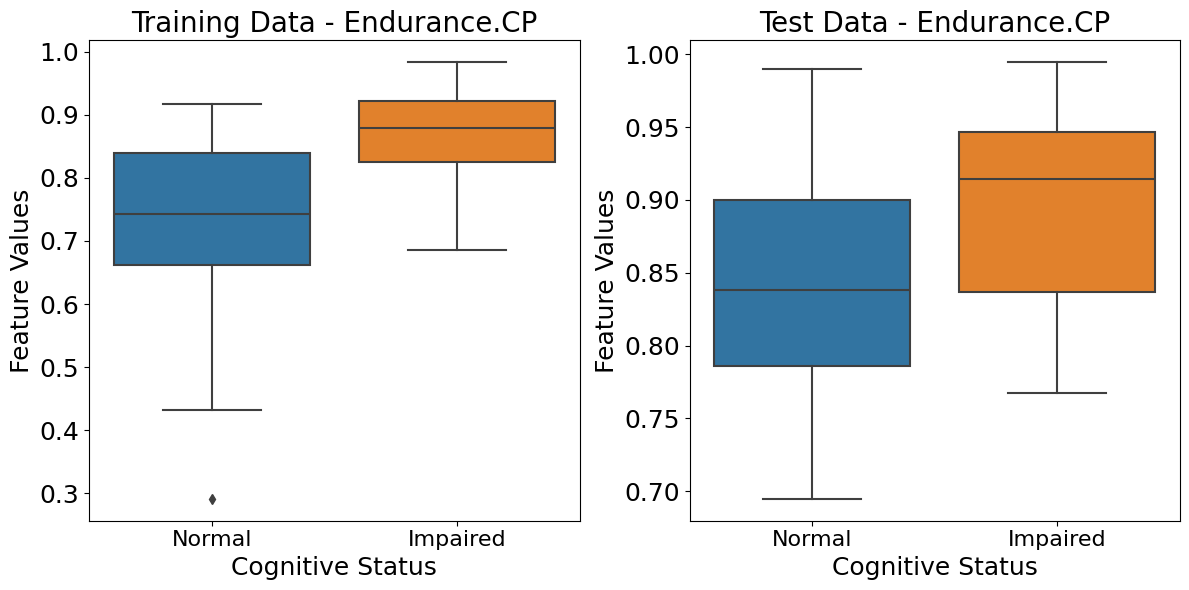

In [37]:
#SVM- RBF code for boxplot (UNDERSAMPLING)

# Get the indices of the selected features
selected_indices_under = selector_under.get_support(indices=True)

# Get the names of the selected features
selected_features_under = X_under.columns[selected_indices_under]

# Create a DataFrame with the selected features and target variable for training data
train_data_to_plot_under = pd.DataFrame(data=np.hstack((X_train_selected_under, y_train_under.values.reshape(-1, 1))),
                                        columns=list(selected_features_under) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data
X_test_selected_under = X_test_under.iloc[:, selected_indices_under]
test_data_to_plot_under = pd.DataFrame(data=np.hstack((X_test_selected_under, y_test_under.values.reshape(-1, 1))),
                                       columns=list(selected_features_under) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data
for feature_under in selected_features_under:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot_under, x='CognitiveStatus', y=feature_under)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Training Data - {feature_under}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot_under, x='CognitiveStatus', y=feature_under)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Test Data - {feature_under}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.tight_layout()
    plt.show()


In [38]:
#SVM- RBF Chi2 test (OVERSAMPLING)

from scipy.stats import chi2_contingency

# Assuming 'CognitiveStatus' is the column indicating normal or impaired
# Extract the top features from SelectKBest based on ANOVA F-score
top_features = selected_features

# Create a contingency table for each top feature
for feature in top_features:
    contingency_table = pd.crosstab(df_r['CognitiveStatus'], X[feature])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f'\nFeature: {feature}')
    print(f'Chi-square statistic: {chi2_stat}')
    print(f'P-value: {p_value}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')




Feature: Skill
Chi-square statistic: 240.66666666666666
P-value: 2.2400954275935465e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 83.54315164801098
P-value: 3.800804100357976e-11
There is a significant association between the feature and CognitiveStatus.

Feature: Sensation.CP
Chi-square statistic: 250.0
P-value: 1.2184928819177127e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Strength.CP
Chi-square statistic: 47.367228849581785
P-value: 1.304976139943546e-07
There is a significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 250.0
P-value: 1.2184928819177127e-06
There is a significant association between the feature and CognitiveStatus.


In [39]:
#SVM- RBF Chi2 test  (UNDERSAMPLING)

from scipy.stats import chi2_contingency

# Assuming 'CognitiveStatus' is the column indicating normal or impaired
# Extract the top features from SelectKBest based on ANOVA F-score
top_features_under = selected_features_under

# Create a contingency table for each top feature
for feature_under in top_features_under:
    contingency_table_under = pd.crosstab(df_resampled['CognitiveStatus'], X_under[feature_under])
    
    # Perform chi-square test
    chi2_stat_under, p_value_under, dof_under, expected_under = chi2_contingency(contingency_table_under)
    
    print(f'\nFeature: {feature_under}')
    print(f'Chi-square statistic: {chi2_stat_under}')
    print(f'P-value: {p_value_under}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value_under < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')



Feature: Skill
Chi-square statistic: 58.0
P-value: 0.4382069211629204
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 25.409523809523805
P-value: 0.04470669883920232
There is a significant association between the feature and CognitiveStatus.

Feature: Sensation
Chi-square statistic: 58.0
P-value: 0.4382069211629204
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation.CP
Chi-square statistic: 58.0
P-value: 0.4382069211629204
There is no significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 58.0
P-value: 0.4382069211629204
There is no significant association between the feature and CognitiveStatus.


Top 5 Most Important Features: Index(['Sensation.CP', 'Skill.CP', 'Endurance.CP', 'Balance.Two.Feet',
       'Skill'],
      dtype='object')


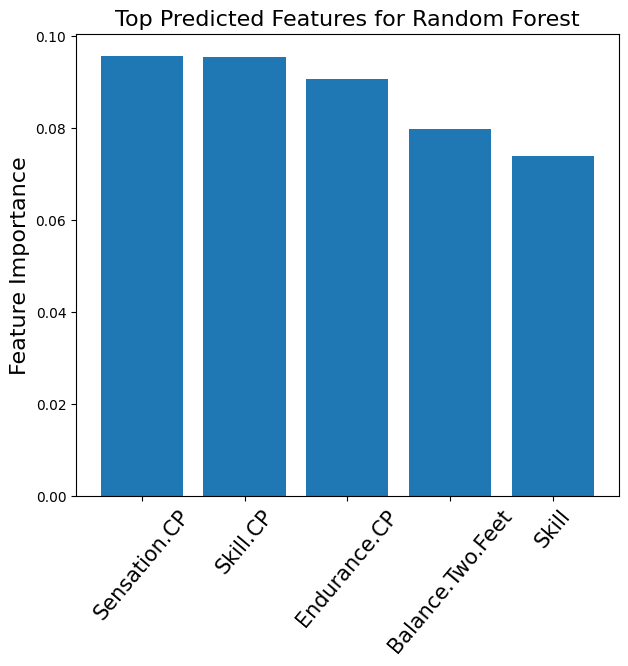

Training Set:
Cohen's Kappa: 0.88
Confusion Matrix:
[[95  7]
 [ 5 93]]
Accuracy: 0.94
Precision: 0.93
Recall: 0.9489795918367347
F1 Score: 0.9393939393939393

Test Set:
Cohen's Kappa: 0.6365105008077545
Confusion Matrix:
[[18  5]
 [ 4 23]]
Accuracy: 0.82
Precision: 0.8214285714285714
Recall: 0.8518518518518519
F1 Score: 0.8363636363636364

Cross-Validation Scores: [0.845, 0.845, 0.845]
Training Specificity: 0.9313725490196079
Training Sensitivity: 0.9489795918367347
Test Specificity: 0.782608695652174
Test Sensitivity: 0.8518518518518519
Balanced Accuracy (Training Data): 0.9401760704281713
Balanced Accuracy (Test Data): 0.817230273752013

************************************************************************************************************
Top 5 Most Important Features: Index(['Skill.CP', 'Sensation.CP', 'Skill.AC', 'Sensation', 'Sensation.AC'], dtype='object')


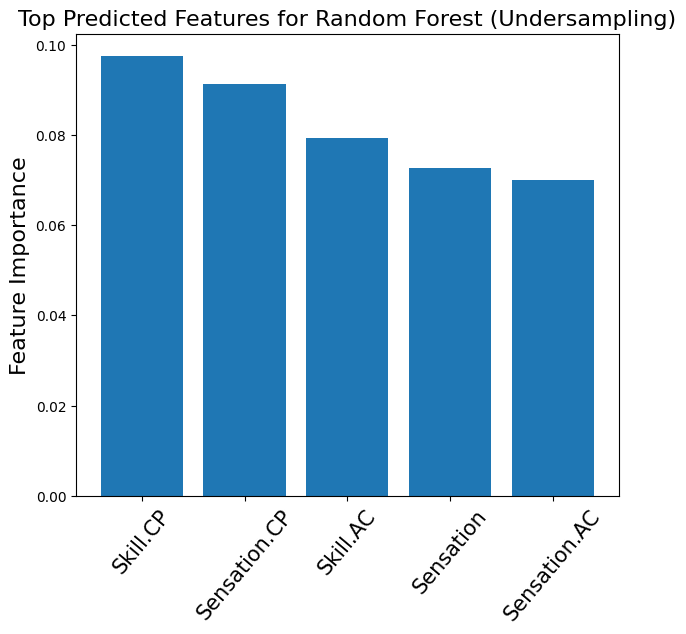

Training Set (Undersampling):
Cohen's Kappa: 0.6521739130434783
Confusion Matrix:
[[17  6]
 [ 2 21]]
Accuracy: 0.8260869565217391
Precision: 0.7777777777777778
Recall: 0.9130434782608695
F1 Score: 0.84

Test Set (Undersampling):
Cohen's Kappa: 0.33333333333333337
Confusion Matrix:
[[4 2]
 [2 4]]
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666

Cross-Validation Scores (Undersampling): [0.74, 0.74, 0.74]
Training Specificity: 0.7391304347826086
Training Sensitivity: 0.9130434782608695
Test Specificity: 0.6666666666666666
Test Sensitivity: 0.6666666666666666
Balanced Accuracy (Training Data): 0.826086956521739
Balanced Accuracy (Test Data): 0.6666666666666666


In [40]:
#Random Forest for OVERSAMPLING

# Split the data into features (X) and target variable (y)
X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest classifier with hyperparameters
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=20, min_samples_leaf=10, random_state=0)

# Perform 3 repeats of 5-fold cross-validation
cv_scores = []
for _ in range(3):
    scores = cross_val_score(forest, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Fit the model to the training data
forest.fit(X_train, y_train)

# Get the feature importance
feature_importance = forest.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

# Specify the number of top features to display
top_n = 5

# Print the top n most important features
selected_features = X_train.columns[sorted_indices[:top_n]]
print('Top', top_n, 'Most Important Features:', selected_features)

# Create the bar graph
plt.figure(figsize=(7, 6))
plt.bar(selected_features, feature_importance[sorted_indices[:top_n]])
plt.ylabel('Feature Importance', fontsize=16)
plt.title('Top Predicted Features for Random Forest', fontsize=16)
plt.xticks(rotation=50, fontsize=15)
plt.show()

# Predict labels for training and test data
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate performance metrics
kappa_train = cohen_kappa_score(y_train, y_train_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print('Training Set:')
print('Cohen\'s Kappa:', kappa_train)
print('Confusion Matrix:')
print(cm_train)
print('Accuracy:', accuracy_train)
print('Precision:', precision_train)
print('Recall:', recall_train)
print('F1 Score:', f1_train)

print('\nTest Set:')
print('Cohen\'s Kappa:', kappa_test)
print('Confusion Matrix:')
print(cm_test)
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)
print('F1 Score:', f1_test)

print('\nCross-Validation Scores:', cv_scores)

# Calculate specificity and sensitivity
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
print("Training Specificity:", specificity_train)
print("Training Sensitivity:", sensitivity_train)

tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
print("Test Specificity:", specificity_test)
print("Test Sensitivity:", sensitivity_test)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train = (sensitivity_train + specificity_train) / 2
balanced_accuracy_test = (sensitivity_test + specificity_test) / 2

# Print the balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test)

print('\n************************************************************************************************************')

#Random Forest for UNDERSAMPLING

# Split the data into features (X) and target variable (y) for undersampling
X_under = df_resampled.drop('CognitiveStatus', axis=1)
y_under = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

# Create a Random Forest classifier for undersampling with hyperparameters
forest_under = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=20, min_samples_leaf=10, random_state=0)

# Perform 3 repeats of 5-fold cross-validation
cv_scores_under = []
for _ in range(3):
    scores_under = cross_val_score(forest_under, X_train_under, y_train_under, cv=5)
    cv_scores_under.append(scores_under.mean())

# Fit the model to the training data
forest_under.fit(X_train_under, y_train_under)

# Get the feature importance
feature_importance_under = forest_under.feature_importances_
sorted_indices_under = np.argsort(feature_importance_under)[::-1]

# Specify the number of top features to display
top_n_under = 5

# Print the top n most important features
selected_features_under = X_train_under.columns[sorted_indices_under[:top_n_under]]
print('Top', top_n_under, 'Most Important Features:', selected_features_under)

# Create the bar graph
plt.figure(figsize=(7, 6))
plt.bar(selected_features_under, feature_importance_under[sorted_indices_under[:top_n_under]])
plt.ylabel('Feature Importance', fontsize=16)
plt.title('Top Predicted Features for Random Forest (Undersampling)', fontsize=16)
plt.xticks(rotation=50, fontsize=15)
plt.show()

# Predict labels for training and test data
y_train_pred_under = forest_under.predict(X_train_under)
y_test_pred_under = forest_under.predict(X_test_under)

# Calculate performance metrics
kappa_train_under = cohen_kappa_score(y_train_under, y_train_pred_under)
kappa_test_under = cohen_kappa_score(y_test_under, y_test_pred_under)

cm_train_under = confusion_matrix(y_train_under, y_train_pred_under)
cm_test_under = confusion_matrix(y_test_under, y_test_pred_under)

accuracy_train_under = accuracy_score(y_train_under, y_train_pred_under)
accuracy_test_under = accuracy_score(y_test_under, y_test_pred_under)

precision_train_under = precision_score(y_train_under, y_train_pred_under)
precision_test_under = precision_score(y_test_under, y_test_pred_under)

recall_train_under = recall_score(y_train_under, y_train_pred_under)
recall_test_under = recall_score(y_test_under, y_test_pred_under)

f1_train_under = f1_score(y_train_under, y_train_pred_under)
f1_test_under = f1_score(y_test_under, y_test_pred_under)

print('Training Set (Undersampling):')
print('Cohen\'s Kappa:', kappa_train_under)
print('Confusion Matrix:')
print(cm_train_under)
print('Accuracy:', accuracy_train_under)
print('Precision:', precision_train_under)
print('Recall:', recall_train_under)
print('F1 Score:', f1_train_under)

print('\nTest Set (Undersampling):')
print('Cohen\'s Kappa:', kappa_test_under)
print('Confusion Matrix:')
print(cm_test_under)
print('Accuracy:', accuracy_test_under)
print('Precision:', precision_test_under)
print('Recall:', recall_test_under)
print('F1 Score:', f1_test_under)

print('\nCross-Validation Scores (Undersampling):', cv_scores_under)

# Calculate specificity and sensitivity for training data
tn_train_under, fp_train_under, fn_train_under, tp_train_under = cm_train_under.ravel()
specificity_train_under = tn_train_under / (tn_train_under + fp_train_under)
sensitivity_train_under = tp_train_under / (tp_train_under + fn_train_under)
print("Training Specificity:", specificity_train_under)
print("Training Sensitivity:", sensitivity_train_under)

# Calculate specificity and sensitivity for test data
tn_test_under, fp_test_under, fn_test_under, tp_test_under = cm_test_under.ravel()
specificity_test_under = tn_test_under / (tn_test_under + fp_test_under)
sensitivity_test_under = tp_test_under / (tp_test_under + fn_test_under)
print("Test Specificity:", specificity_test_under)
print("Test Sensitivity:", sensitivity_test_under)

# Calculate balanced accuracy for training and test data
balanced_accuracy_train_under = (sensitivity_train_under + specificity_train_under) / 2
balanced_accuracy_test_under = (sensitivity_test_under + specificity_test_under) / 2

# Print balanced accuracy
print('Balanced Accuracy (Training Data):', balanced_accuracy_train_under)
print('Balanced Accuracy (Test Data):', balanced_accuracy_test_under)


In [30]:
# #T-test for RF in TRAIN and TEST set OVERSAMPLING

# from scipy.stats import ttest_ind

# # Extract top 5 features
# top_5_features = selected_features[:5]

# # Perform t-test for each feature
# for feature in top_5_features:
#     # Extract feature values for training and test sets
#     feature_values_train = X_train[feature]
#     feature_values_test = X_test[feature]

#     # Perform t-test
#     t_statistic, p_value = ttest_ind(feature_values_train, feature_values_test)

#     # Print results
#     print(f"Feature: {feature}")
#     print(f"T-statistic: {t_statistic}")
#     print(f"P-value: {p_value}")
#     print("-------------------------------")


In [41]:
#Chi2 test for Normal and Imapired top 5 features RF OVERSAMPLING

from scipy.stats import chi2_contingency

# Assuming 'CognitiveStatus' is the column indicating normal or impaired
# Extract the top 5 features from the Random Forest model
top_features = X_train.columns[sorted_indices[:top_n]]

# Create a contingency table for each top feature
for feature in top_features:
    contingency_table = pd.crosstab(df_r['CognitiveStatus'], df_r[feature])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f'\nFeature: {feature}')
    print(f'Chi-square statistic: {chi2_stat}')
    print(f'P-value: {p_value}')

    # Check for statistical significance (common significance level is 0.05)
    if p_value < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')




Feature: Sensation.CP
Chi-square statistic: 250.0
P-value: 1.2184928819177127e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Skill.CP
Chi-square statistic: 83.54315164801098
P-value: 3.800804100357976e-11
There is a significant association between the feature and CognitiveStatus.

Feature: Endurance.CP
Chi-square statistic: 250.0
P-value: 1.2184928819177127e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Balance.Two.Feet
Chi-square statistic: 237.60000000000002
P-value: 1.1379663799893892e-06
There is a significant association between the feature and CognitiveStatus.

Feature: Skill
Chi-square statistic: 240.66666666666666
P-value: 2.2400954275935465e-06
There is a significant association between the feature and CognitiveStatus.


In [42]:
#Chi2 test for Normal and Imapired top 5 features RF UNDERSAMPLING

# Assuming 'CognitiveStatus' is the column indicating normal or impaired for undersampling
# Extract the top 5 features from the Random Forest model
top_features_under = X_train_under.columns[sorted_indices_under[:top_n_under]]

# Perform Chi-square test for the top features with undersampling
for feature_under in top_features_under:
    contingency_table_under = pd.crosstab(y_train_under, X_train_under[feature_under])
    
    # Perform chi-square test
    chi2_stat_under, p_value_under, dof_under, expected_under = chi2_contingency(contingency_table_under)
    
    print(f'\nFeature: {feature_under}')
    print(f'Chi-square statistic: {chi2_stat_under}')
    print(f'P-value: {p_value_under}')

# Check for statistical significance (common significance level is 0.05)
    if p_value_under < 0.05:
        print('There is a significant association between the feature and CognitiveStatus.')
    else:
        print('There is no significant association between the feature and CognitiveStatus.')


Feature: Skill.CP
Chi-square statistic: 22.476190476190478
P-value: 0.06934499988591517
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation.CP
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Skill.AC
Chi-square statistic: 17.3
P-value: 0.0993095499688232
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation
Chi-square statistic: 46.0
P-value: 0.4305962974982489
There is no significant association between the feature and CognitiveStatus.

Feature: Sensation.AC
Chi-square statistic: 42.36363636363636
P-value: 0.18312988725969317
There is no significant association between the feature and CognitiveStatus.


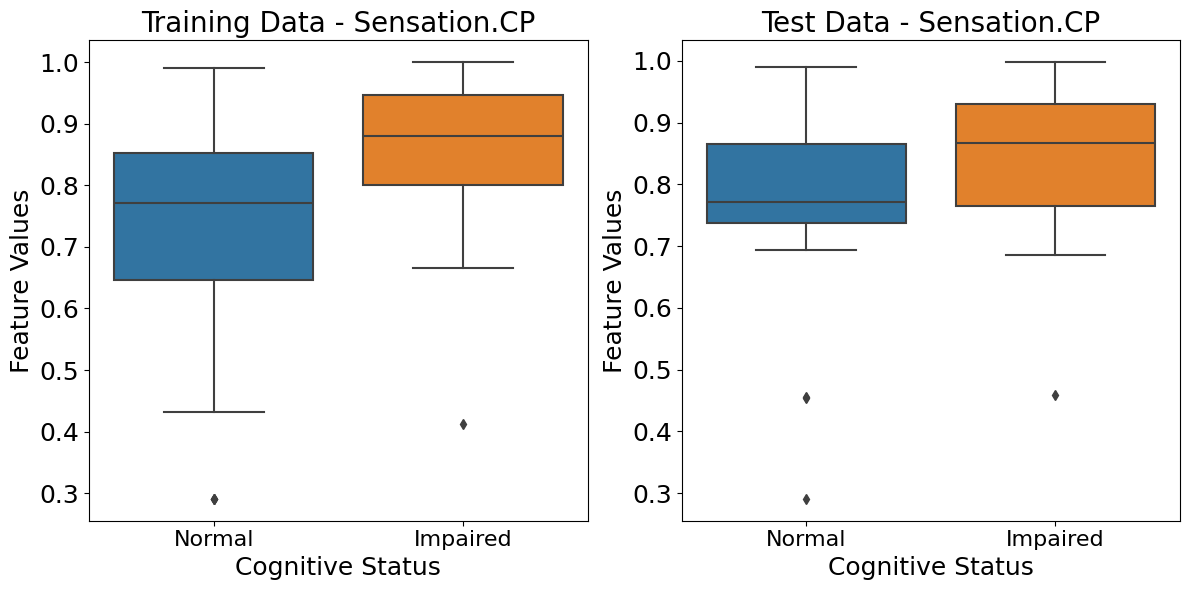

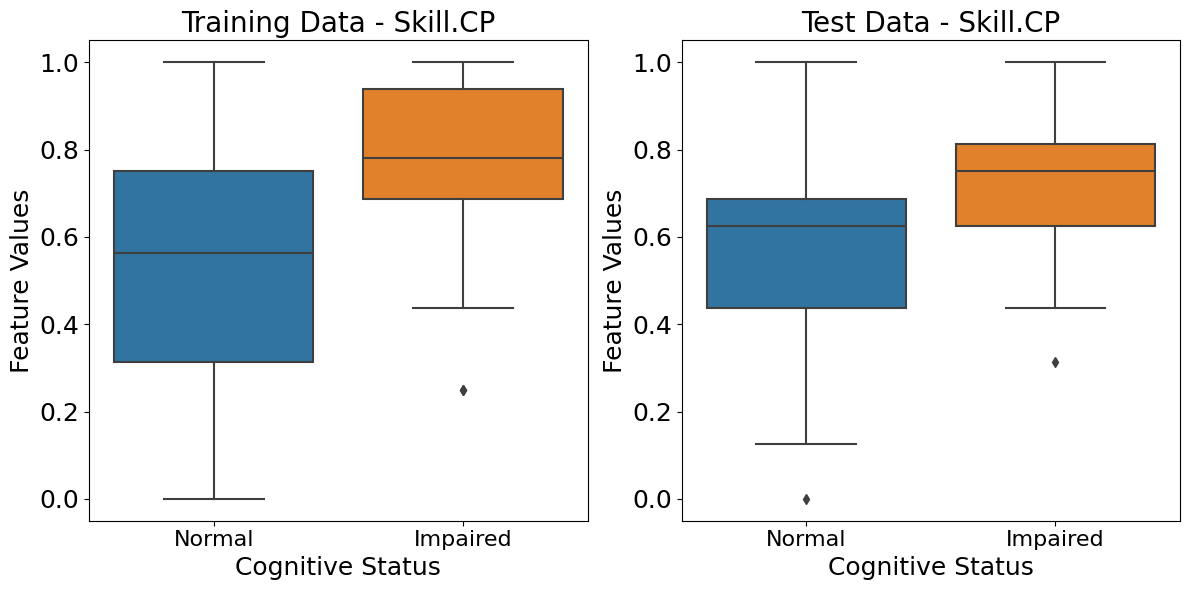

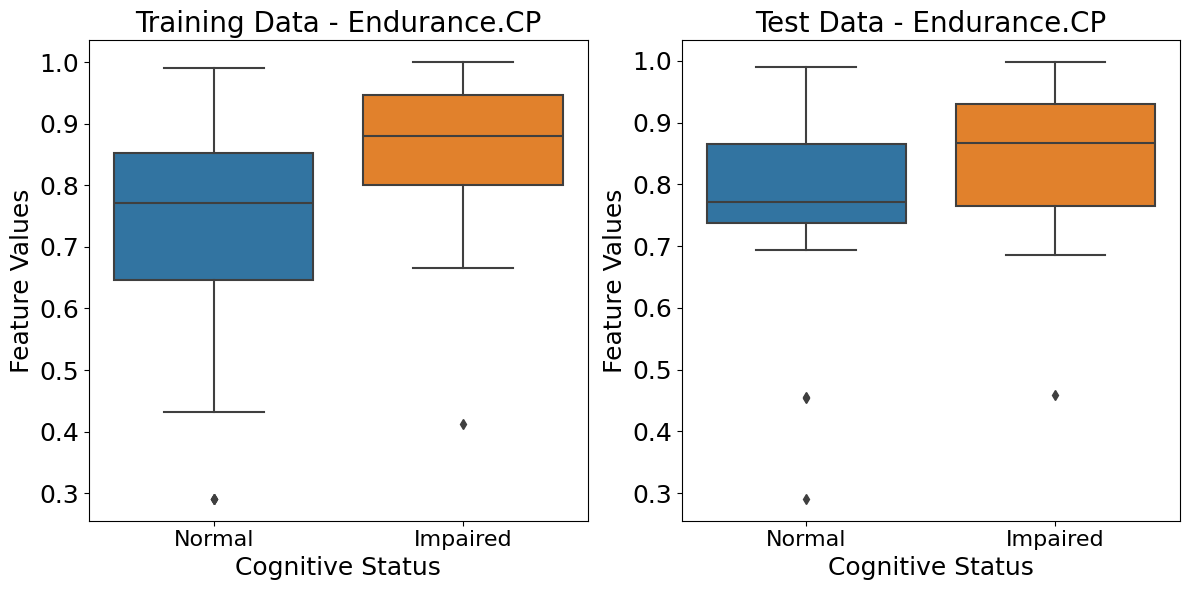

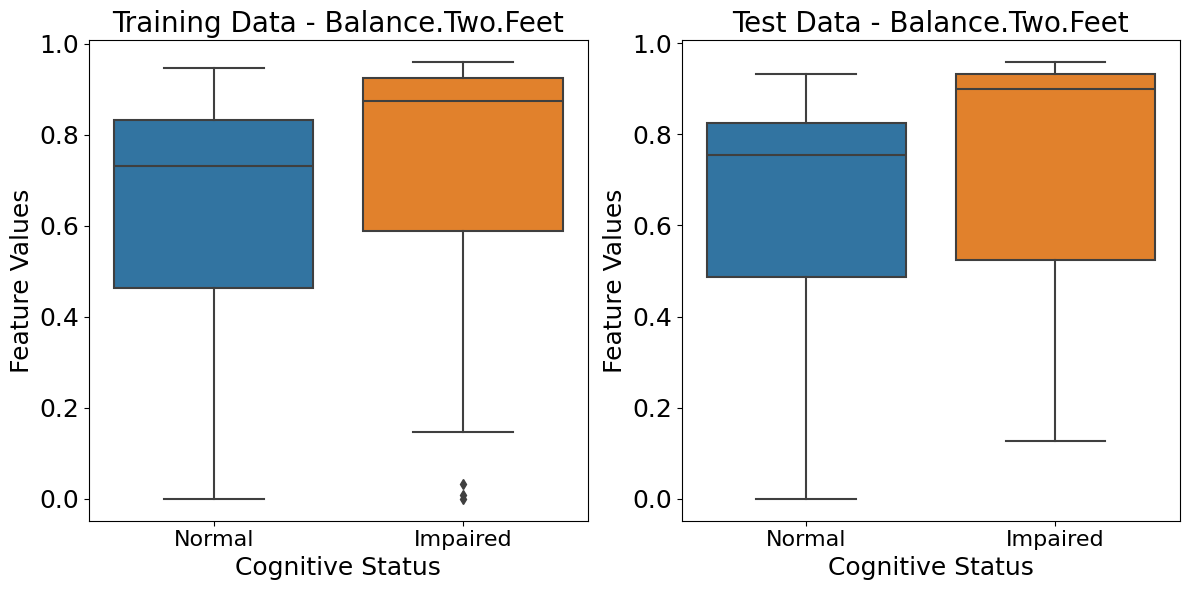

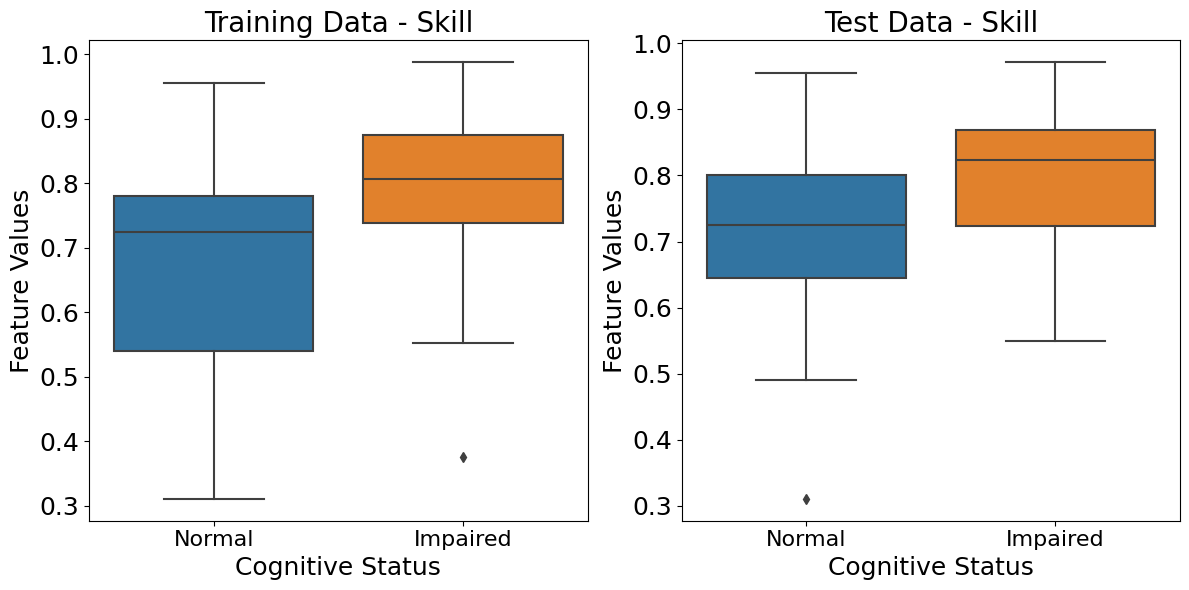

In [45]:
#Boxplot for Random Forest OVERSAMPLING

# Get the indices of the selected features
selected_indices = np.argsort(feature_importance)[::-1][:top_n]

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

# Create a DataFrame with the selected features and target variable for training data
train_data_to_plot = pd.DataFrame(data=np.hstack((X_train.iloc[:, selected_indices], y_train.values.reshape(-1, 1))),
                                  columns=list(selected_features) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data
test_data_to_plot = pd.DataFrame(data=np.hstack((X_test.iloc[:, selected_indices], y_test.values.reshape(-1, 1))),
                                 columns=list(selected_features) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Training Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Test Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)

    # Replace dots with underscores in tick labels
    new_feature_label = feature.replace('.', '_')
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    
    plt.tight_layout()
    plt.show()


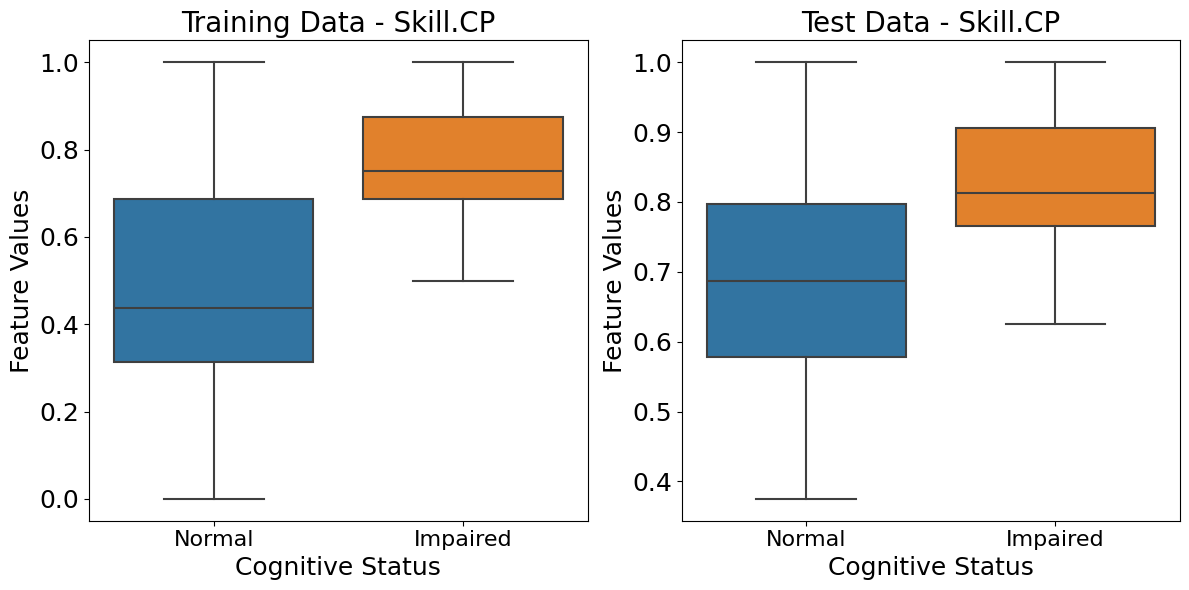

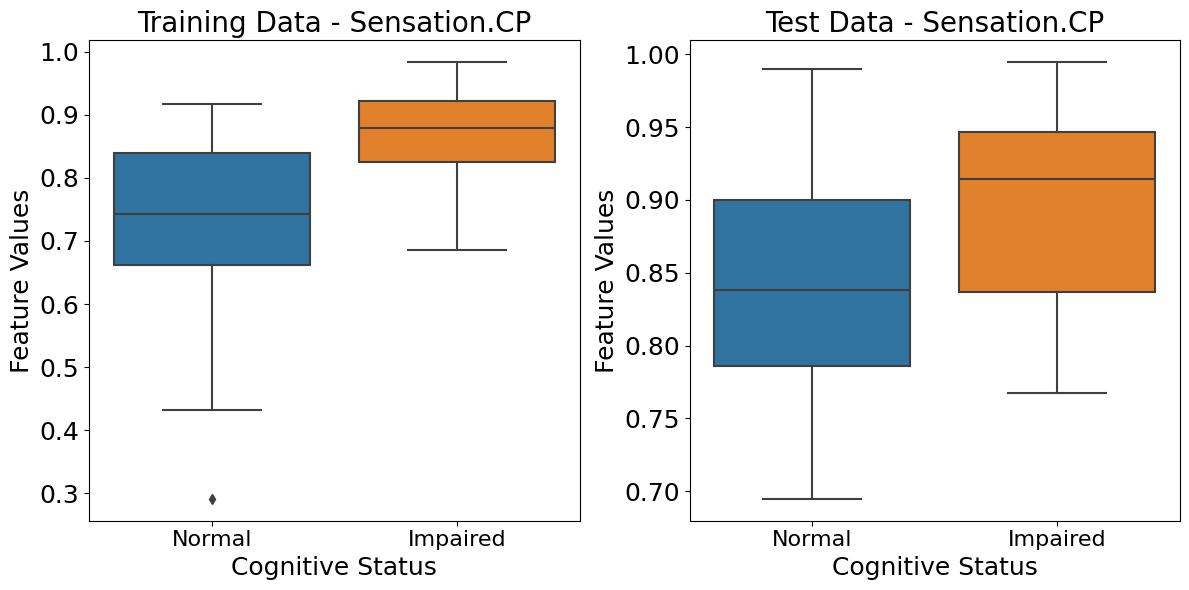

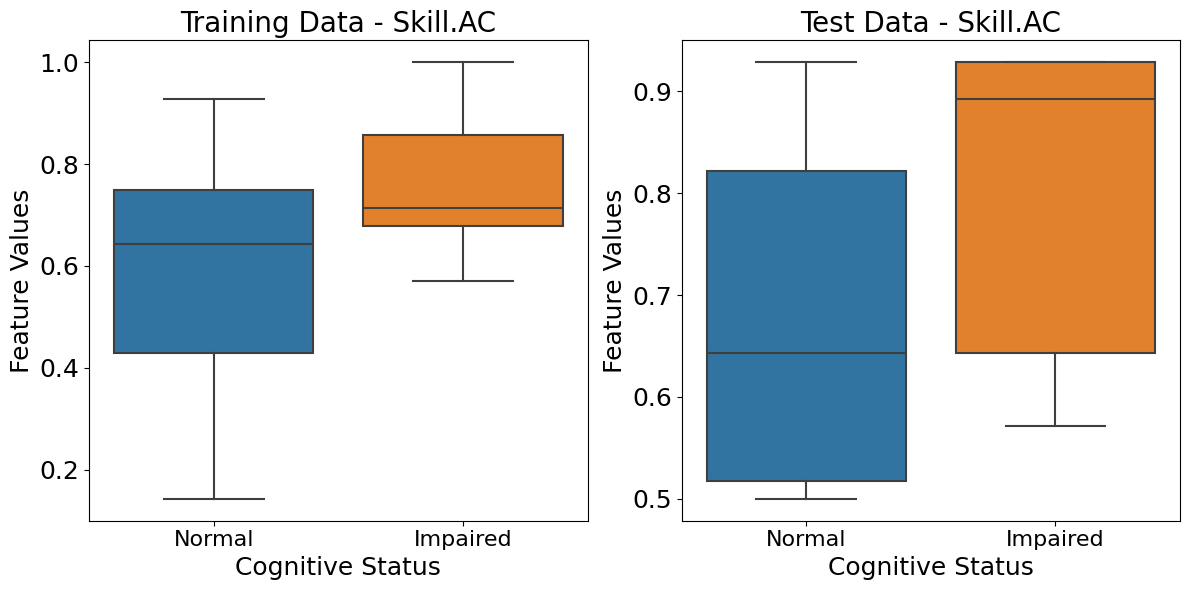

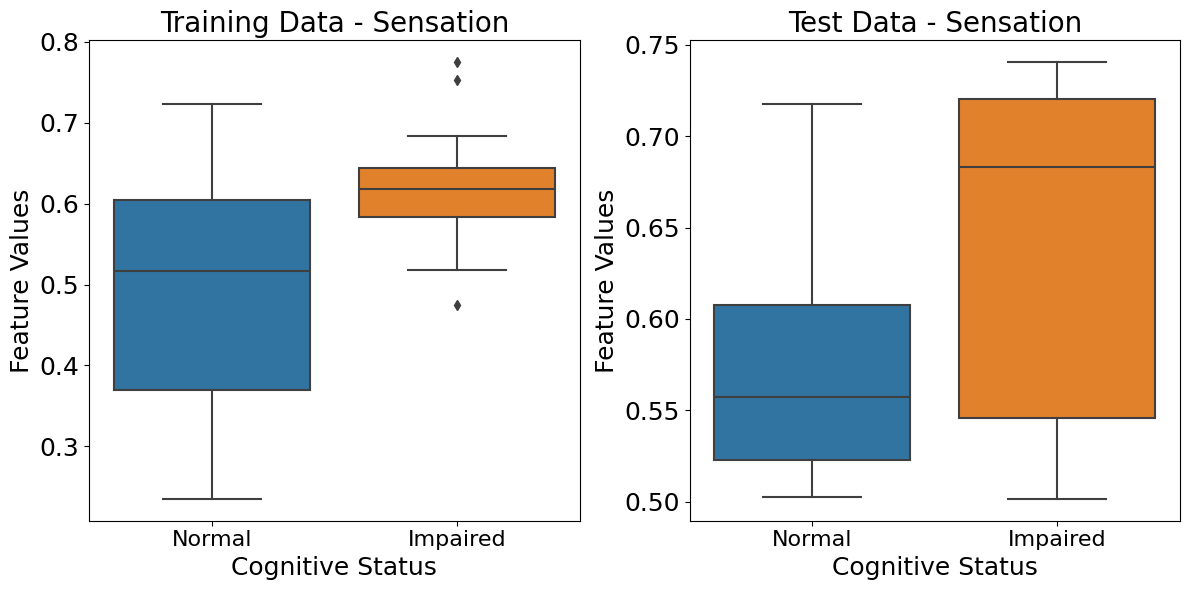

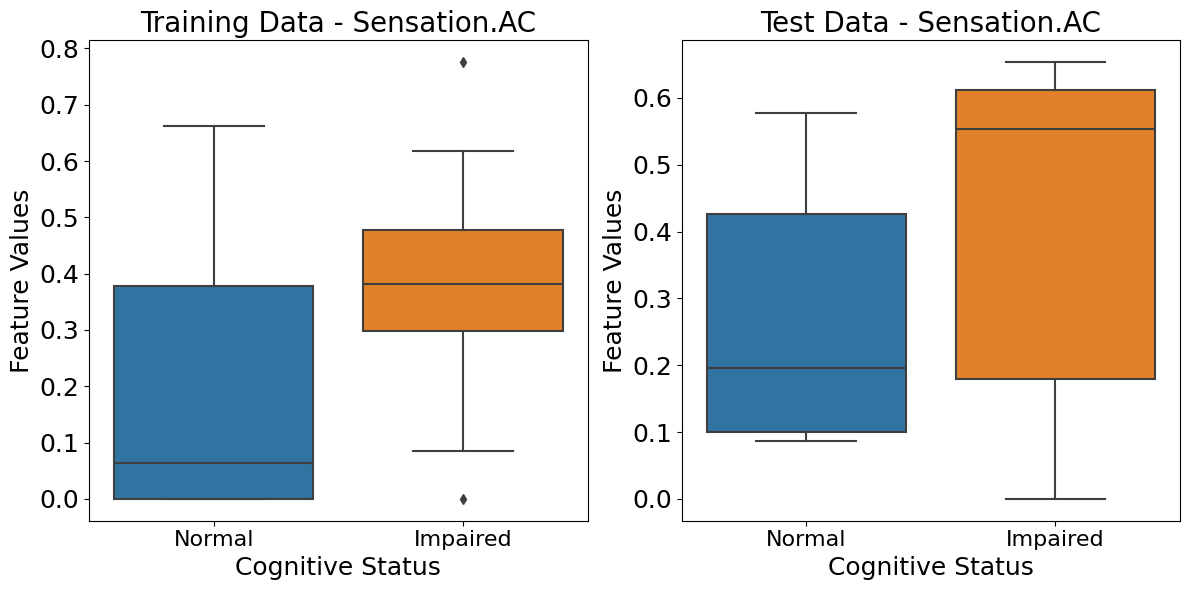

In [46]:
#Boxplot code for Random Forest UNDERSAMPLING

# Get the indices of the selected features for undersampling
selected_indices_under = np.argsort(feature_importance_under)[::-1][:top_n_under]

# Get the names of the selected features for undersampling
selected_features_under = X_train_under.columns[selected_indices_under]

# Create a DataFrame with the selected features and target variable for training data (undersampling)
train_data_to_plot_under = pd.DataFrame(data=np.hstack((X_train_under.iloc[:, selected_indices_under], y_train_under.values.reshape(-1, 1))),
                                       columns=list(selected_features_under) + ['CognitiveStatus'])

# Create a DataFrame with the selected features and target variable for test data (undersampling)
test_data_to_plot_under = pd.DataFrame(data=np.hstack((X_test_under.iloc[:, selected_indices_under], y_test_under.values.reshape(-1, 1))),
                                      columns=list(selected_features_under) + ['CognitiveStatus'])

# Define labels for normal and impaired groups
label_mapping = {0: 'Normal', 1: 'Impaired'}

# Plot boxplots for selected features on training and test data (undersampling)
for feature in selected_features_under:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data_to_plot_under, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Training Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data_to_plot_under, x='CognitiveStatus', y=feature)
    plt.xlabel('Cognitive Status', fontsize=18)
    plt.ylabel('Feature Values', fontsize=18)
    plt.title(f'Test Data - {feature}', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=[label_mapping[label] for label in [0, 1]], fontsize=16)
    plt.yticks(fontsize=18)
    
    plt.tight_layout()
    plt.show()


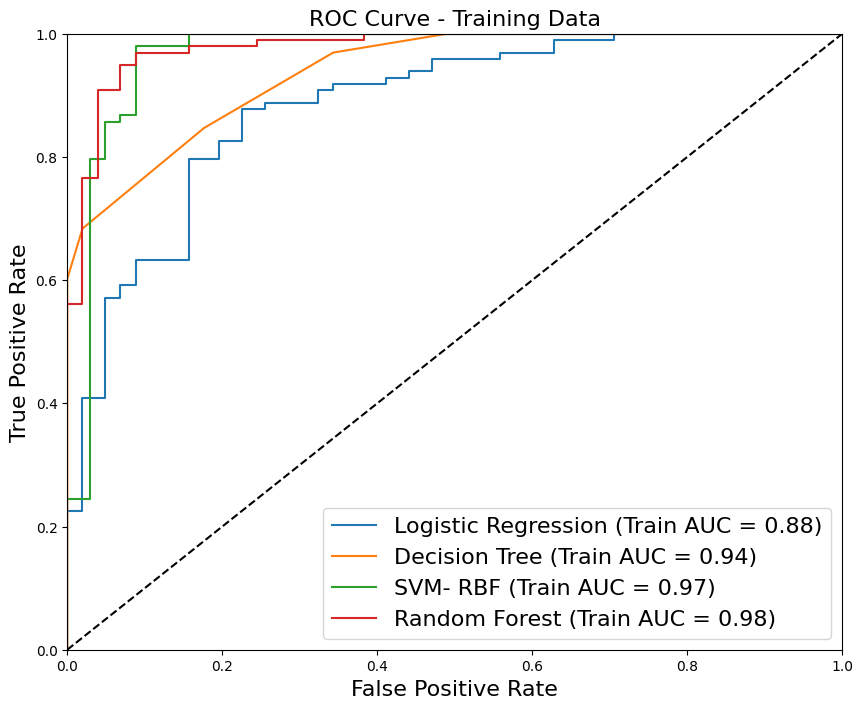

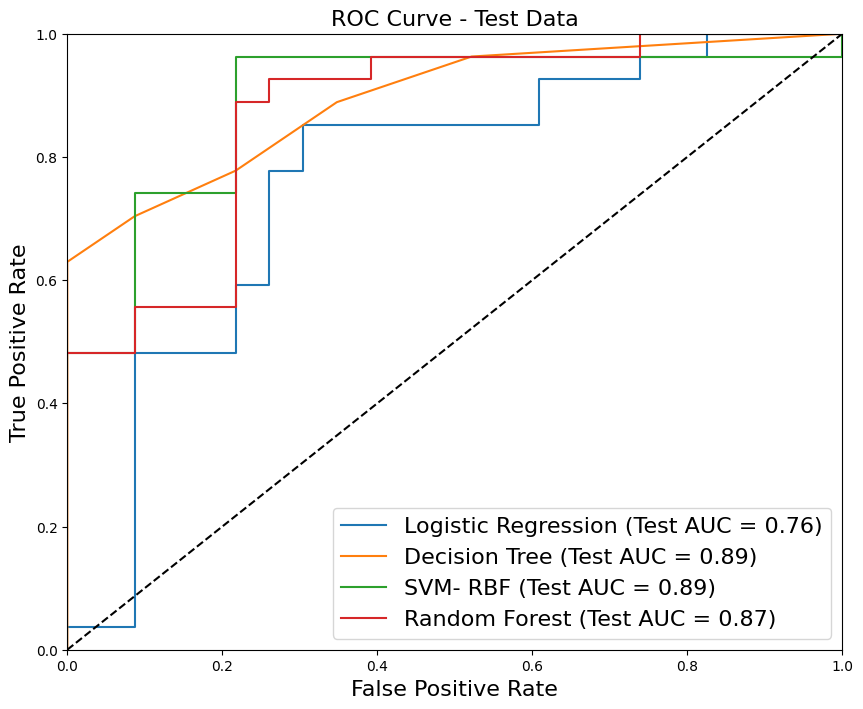


****************************************************************************************************************


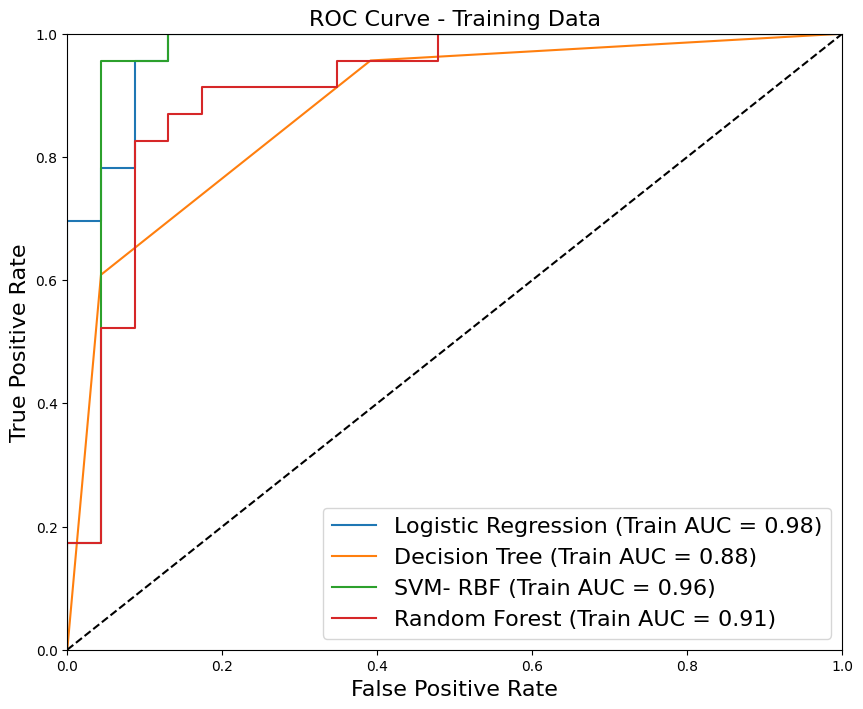

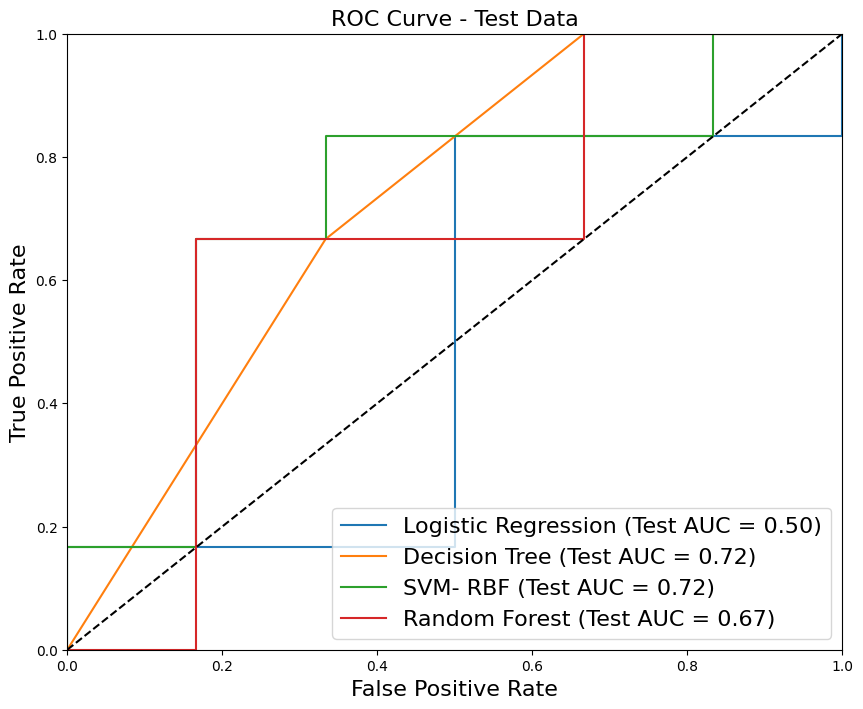

In [47]:
#AUC ROC curve for OVERSAMPLING
# Assuming you already have the DataFrame 'df_r' with the necessary columns.

# Split the data into features (X) and target variable (y)
X = df_r.drop('CognitiveStatus', axis=1)
y = df_r['CognitiveStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Logistic Regression classifier
logreg = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=100)
logreg.fit(X_train, y_train)

# Create a Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10)
tree.fit(X_train, y_train)

# Create an SVM classifier
svm = SVC(kernel='rbf', degree=10, C=3, probability=True)
svm.fit(X_train, y_train)

# Create a Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=20, min_samples_leaf=10, random_state=0)
forest.fit(X_train, y_train)

# Logistic regression
logreg_train_probs = logreg.predict_proba(X_train)[:, 1]
logreg_test_probs = logreg.predict_proba(X_test)[:, 1]

# Decision tree
tree_train_probs = tree.predict_proba(X_train)[:, 1]
tree_test_probs = tree.predict_proba(X_test)[:, 1]

# SVM with polynomial kernel
svm_train_probs = svm.predict_proba(X_train)[:, 1]
svm_test_probs = svm.predict_proba(X_test)[:, 1]

# Random Forest
forest_train_probs = forest.predict_proba(X_train)[:, 1]
forest_test_probs = forest.predict_proba(X_test)[:, 1]

# Calculate FPR and TPR for Logistic Regression
logreg_train_fpr, logreg_train_tpr, _ = roc_curve(y_train, logreg_train_probs)
logreg_test_fpr, logreg_test_tpr, _ = roc_curve(y_test, logreg_test_probs)

# Calculate FPR and TPR for Decision Tree
tree_train_fpr, tree_train_tpr, _ = roc_curve(y_train, tree_train_probs)
tree_test_fpr, tree_test_tpr, _ = roc_curve(y_test, tree_test_probs)

# Calculate FPR and TPR for SVM with polynomial kernel
svm_train_fpr, svm_train_tpr, _ = roc_curve(y_train, svm_train_probs)
svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test, svm_test_probs)

# Calculate FPR and TPR for Random Forest
forest_train_fpr, forest_train_tpr, _ = roc_curve(y_train, forest_train_probs)
forest_test_fpr, forest_test_tpr, _ = roc_curve(y_test, forest_test_probs)

# Calculate AUC for Logistic Regression
logreg_train_auc = roc_auc_score(y_train, logreg_train_probs)
logreg_test_auc = roc_auc_score(y_test, logreg_test_probs)

# Calculate AUC for Decision Tree
tree_train_auc = roc_auc_score(y_train, tree_train_probs)
tree_test_auc = roc_auc_score(y_test, tree_test_probs)

# Calculate AUC for SVM with polynomial kernel
svm_train_auc = roc_auc_score(y_train, svm_train_probs)
svm_test_auc = roc_auc_score(y_test, svm_test_probs)

# Calculate AUC for Random Forest
forest_train_auc = roc_auc_score(y_train, forest_train_probs)
forest_test_auc = roc_auc_score(y_test, forest_test_probs)

# Plot ROC curves for training data
plt.figure(figsize=(10, 8))

plt.plot(logreg_train_fpr, logreg_train_tpr, label=f'Logistic Regression (Train AUC = {logreg_train_auc:.2f})')
plt.plot(tree_train_fpr, tree_train_tpr, label=f'Decision Tree (Train AUC = {tree_train_auc:.2f})')
plt.plot(svm_train_fpr, svm_train_tpr, label=f'SVM- RBF (Train AUC = {svm_train_auc:.2f})')
plt.plot(forest_train_fpr, forest_train_tpr, label=f'Random Forest (Train AUC = {forest_train_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve - Training Data', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

# Plot ROC curves for test data
plt.figure(figsize=(10, 8))

plt.plot(logreg_test_fpr, logreg_test_tpr, label=f'Logistic Regression (Test AUC = {logreg_test_auc:.2f})')
plt.plot(tree_test_fpr, tree_test_tpr, label=f'Decision Tree (Test AUC = {tree_test_auc:.2f})')
plt.plot(svm_test_fpr, svm_test_tpr, label=f'SVM- RBF (Test AUC = {svm_test_auc:.2f})')
plt.plot(forest_test_fpr, forest_test_tpr, label=f'Random Forest (Test AUC = {forest_test_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve - Test Data', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

print('\n****************************************************************************************************************')

#AUC ROC curve for UNDERSAMPLING
# Split the data into features (X) and target variable (y)

X = df_resampled.drop('CognitiveStatus', axis=1)
y = df_resampled['CognitiveStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Logistic Regression classifier
logreg = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=100)
logreg.fit(X_train, y_train)

# Create a Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10)
tree.fit(X_train, y_train)

# Create an SVM classifier
svm = SVC(kernel='rbf', degree=10, C=3, probability=True)
svm.fit(X_train, y_train)

# Create a Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=20, min_samples_leaf=10, random_state=0)
forest.fit(X_train, y_train)

# Logistic regression
logreg_train_probs = logreg.predict_proba(X_train)[:, 1]
logreg_test_probs = logreg.predict_proba(X_test)[:, 1]

# Decision tree
tree_train_probs = tree.predict_proba(X_train)[:, 1]
tree_test_probs = tree.predict_proba(X_test)[:, 1]

# SVM with polynomial kernel
svm_train_probs = svm.predict_proba(X_train)[:, 1]
svm_test_probs = svm.predict_proba(X_test)[:, 1]

# Random Forest
forest_train_probs = forest.predict_proba(X_train)[:, 1]
forest_test_probs = forest.predict_proba(X_test)[:, 1]

# Calculate FPR and TPR for Logistic Regression
logreg_train_fpr, logreg_train_tpr, _ = roc_curve(y_train, logreg_train_probs)
logreg_test_fpr, logreg_test_tpr, _ = roc_curve(y_test, logreg_test_probs)

# Calculate FPR and TPR for Decision Tree
tree_train_fpr, tree_train_tpr, _ = roc_curve(y_train, tree_train_probs)
tree_test_fpr, tree_test_tpr, _ = roc_curve(y_test, tree_test_probs)

# Calculate FPR and TPR for SVM with polynomial kernel
svm_train_fpr, svm_train_tpr, _ = roc_curve(y_train, svm_train_probs)
svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test, svm_test_probs)

# Calculate FPR and TPR for Random Forest
forest_train_fpr, forest_train_tpr, _ = roc_curve(y_train, forest_train_probs)
forest_test_fpr, forest_test_tpr, _ = roc_curve(y_test, forest_test_probs)

# Calculate AUC for Logistic Regression
logreg_train_auc = roc_auc_score(y_train, logreg_train_probs)
logreg_test_auc = roc_auc_score(y_test, logreg_test_probs)

# Calculate AUC for Decision Tree
tree_train_auc = roc_auc_score(y_train, tree_train_probs)
tree_test_auc = roc_auc_score(y_test, tree_test_probs)

# Calculate AUC for SVM with polynomial kernel
svm_train_auc = roc_auc_score(y_train, svm_train_probs)
svm_test_auc = roc_auc_score(y_test, svm_test_probs)

# Calculate AUC for Random Forest
forest_train_auc = roc_auc_score(y_train, forest_train_probs)
forest_test_auc = roc_auc_score(y_test, forest_test_probs)

# Plot ROC curves for training data
plt.figure(figsize=(10, 8))

plt.plot(logreg_train_fpr, logreg_train_tpr, label=f'Logistic Regression (Train AUC = {logreg_train_auc:.2f})')
plt.plot(tree_train_fpr, tree_train_tpr, label=f'Decision Tree (Train AUC = {tree_train_auc:.2f})')
plt.plot(svm_train_fpr, svm_train_tpr, label=f'SVM- RBF (Train AUC = {svm_train_auc:.2f})')
plt.plot(forest_train_fpr, forest_train_tpr, label=f'Random Forest (Train AUC = {forest_train_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve - Training Data', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

# Plot ROC curves for test data
plt.figure(figsize=(10, 8))

plt.plot(logreg_test_fpr, logreg_test_tpr, label=f'Logistic Regression (Test AUC = {logreg_test_auc:.2f})')
plt.plot(tree_test_fpr, tree_test_tpr, label=f'Decision Tree (Test AUC = {tree_test_auc:.2f})')
plt.plot(svm_test_fpr, svm_test_tpr, label=f'SVM- RBF (Test AUC = {svm_test_auc:.2f})')
plt.plot(forest_test_fpr, forest_test_tpr, label=f'Random Forest (Test AUC = {forest_test_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve - Test Data', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [38]:
# #Misclassified sample index in LR, DT and SVM

# from sklearn.metrics import confusion_matrix

# # Function to print misclassified samples
# def print_misclassified_samples(model, X_data, y_true, label):
#     y_pred = model.predict(X_data)
#     misclassified_indices = (y_true != y_pred)
#     misclassified_samples = X_data.index[misclassified_indices]

#     print(f"{label} - Misclassified Samples:")
#     print("Total number of misclassified samples:", len(misclassified_samples))
#     print("Sample indices of misclassified samples:")
#     print(misclassified_samples)
#     print("\n")

# # Decision Tree
# y_train_pred_dt = tree.predict(X_train)
# y_test_pred_dt = tree.predict(X_test)

# print_misclassified_samples(tree, X_train, y_train, 'Decision Tree (Training)')
# print_misclassified_samples(tree, X_test, y_test, 'Decision Tree (Test)')

# # Logistic Regression
# y_train_pred_lr = logreg.predict(X_train)
# y_test_pred_lr = logreg.predict(X_test)

# print_misclassified_samples(logreg, X_train, y_train, 'Logistic Regression (Training)')
# print_misclassified_samples(logreg, X_test, y_test, 'Logistic Regression (Test)')

# # SVM
# y_train_pred_svm = svm.predict(X_train)
# y_test_pred_svm = svm.predict(X_test)

# print_misclassified_samples(svm, X_train, y_train, 'SVM (Training)')
# print_misclassified_samples(svm, X_test, y_test, 'SVM (Test)')

# # Random Forest
# y_train_pred_forest = forest.predict(X_train)
# y_test_pred_forest = forest.predict(X_test)

# print_misclassified_samples(forest, X_train, y_train, 'Random Forest (Training)')
# print_misclassified_samples(forest, X_test, y_test, 'Random Forest (Test)')


In [39]:
# #Test for identifying patterns from misclassified sample indexes

# # Assuming you have the misclassified indices stored in misclassified_samples variable
# misclassified_samples_dt = [101, 15, 74, 125, 124, 3, 41, 14, 226, 123, 98, 93, 149, 94, 49, 48, 78, 91, 57, 1, 105, 132, 17, 53, 128, 127, 99, 79, 77, 81, 39, 58, 36]
# misclassified_samples_lr = [71, 101, 15, 240, 124, 26, 222, 3, 244, 187, 200, 2, 104, 86, 14, 226, 153, 43, 144, 159, 98, 93, 239, 49, 48, 11, 38, 214, 183, 151, 127, 232, 177, 99, 79, 242, 77, 58, 36, 211, 47]
# misclassified_samples_svm = [71, 240, 222, 40, 3, 244, 187, 200, 2, 233, 14, 226, 43, 159, 112, 98, 93, 49, 48, 201, 11, 1, 17, 38, 53, 183, 114, 151, 127, 232, 177, 175, 79, 242, 87, 36]
# misclassified_samples_test_dt = [122, 92, 218, 152, 8, 37, 166, 130, 5, 89]
# misclassified_samples_test_lr = [122, 92, 218, 231, 203, 152, 8, 173, 166, 64]
# misclassified_samples_test_svm = [122, 92, 161, 218, 231, 73, 203, 152, 37, 76, 173, 166, 89, 64]

# # Extract features for misclassified samples
# misclassified_features_dt = X_train.loc[misclassified_samples_dt]
# misclassified_features_lr = X_train.loc[misclassified_samples_lr]
# misclassified_features_svm = X_train.loc[misclassified_samples_svm]

# # Display the features
# print("Decision Tree - Misclassified Samples:")
# print(misclassified_features_dt)

# print("Logistic Regression - Misclassified Samples:")
# print(misclassified_features_lr)

# print("SVM - Misclassified Samples:")
# print(misclassified_features_svm)



In [40]:
# #Visualization comparison of misclassified sampled with the features

# import matplotlib.pyplot as plt
# import seaborn as sns

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming X_train_all and X_test_all are the complete datasets for training and testing
# # Extract feature values for misclassified samples
# misclassified_samples_train = X_train.index[y_train != y_train_pred]
# misclassified_samples_test = X_test.index[y_test != y_test_pred]

# misclassified_train = X_train.loc[misclassified_samples_train]
# misclassified_test = X_test.loc[misclassified_samples_test]

# # Feature Distribution Comparison
# for feature in X_train.columns:
#     plt.figure(figsize=(12, 6))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(X_train[feature], kde=True, label='All Samples', color='blue')
#     sns.histplot(misclassified_train[feature], kde=True, label='Misclassified Samples', color='red')
#     plt.title(f'Distribution Comparison - {feature} (Training)', fontsize=18)
#     plt.xlabel(f'{feature}', fontsize=15)
#     plt.ylabel('Count', fontsize=15)
#     plt.legend()
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(X_test[feature], kde=True, label='All Samples', color='blue')
#     sns.histplot(misclassified_test[feature], kde=True, label='Misclassified Samples', color='red')
#     plt.title(f'Distribution Comparison - {feature} (Test)', fontsize=18)
#     plt.xlabel(f'{feature}', fontsize=15)
#     plt.ylabel('Count', fontsize=15)
#     plt.legend()
    
#     plt.tight_layout()
#     plt.show()

# # Visualization of Feature Values for Misclassified Samples
# for feature in X_train.columns:
#     plt.figure(figsize=(12, 6))
    
#     plt.subplot(1, 2, 1)
#     sns.boxplot(x=y_train, y=X_train[feature])
#     plt.title(f'Feature Values - {feature} (Training)', fontsize=18)
#     plt.xlabel('Cognitive Status', fontsize=15)
#     plt.ylabel(f'{feature}', fontsize=15)
    
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=y_test, y=X_test[feature])
#     plt.title(f'Feature Values - {feature} (Test)', fontsize=18)
#     plt.xlabel('Cognitive Status', fontsize=15)
#     plt.ylabel(f'{feature}', fontsize=15)
    
#     plt.tight_layout()
#     plt.show()



In [41]:
# #TEST

# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import precision_recall_curve

# # Assuming df_r is your dataframe with the features and target variable
# # Replace this with your actual dataframe

# # Split the data into features (X) and target variable (y)
# X = df_r.drop('CognitiveStatus', axis=1)
# y = df_r['CognitiveStatus']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Create a Random Forest classifier with hyperparameters
# forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=10, random_state=0)

# # Train the Random Forest classifier
# forest.fit(X_train, y_train)

# # Predict on the test set
# y_test_pred = forest.predict(X_test)

# # Get precision-recall curve values
# precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

# # Plot Precision-Recall curve
# plt.plot(recall, precision, marker='.')
# plt.title('Precision-Recall Curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.show()



In [42]:
# #Feature importance for cognitive status after classification

# # Define games columns
# games_columns = ['Skill', 'Skill.AC', 'Skill.BFL', 'Skill.BFR', 'Skill.CP', 'Skill.IJ', 
#                  'Reaction', 'Reaction.Finger', 'Reaction.AC1', 'Reaction.AC2', 'Reaction.CP', 
#                  'Sensation', 'Sensation.AC', 'Sensation.BFL', 'Sensation.BFR', 'Sensation.CP', 
#                  'Sensation.IJ', 'Strength', 'Strength.AC', 'Strength.BFL', 'Strength.BFR', 'Strength.CP', 
#                  'Strength.IJ', 'Endurance', 'Endurance.AC', 'Endurance.CP', 'Endurance.IJ', 'Balance', 
#                  'Balance.Two.Feet', 'Balance.One.Foot']

# # Prepare features and target
# X = df[games_columns]
# y = df['CognitiveStatus']  # Assuming 'CognitiveStatus' is the target column

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Classifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Evaluate model accuracy
# y_pred = clf.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Model Accuracy: {accuracy:.2f}')

# # Get feature importances
# feature_importances = clf.feature_importances_

# # Create a DataFrame to show feature importance scores
# feature_importance_df = pd.DataFrame({'Feature': games_columns, 'Importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot feature importance scores
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Games')
# plt.title('Feature Importance for Cognitive Status Classification')
# plt.show()

# # Select games with high importance for further analysis
# selected_games = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
# print('Selected Games:', selected_games)


In [43]:
# pip install statsmodels

In [44]:
# #(OPTIONAL) Heatmap visualization of Misclassified sample index in LR, DT and SVM

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

# def analyze_misclassified_samples(model, X_data, y_true, y_pred, label):
#     misclassified_indices = (y_true != y_pred)
#     misclassified_X = X_data[misclassified_indices]
#     misclassified_y = y_true[misclassified_indices]
#     misclassified_pred = y_pred[misclassified_indices]

#     print(f"{label} - Misclassified Samples:")
#     print("Number of misclassified samples:", len(misclassified_X))

#     # Visualize features for misclassified samples
#     plt.figure(figsize=(15, 5))
#     sns.heatmap(misclassified_X, cmap='viridis')
#     plt.title(f"Features of Misclassified Samples - {label}")
#     plt.show()

# # Logistic Regression
# logreg = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=100)
# logreg.fit(X_train, y_train)
# y_train_pred_lr = logreg.predict(X_train)
# y_test_pred_lr = logreg.predict(X_test)
# analyze_misclassified_samples(logreg, X_train, y_train, y_train_pred_lr, 'Logistic Regression (Training)')
# analyze_misclassified_samples(logreg, X_test, y_test, y_test_pred_lr, 'Logistic Regression (Test)')

# # Decision Tree
# tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=4)
# tree.fit(X_train, y_train)
# y_train_pred_dt = tree.predict(X_train)
# y_test_pred_dt = tree.predict(X_test)
# analyze_misclassified_samples(tree, X_train, y_train, y_train_pred_dt, 'Decision Tree (Training)')
# analyze_misclassified_samples(tree, X_test, y_test, y_test_pred_dt, 'Decision Tree (Test)')

# # SVM
# svm = SVC(kernel='poly', degree=1, C=3)
# svm.fit(X_train, y_train)
# y_train_pred_svm = svm.predict(X_train)
# y_test_pred_svm = svm.predict(X_test)
# analyze_misclassified_samples(svm, X_train, y_train, y_train_pred_svm, 'SVM (Training)')
# analyze_misclassified_samples(svm, X_test, y_test, y_test_pred_svm, 'SVM (Test)')


In [45]:
#Multiple linear Regression analysis (Which factors may also affect game performance? How to exclude these 
#factors to only investigate the impact from cognitive impairment?)

import statsmodels.api as sm

# Select covariates and target variable
covariates = ['Skill', 'Skill.AC', 'Skill.IJ', 'Skill.BFL', 'Skill.BFR', 'Skill.CP', 'Reaction', 'Reaction.Finger', 
                'Reaction.AC1', 'Reaction.AC2', 'Reaction.CP', 'Sensation', 'Sensation.AC', 'Sensation.BFL', 'Sensation.BFR', 
                'Sensation.CP', 'Sensation.IJ','Strength', 'Strength.AC', 'Strength.BFL', 'Strength.BFR', 'Strength.CP', 
                'Strength.IJ', 'Endurance', 'Endurance.AC', 'Endurance.CP', 'Endurance.IJ', 'Balance', 'Balance.Two.Feet', 
                'Balance.One.Foot']
target = 'CognitiveStatus'

# Create a new DataFrame with covariates and target
data = df[[target] + covariates]


# Split data into predictors (X) and target variable (y)
X = data[covariates]
y = data[target]

# Add intercept to predictors
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        CognitiveStatus   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.628
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           0.000380
Time:                        11:20:15   Log-Likelihood:                -45.738
No. Observations:                 154   AIC:                             137.5
Df Residuals:                     131   BIC:                             207.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2374      0.343  

In [46]:
# #Visualization multiple linear regression
# # Extract coefficients and confidence intervals from the regression model


# coefficients = model.params
# conf_int = model.conf_int()

# # Plot bar plot
# plt.figure(figsize=(12, 8))
# coefficients.plot(kind='bar', yerr=(coefficients - conf_int[0], conf_int[1] - coefficients), capsize=5)
# plt.title('Multiple Linear Regression Coefficients with Confidence Intervals')
# plt.xlabel('Covariates')
# plt.ylabel('Coefficient Value')
# plt.show()


In [47]:
# #Which feature is most corelated with Cognitive status? using correlation matrix


# import pandas as pd

# # Assuming your data frame is df_r with the provided columns

# # Extract game-related columns
# game_columns = ['Skill', 'Skill.AC', 'Skill.IJ', 'Skill.BFL', 'Skill.BFR', 'Skill.CP', 'Reaction', 'Reaction.Finger', 
#                 'Reaction.AC1', 'Reaction.AC2', 'Reaction.CP', 'Sensation', 'Sensation.AC', 'Sensation.BFL', 'Sensation.BFR', 
#                 'Sensation.CP', 'Sensation.IJ','Strength', 'Strength.AC', 'Strength.BFL', 'Strength.BFR', 'Strength.CP', 
#                 'Strength.IJ', 'Endurance', 'Endurance.AC', 'Endurance.CP', 'Endurance.IJ', 'Balance', 'Balance.Two.Feet', 
#                 'Balance.One.Foot']

# # Add CognitiveStatus to the selected columns
# selected_columns = ['CognitiveStatus'] + game_columns

# # Create a new data frame with selected columns
# df_selected = df_r[selected_columns]

# # Calculate correlation matrix
# correlation_matrix = df_selected.corr()

# # Extract correlations with CognitiveStatus
# correlations_with_cognitive_status = correlation_matrix['CognitiveStatus']

# # Sort correlations to find the most correlated game
# most_correlated_game = correlations_with_cognitive_status.abs().sort_values(ascending=False).index[1]

# # Print the results
# print(f"Most correlated game with CognitiveStatus: {most_correlated_game}")
# print("Correlation coefficients:")
# print(correlations_with_cognitive_status)
